# Funding in startups
Explore the correlation between a startup's funding characteristics and its funding success, examining factors such as the funding rounds, funding types, and geographical locations. Additionally, assess the impact of economic factors on funding, and propose strategies for startups to optimize their funding journeys. This project has the potential to offer valuable insights for both aspiring entrepreneurs and investors in the dynamic landscape of startup financing.


# <font color='diamond' size=6> *Startup Funding Analysis*

## Project Overview

This project aims to uncover trends and insights that guide strategic decision-making in the startup ecosystem. By analyzing the distribution of funding across different categories, markets, and regions, the project identifies sectors with higher investment potential. It also explores the correlation between a startup's funding characteristics and its success, examining factors such as funding rounds, funding types, and geographical locations. Additionally, the project assesses the impact of economic factors on funding and proposes strategies for startups to optimize their funding journeys.

## *Objectives*

1. **Distribution Analysis**:
   - Analyze the distribution of startup funding across various categories, such as industry sectors, markets, and geographical regions.
   - Identify sectors with higher investment potential.

2. **Correlation Analysis**:
   - Explore the relationship between funding characteristics (e.g., funding rounds, types of investors, and location) and the success of startups.
   - Investigate the impact of geographical location on funding opportunities.

3. **Strategic Recommendations**:
   - Propose strategies for startups to optimize their funding journeys based on insights from the analysis.
   - Provide actionable recommendations for aspiring entrepreneurs and investors.


# <font color='diamond' size=6> *Importing Necessary Libraries and dataset*

---



In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [224]:
# @title *Downloading the dataset*
! gdown 110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP

Downloading...
From: https://drive.google.com/uc?id=110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP
To: /content/investments_VC.csv
100% 12.5M/12.5M [00:00<00:00, 138MB/s]


In [225]:
# Checking the dataset encoding
import chardet

with open('investments_VC.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))          # 10000 will read 1 mb data only to speed up , it should be use for bigger datasets

print(result['encoding'])

ISO-8859-1


In [226]:
# @title *Reading dataset*
df=pd.read_csv('investments_VC.csv',encoding='latin')
df.iloc[:5,15:]#head()

founded_year first_funding_at last_funding_at       seed    venture  \
0        2012.0       2012-06-30      2012-06-30  1750000.0        0.0   
1           NaN       2010-06-04      2010-09-23        0.0  4000000.0   
2        2012.0       2012-08-09      2012-08-09    40000.0        0.0   
3        2011.0       2011-04-01      2011-04-01  1500000.0        0.0   
4        2014.0       2014-08-17      2014-09-26        0.0        0.0   

   equity_crowdfunding  undisclosed  convertible_note  debt_financing  angel  \
0                  0.0          0.0               0.0             0.0    0.0   
1                  0.0          0.0               0.0             0.0    0.0   
2                  0.0          0.0               0.0             0.0    0.0   
3                  0.0          0.0               0.0             0.0    0.0   
4              60000.0          0.0               0.0             0.0    0.0   

   ...  secondary_market  product_crowdfunding  round_A  round_B  round_C  \
0  ...               0.0                   0.0      0.0      0.0      0.0   
1  ...               0.0                   0.0      0.0      0.0      0.0   
2  ...               0.0                   0.0      0.0      0.0      0.0   
3  ...               0.0                   0.0      0.0      0.0      0.0   
4  ...               0.0                   0.0      0.0      0.0      0.0   

   round_D  round_E  round_F  round_G  round_H  
0      0.0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      0.0      0.0  
4      0.0      0.0      0.0      0.0      0.0  

[5 rows x 24 columns]

In [227]:
! gdown 1oQX-4sum2y8cCRYdO3_qV928qaXemY5YR-da1h0lZf8

Downloading...
From (original): https://drive.google.com/uc?id=1oQX-4sum2y8cCRYdO3_qV928qaXemY5YR-da1h0lZf8
From (redirected): https://docs.google.com/document/d/1oQX-4sum2y8cCRYdO3_qV928qaXemY5YR-da1h0lZf8/export?format=docx
To: /content/Startup funding Data description.docx
8.95kB [00:00, 22.5MB/s]


In [228]:
! pip install python-docx

from docx import Document
doc = Document('Startup funding Data description.docx')

In [229]:
# @title *Reading information about dataset columns*
for table in doc.tables:
    for i, row in enumerate(table.rows):
        row_data = [cell.text.strip() for cell in row.cells]
        if i == 0:
              print(f"{'Column Index':<15} {'Column Name':<20} {'Description':<50}")  # Table headers
              print("=" * 90)
        else:
              print(f"{row_data[0]:<15} {row_data[1]:<20} {row_data[2]:<50}")

Column Index    Column Name          Description                                       
0               permalink            Static hyperlink for the startup on Crunchbase... 
1               name                 name of the startup                               
2               homepage_url         Website address of the startup                    
3               category_list        in which category the startups fall               
4               market               which market the startup caters to                
5               funding_total_usd    total funding received(in USD)                    
6               status               current operating status                          
7               country_code         country of origin                                 
8               state_code           state of origin                                   
9               region               region                                            
10              city            

# <font color='diamond' size=6> *Understanding the dataset*

In [230]:
# @title *Identifying the variables and datatypes*
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

- Dataset has 39 columns with 54294 rows.
- 16 columns have object datatype while 23 have float datatype.


In [231]:
# @title *Analysing null values*
df.isna().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E                  4856
round_F                  4856
round_G                  4856
round_H                  4856
dtype: int64

In [232]:
# @title *Dropping rows having all null values(entire empty rows)*
df=df[~df.isna().all(axis=1)]
df.isna().sum()/len(df)*100

permalink                0.000000
name                     0.002023
homepage_url             6.976415
category_list            8.012056
 market                  8.026215
 funding_total_usd       0.000000
status                   2.657875
country_code            10.665885
state_code              38.992273
region                  10.665885
city                    12.371051
funding_rounds           0.000000
founded_at              22.015454
founded_month           22.161091
founded_quarter         22.161091
founded_year            22.161091
first_funding_at         0.000000
last_funding_at          0.000000
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_market         0.000000
product_crowdfunding     0.000000
round_A                  0.000000
round_B                  0.000000
round_C                  0.000000
round_D                  0.000000
round_E                  0.000000
round_F                  0.000000
round_G                  0.000000
round_H                  0.000000
dtype: float64

We have seen that there are 4856 rows which are completely null for all columns, so just dropped them.

In [233]:
# @title *Checking for duplicate rows*
df.duplicated().any()

False

No duplicate rows are given in the data.

In [234]:
# @title *Checking for unique values*
df.nunique()

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
 market                   753
 funding_total_usd      14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3369
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3914
last_funding_at          3657
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C                   740
round_D                   458
round_E                   225
round_F                   110
round_G                    32
round_H                     5
dtype: int64

We can see there are
- 3 different status for startups,
- market category is 753,
-  115 country data startups data is there which can be further divided into 61 state code, (country cant be more than state, it just too much data is missing or invalid in state column,
- regions are 1089 and
- 4188 unique cities startups information is provided,
- with 103 funding years data.

# <font color='diamond' size=6> *Cleaning the dataset*

In [235]:
# checking column names
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [236]:
# Renaming/Stripping column Names
df.columns=df.columns.str.strip()
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

There was inconsistency in column names with trailing spaces which are replaced with cleaned names.

In [237]:
# @title *Cleaning columns and Correcting their datatypes*
non_digit_values = df['funding_total_usd'].str.contains(r'[^\d\s,]')
df[non_digit_values].funding_total_usd


8         -   
11        -   
12        -   
14        -   
19        -   
         ...  
49411     -   
49418     -   
49421     -   
49422     -   
49423     -   
Name: funding_total_usd, Length: 8531, dtype: object

In [238]:
df[non_digit_values].iloc[:,18:].sum(axis=1).value_counts()

0.0    8531
Name: count, dtype: int64

We can see that whenever the data is missing in funding_total_usd, theother round sum is also 0, so just imputing these 0 there.

In [239]:
df['funding_total_usd']=df['funding_total_usd'].str.strip().str.replace(',','').str.replace('-','0')
df['funding_total_usd']=df['funding_total_usd'].astype('int')

In [240]:
# finding null row of column- 'NAME"
df[df['name'].isna()]

permalink name           homepage_url category_list  \
28221  /organization/tell-it-in  NaN  http://tellitin10.com    |Startups|   

           market  funding_total_usd  status country_code state_code region  \
28221   Startups               25000  closed          NaN        NaN    NaN   

       ... secondary_market  product_crowdfunding round_A round_B round_C  \
28221  ...              0.0                   0.0     0.0     0.0     0.0   

       round_D round_E round_F  round_G  round_H  
28221      0.0     0.0     0.0      0.0      0.0  

[1 rows x 39 columns]

In [241]:
# filling 'NAME' column null value by using hyperlink
df['name'].fillna('Tell It in 10',inplace=True)

In [242]:
# @title *Treating Missing Vlaues*
df[['category_list','market']].isna().sum()

category_list    3961
market           3968
dtype: int64

In [243]:
# finding rows where category is given but market column is null as market is related to category of startup.
df[(~df['category_list'].isna() ) & (df['market'].isna())]

permalink                     name  \
2546                  /organization/anonabox                 AnonaBox   
9174                    /organization/cognea                   Cognea   
11735              /organization/digitalcade              Digitalcade   
18973         /organization/high-brew-coffee         High Brew Coffee   
22974                   /organization/klique                   Klique   
43167  /organization/three-spires-brewing-co  Three Spires Brewing Co   
44766                    /organization/ubalo                    Ubalo   

                            homepage_url  \
2546                http://anonabox.com/   
9174               http://www.cognea.com   
11735         http://www.digitalcade.com   
18973          http://highbrewcoffee.com   
22974              http://www.klique.com   
43167  http://www.threespiresbrewing.com   
44766                   http://ubalo.com   

                               category_list market  funding_total_usd  \
2546                  |Consumer Electronics|    NaN             600000   
9174          |Pervasive Computing|Startups|    NaN                  0   
11735    |Entertainment|Skill Gaming|Mobile|    NaN             100000   
18973        |Consumer Goods|Coffee|Brewing|    NaN            4400000   
22974   |Group Email|Group SMS|Social Media|    NaN            2075000   
43167                              |Brewing|    NaN              30000   
44766  |Cloud Computing|Pervasive Computing|    NaN                  0   

          status country_code state_code             region  ...  \
2546   operating          USA         CA  Sacramento Valley  ...   
9174    acquired          NaN        NaN                NaN  ...   
11735  operating          NaN        NaN                NaN  ...   
18973  operating          USA         TX             Austin  ...   
22974  operating          USA         FL    Naples, Florida  ...   
43167  operating          NaN        NaN                NaN  ...   
44766   acquired          NaN        NaN                NaN  ...   

      secondary_market  product_crowdfunding round_A round_B round_C  round_D  \
2546               0.0              600000.0     0.0     0.0     0.0      0.0   
9174               0.0                   0.0     0.0     0.0     0.0      0.0   
11735              0.0                   0.0     0.0     0.0     0.0      0.0   
18973              0.0                   0.0     0.0     0.0     0.0      0.0   
22974              0.0                   0.0     0.0     0.0     0.0      0.0   
43167              0.0                   0.0     0.0     0.0     0.0      0.0   
44766              0.0                   0.0     0.0     0.0     0.0      0.0   

      round_E round_F  round_G  round_H  
2546      0.0     0.0      0.0      0.0  
9174      0.0     0.0      0.0      0.0  
11735     0.0     0.0      0.0      0.0  
18973     0.0     0.0      0.0      0.0  
22974     0.0     0.0      0.0      0.0  
43167     0.0     0.0      0.0      0.0  
44766     0.0     0.0      0.0      0.0  

[7 rows x 39 columns]

In [244]:
# rows where catgory is given but not market, filling them with category
df['category_list']=df['category_list'].str.strip('|').str.split('|')
df['market']=df.apply(lambda row: np.random.choice(row['category_list']) if (pd.isna(row['market']) and isinstance(row['category_list'],list)) else row['market'], axis=1)


In [245]:
# @title *Filling Missing Values*
# assuming unknown status companies are closed but just imputing them with 'unknown'
df[['category_list','market','status']]=df[['category_list','market','status']].fillna('unknown')


In [246]:
# function to convert columns having datetime info to datetime dtype
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str,errors='coerce')
    except ValueError:
        return pd.to_datetime(date_str,dayfirst=True,errors='coerce')

In [247]:
# Converting last_funding_at column into datetime datatype and treating missing values in column too
df['last_funding_at']=parse_date(df['last_funding_at'])

print('No of rows dropping = ',df['last_funding_at'].isna().sum())
df.drop(df[df['last_funding_at'].isna()].index,inplace=True)
# dropping rows where last_funding_at data is messed

No of rows dropping =  6


In [248]:
df[df['first_funding_at'].isin(['0007-05-13','0011-11-14'])].iloc[:,6:]

status country_code state_code     region       city  \
29695  operating          BRA        NaN  Sao Paulo  São Paulo   
37313   acquired          USA         TX     Austin     Austin   

       funding_rounds  founded_at founded_month founded_quarter  founded_year  \
29695             2.0  2013-01-01       2013-01         2013-Q1        2013.0   
37313             2.0  1997-01-01       1997-01         1997-Q1        1997.0   

       ... secondary_market product_crowdfunding     round_A  round_B  \
29695  ...              0.0                  0.0  14300000.0      0.0   
37313  ...              0.0                  0.0         0.0      0.0   

       round_C  round_D  round_E  round_F  round_G  round_H  
29695      0.0      0.0      0.0      0.0      0.0      0.0  
37313      0.0      0.0      0.0      0.0      0.0      0.0  

[2 rows x 33 columns]

In [249]:
# df[(df['private_equity']>0) & (df['status']=='acquired')].iloc[:,10:20]        just to check what values to fill

In [250]:
# Converting first_funding_at column into datetime datatype and treating missing values in column too
print('Missing rows of first_funding_at column are = ',parse_date(df['first_funding_at']).isna().sum())
print('*'*60)

rep_dic={'0007-05-13':'2013-05-07',
         '0011-11-14':'2011-11-14'
         }
df['first_funding_at']=df['first_funding_at'].replace(rep_dic)

df['first_funding_at']=parse_date(df['first_funding_at'])
print('No of rows dropping = ',df['first_funding_at'].isna().sum())

df.drop(df[df['first_funding_at'].isna()].index,inplace=True)
df.reset_index(drop=True, inplace=True)
# dropping rows where first_founding_at is messed and funding=0

Missing rows of first_funding_at column are =  4
************************************************************
No of rows dropping =  2


In [251]:
# Converting founded_at column into datetime datatype and treating missing values in column too
df['founded_at']=parse_date(df['founded_at'])
print(df['founded_at'].isna().sum())

10881


In [252]:
# finding the median of difference of days from founded at and first funding to fill null values

df_clean=df[~df['founded_at'].isna()]
med_days=(df_clean['first_funding_at']-df_clean['founded_at']).dt.days.median()
df['founded_at']=df['founded_at'].fillna(df['first_funding_at']-pd.to_timedelta(med_days,unit='d'))

In [253]:
# cleaning and extracting month from founded_at column to fill missing values

df['founded_month']=df['founded_month']+'-01'                # adding date 01 to each month data
df['founded_month']=parse_date(df['founded_month']).dt.month

print('No of rows having null values : ',df['founded_month'].isna().sum(),'\n\n')
print(f"No of month matching with founded at : \n{ (df['founded_at'].dt.month==df['founded_month']).value_counts() }")

df['founded_month'].fillna(df['founded_at'].dt.month,inplace=True)
df['founded_month']=df['founded_month'].astype('int')

No of rows having null values :  10952 


No of month matching with founded at : 
True     38478
False    10952
Name: count, dtype: int64


In [254]:
# cleaning and extracting quarter from founded_at column to fill missing values

df['founded_quarter']=df['founded_quarter'].str.split('').str[-2]

print('No of rows having null values : ',df['founded_quarter'].isna().sum(),'\n\n')
print(f"No of quarter matching with founded at : \n{(df['founded_at'].dt.quarter.astype(str)==df['founded_quarter']).value_counts()}")

df['founded_quarter'].fillna(df['founded_at'].dt.quarter,inplace=True)
df['founded_quarter']=df['founded_quarter'].astype('int')

No of rows having null values :  10952 


No of quarter matching with founded at : 
True     38478
False    10952
Name: count, dtype: int64


In [255]:
# cleaning and extracting year from founded_at column to fill missing values

print('No of rows having null values : ',df['founded_year'].isna().sum(),'\n\n')
print(f"No of year matching with founded at : \n{(df['founded_at'].dt.year==df['founded_year']).value_counts()}")

df['founded_year'].fillna(df['founded_at'].dt.year,inplace=True)
df['founded_year']=df['founded_year'].astype('int')

No of rows having null values :  10952 


No of year matching with founded at : 
True     38478
False    10952
Name: count, dtype: int64


As the founded year and founded quarter is same as in founded_at, which we already imputed using median values, we imputed these values too.

In [256]:
# @title *Dropping unnecessary columns*
df.drop(columns=['permalink','homepage_url','name','founded_at'],inplace=True)

In [257]:
# filling the remaining missing values in categorial columns by 'OTHERS'
df.fillna('Others',inplace=True)

In [258]:
# checking cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49430 entries, 0 to 49429
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   category_list         49430 non-null  object        
 1   market                49430 non-null  object        
 2   funding_total_usd     49430 non-null  int64         
 3   status                49430 non-null  object        
 4   country_code          49430 non-null  object        
 5   state_code            49430 non-null  object        
 6   region                49430 non-null  object        
 7   city                  49430 non-null  object        
 8   funding_rounds        49430 non-null  float64       
 9   founded_month         49430 non-null  int64         
 10  founded_quarter       49430 non-null  int64         
 11  founded_year          49430 non-null  int64         
 12  first_funding_at      49430 non-null  datetime64[ns]
 13  last_funding_at 

### ***Dataset Overview***
- **Size and Structure**:
  - The dataset initially contained **54,294 rows and 39 columns**. However, **4,856 rows were completely empty** and were removed. After data cleaning, we retained **49,430 rows and 35 columns** for further analysis.
- **Data Types Transformation**:
  - Originally, **16 columns were categorical (object)**, and **23 columns were numerical (float)**. Post-cleaning:
    - **7 columns remain as categorical** (object).
    - **4 columns were transformed to integers** for more precise data representation.
    - **2 columns were formatted as dates** to enable temporal analysis.
    - **22 columns retain float datatypes** for continuous numerical data analysis.

### **Key Features in the Dataset**
1. **Startup Status**:
   - There are **3 unique statuses** for startups, which may include categories like `Operating`, `Acquired`, and `Closed`. This can be insightful for assessing the operational success rates across different regions and funding types.

2. **Global Representation**:
   - The dataset covers startups across **115 countries**, **61 unique state codes**, **1,089 regions**, and **4,188 cities**.
   - Notably, the **country count exceeds the number of state codes** (61), indicating **missing or potentially invalid data** in the state column, which might limit region-specific analysis.

3. **Market and Funding Insights**:
   - **753 distinct market categories** are represented, indicating a broad range of industries and potential diversification in startup investments.
   - **103 unique funding years** are represented, allowing for longitudinal analysis of funding trends over time, potentially revealing how economic factors influence investment cycles.

4. **Data Handling and Feature Engineering**:
   - **Missing categorical data** has been imputed with standardized terms such as `Unknown` and `Others`, improving data consistency.
   - **Date-based features** have been extracted from the `founded_at` column, including:
     - **Month**, **Quarter**, and **Year** of founding to enable time-based trend analysis.

5. **Funding Distribution**:
   - The **total funding amount is broken down** by different funding types, allowing us to examine how funding strategies and amounts vary across stages, regions, and sectors.

### Funding Distribution Analysis

- **Startup Funding Distribution**:
   - Approximately **17.24% of startups did not receive any external funding**. This could include startups that either operated solely on internal resources or decided not to seek external investment.
   - Conversely, **88.76% of startups successfully raised funding**, underscoring the prevalence and significance of external capital in startup ecosystems.

- **Potential Insights on Funding Patterns**:
   - A deeper analysis of the unfunded startups can provide insights into **self-sustaining sectors** or **geographic regions** where startups may have a higher tendency for self-funding or slower growth.
   - The funded startups could further be segmented by **funding types**, such as seed, angel, or venture capital, to assess growth patterns, investor preferences, and the typical funding paths startups take in various markets.

### Additional Observations

- **Data Completeness and Quality**:
   - The presence of terms like `Unknown` and `Others` reflects instances of missing values imputation, particularly in geographic columns such as state and region.We can identify **patterns of missing data** to understand if certain regions or market categories consistently lack information, which could suggest data quality issues or patterns in data collection.

- **Temporal Funding Trends**:
   - With **103 funding years** represented, trend analysis across these years could provide insights into **investment cycles**, such as recession impacts or periods of high growth. Tracking funding changes over time can reveal how global and local economic conditions influence the startup funding landscape.

# <font color='diamond' size=6> *Exploratory Data Analysis*

In [259]:
# checking whether the total_fund_usd and total fundings amount given in different round and type is same
df[(df.iloc[:,14:27].sum(axis=1)==df['funding_total_usd'])].shape[0]/len(df)*100

100.0

Given total fundings are to the sum of all funding types, excluding the rounding amounts.

In [260]:
df[(df.iloc[:,27:].sum(axis=1)-df['funding_total_usd'])==0].shape[0]/len(df)*100
# as round only include fundings from some type and not all, it is not equal to total_fundings

31.497066558769976

In [261]:
df[(df.iloc[:,27:].sum(axis=1)-df['funding_total_usd']).lt(0)].shape[0]/len(df)*100

68.50293344123001

In [262]:
# creating a list to have funding amount columns only
fund_col=df.columns[14:].to_list()
fund_col.insert(0,'funding_total_usd')
print(fund_col)

['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [263]:
# coverting Fund columns into Per Million
df[fund_col]=df[fund_col]/1000000

In [264]:
# Segregating data for startups having no fund
df_no_fund=df[df['funding_total_usd']==0].iloc[:,:14]
df_no_fund.columns=df_no_fund.columns
df_no_fund.head()

category_list                 market  \
8                         [Software]              Software    
11  [Entertainment, Games, Software]              Software    
12             [Health and Wellness]   Health and Wellness    
14                     [Real Estate]           Real Estate    
19                     [Curated Web]           Curated Web    

    funding_total_usd     status country_code state_code  \
8                 0.0  operating          USA         IL   
11                0.0  operating          USA         NC   
12                0.0  operating          USA         CA   
14                0.0  operating          USA         FL   
19                0.0  operating          DEU     Others   

                   region               city  funding_rounds  founded_month  \
8   Springfield, Illinois          Champaign             1.0              1   
11             NC - Other  Connellys Springs             1.0             10   
12            Los Angeles        Los Angeles             1.0              1   
14                Orlando            Orlando             1.0             12   
19                 Berlin             Berlin             1.0              3   

    founded_quarter  founded_year first_funding_at last_funding_at  
8                 1          2010       2014-07-24      2014-07-24  
11                4          2011       2013-04-21      2013-04-21  
12                1          1986       2010-08-19      2010-08-19  
14                4          2013       2014-01-22      2014-01-22  
19                1          2010       2011-09-16      2011-09-16

In [265]:
df_fund=df[~df.index.isin(df_no_fund.index)]
df_fund.columns=df_fund.columns
df_fund.head()

category_list         market  \
0      [Entertainment, Politics, Social Media, News]          News    
1                                            [Games]         Games    
2                            [Publishing, Education]    Publishing    
3  [Electronics, Guides, Coffee, Restaurants, Mus...   Electronics    
4                    [Tourism, Entertainment, Games]       Tourism    

   funding_total_usd     status country_code state_code         region  \
0               1.75   acquired          USA         NY  New York City   
1               4.00  operating          USA         CA    Los Angeles   
2               0.04  operating          EST     Others        Tallinn   
3               1.50  operating          GBR     Others         London   
4               0.06  operating          USA         TX         Dallas   

          city  funding_rounds  founded_month  ...  secondary_market  \
0     New York             1.0              6  ...               0.0   
1  Los Angeles             2.0             12  ...               0.0   
2      Tallinn             1.0             10  ...               0.0   
3       London             1.0              4  ...               0.0   
4   Fort Worth             2.0              1  ...               0.0   

   product_crowdfunding round_A round_B  round_C  round_D  round_E  round_F  \
0                   0.0     0.0     0.0      0.0      0.0      0.0      0.0   
1                   0.0     0.0     0.0      0.0      0.0      0.0      0.0   
2                   0.0     0.0     0.0      0.0      0.0      0.0      0.0   
3                   0.0     0.0     0.0      0.0      0.0      0.0      0.0   
4                   0.0     0.0     0.0      0.0      0.0      0.0      0.0   

   round_G  round_H  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  

[5 rows x 35 columns]

In [266]:
# Checking number of startups having no fund and having fund
print('shape of dataframe of companies having no outside funding: ',df_no_fund.shape)
print('shape of dataframe of companies having outside funding rounds: ',df_fund.shape)


shape of dataframe of companies having no outside funding:  (8523, 14)
shape of dataframe of companies having outside funding rounds:  (40907, 35)


There are 8523 startups that are either relying on their personal fundings or have closed down due to not getting fundingsWhile 40907 got fundings for their operations. Lets explore it further:<br>
Given that 8,523 companies in dataset lack outside funding, here's some key analysis that can be possible reasons:

1. **Self-Funding or Internal Funding Trends**:
   - These companies may rely on personal, internal, or organic revenue sources instead of external funding.

2. **Founders’ Equity & Retention**:
   - Founders of these companies may want the equity retention as companies without outside funding may retain more ownership, potentially influencing their decision-making processes and long-term strategies.

3. **Growth Rate Differences**:
  - Self-funded companies may show a slower growth trajectory, reflecting limited capital for scaling but potentially greater operational stability.

4. **Funding Motives Analysis**:
   - The reasons that these companies might have opted out of external funding is because their motives may include avoiding dilution of ownership, financial independence, or market-specific barriers.

5. **Risk Profile**:
   - Companies without outside funding might indicate a lower-risk profile or less dependency on investor sentiment, providing stability during market fluctuations.

In [267]:
# @title *Descriptive Analysis of categorial Columns*
df.describe(include='object')

category_list      market     status country_code state_code  \
count          49430       49430      49430        49430      49430   
unique         16672         761          4          116         62   
top          unknown   Software   operating          USA     Others   
freq            3960        4619      41821        28793      19269   

             region    city  
count         49430   49430  
unique         1090    4189  
top     SF Bay Area  Others  
freq           6804    6112

Here’s an analysis based on the categorial columns description:

1. **Diverse Category Range**:
   - The `category_list` column has 16,672 unique values, suggesting a highly diverse range of business activities among the companies. However, `unknown` is a frequent entry (3,960 instances), indicating missing  categorization for some companies, which could limit in-depth analysis by category.

2. **Market Focus**:
   - `Software` is the top market (4,619 instances),almost 10% of given startups, which suggests a significant number of companies are in the technology sector. This aligns with broader trends where tech, especially software, dominates startup ecosystems.

3. **Operating Status Dominance**:
   - `Operating` is the most frequent status (41,821 instances),for almost 84% of goven startups, highlighting that the majority of companies in the dataset are still active. This could be a positive indicator of the viability and longevity of businesses within the dataset.

4. **Country Distribution Skew**:
   - The USA has the highest representation in the `country_code` column (28,793 instances),almost 58%+, reflecting a strong bias toward American companies. This bias may impact any geographical insights, as trends might not be representative globally.

5. **State Code Imbalance**:
   - `Others` is the most frequent state code (19,269 instances), indicating that for many entries, the specific state information indicates unavailable state info, especially outside the USA, which could affect state-level analysis.

6. **Region Specifics**:
   - The `SF Bay Area` is the most common specific region (6,804 instances), which further emphasizes the high representation of U.S.-based tech startups. This region-specific concentration might be useful when analyzing funding trends, market dynamics, or innovation hubs.

7. **Urban Concentration in Cities**:
   - `Others` appears most frequently in the `city` column (6,112 instances), which again indicates a generalization for lesser-known cities or missing information. The concentration of companies in certain cities (if identifiable) may help in understanding urban startup clusters and their resource ecosystems.

This analysis suggests that while there is valuable information, the presence of generalized values like `unknown` and `Others` could limit detailed insights at certain granular levels, such as exact city or state.

In [268]:
df_no_fund.describe(include='object')

category_list   market     status country_code state_code  region  \
count           8523     8523       8523         8523       8523    8523   
unique          2930      545          4           85         61     627   
top          unknown  unknown  operating          USA     Others  Others   
freq            1457     1457       7395         4316       3981    1450   

          city  
count     8523  
unique    1827  
top     Others  
freq      1607

Here's an analysis of companies with no outside funding based on above description:

1. **Limited Category Diversity**:
   - The `category_list` column has 2,930 unique values, significantly fewer than the 16,672 for total companies, indicating a narrower range of business activities. The top category is `unknown` (1,457 instances), which highlights substantial missing information, affecting specific category-based insights.

2. **Market Concentration and Missing Data**:
   - `unknown` is the most frequent entry in the `market` column (also with 1,457 instances), suggesting missing data. This could imply challenges in identifying exact market focus for these companies, impacting market-specific analysis.

3. **Operating Status Prevalence**:
   - A significant majority of companies without funding are classified as `operating` (7,395 instances), meaning these companies continue to function without external capital. This could reflect their reliance on self-sustaining or internally generated revenues.

4. **Geographic Distribution with a U.S. Bias**:
   - The USA is the dominant country (4,316 instances), making up roughly half of this subset, with the remaining companies spread across 84 other countries. This bias suggests a trend where U.S.-based companies may prefer or be able to operate without external funding compared to other regions.

5. **Generalization in State Codes**:
   - The `state_code` field has a high frequency of `Others` (3,981 instances), indicating many entries with missing state information. This limits the possibility of state-level analysis for these companies, especially for those outside major U.S. states.

6. **Broad Regional Distribution**:
   - A considerable number of companies without funding are grouped under `Others` in the `region` column (1,450 instances), suggesting data limitations in pinpointing exact regional clusters. This lack of specificity might indicate that companies without funding are more likely to be dispersed across less concentrated regions.

7. **City-Level Generalization**:
   - The `city` column also shows `Others` as the most common entry (1,607 instances), implying a lack of specificity for the cities these companies are located in. This could mean that self-funded companies are not primarily concentrated in major urban centers, or data limitations may obscure their exact locations.

In summary, companies with no outside funding show higher frequencies of missing information (`unknown` and `Others`), especially in category and location-related fields. This group may either lack typical VC or traditional market categorization, and their distribution is less concentrated in prominent regions and markets compared to companies with external funding.

In [269]:
df_fund.describe(include='object')

category_list      market     status country_code state_code  \
count             40907       40907      40907        40907      40907   
unique            14278         742          4          111         62   
top     [Biotechnology]   Software   operating          USA     Others   
freq               3442        4050      34426        24477      15288   

             region    city  
count         40907   40907  
unique         1032    3587  
top     SF Bay Area  Others  
freq           5994    4505

Here's an analysis of companies with outside funding based on above description:

**Analysis of Companies with Outside Funding**

1. **Wide Category Diversity with Biotechnology Focus**:
   - With 14,278 unique values in the `category_list` column, there is a broad variety of funded companies across different sectors. The top category is `Biotechnology` (3,442 instances), suggesting strong investment interest in this area, possibly due to the high-growth potential and innovation in biotech.

2. **Market Dominance in Software**:
   - `Software` is the top market (4,050 instances), highlighting a clear concentration of investment in the tech sector. This reflects broader industry trends where tech companies, especially those in software, attract significant venture capital and outside funding.

3. **Operating Status as Majority**:
   - Most funded companies are listed as `operating` (34,426 instances), implying that companies with external funding have a high probability of being active, potentially due to ongoing financial backing that supports business continuity and growth.

4. **Geographical Bias Toward the USA**:
   - The majority of funded companies are based in the USA (24,477 instances), with a distribution across 111 countries. This concentration suggests that American startups receive the most external funding, likely due to strong investor networks, infrastructure, and a favorable business environment for startups.

5. **State Generalization in 'Others'**:
   - `Others` appears frequently in the `state_code` field (15,288 instances), which may reflect missing specific state-level data, primarily outside the U.S.

6. **Regional Concentration in SF Bay Area**:
   - The `SF Bay Area` is the most common region (5,994 instances), indicating a heavy concentration of funded companies within this renowned tech hub, which aligns with the high funding levels observed in this region.

7. **City-Level Data Aggregation**:
   - `Others` appears as the top entry in `city` (4,505 instances), which could represent missing locations data. However, this data aggregation limits the ability to pinpoint precise urban centers for all funded companies.



**Common Analysis Summary**

1. **Sector and Market Insights**:
   - Across all companies, the tech sector, specifically `Software`, stands out as the most frequent market for both funded and non-funded companies. This trend shows technology as a dominant force, though funding data suggests targeted interest in specialized fields like `Biotechnology` for funded companies.

2. **Status Insights**:
   - The majority of companies in each subset, both funded and non-funded, are listed as `operating`. This indicates that companies, regardless of funding status, largely remain active, though external funding may help sustain and accelerate growth.

3. **Geographic Distribution**:
   - The USA is the top country across all datasets, with a significant bias toward U.S.-based companies, particularly those in the SF Bay Area. This distribution underscores the U.S.'s central role in global startup ecosystems and investor interest.

4. **Data Generalization**:
   - `Others` and `unknown` appear frequently in state, city, and category fields, particularly for companies without funding. This generalization indicates possible data limitations, which may impact detailed analysis in specific geographic and category-level insights.

5. **Insights on Funding Preferences**:
   - Companies with outside funding tend to show higher diversity in business categories and a stronger concentration in known tech hubs, indicating focused investment in regions and sectors with established startup and funding networks, especially in the U.S.

## *Univariate Analysis of Categorial Features*

In [270]:
# Function to print basic useful details for categorial column
def get_column_details(df,column,tittle,plt_req,plot_size,a=40):
    print("Details of",column,"column")
    print('*'*50)

    #DataType of column
    print("\nDataType: ",df[column].dtype)
    print('*'*50)


    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    print('*'*50)


    #Get Category counts of Column
    print(f"\nCount of {tittle} Startups {column} wise:\n")
    print(df[column].value_counts())
    print('*'*50)
    print(f"\nPercentage of {tittle} Startups {column} wise:\n")
    print(round(df[column].value_counts(normalize=True)*100,2))
    print('*'*50)

    # visualising plot
    plt.figure(figsize=plot_size)
    plt.title(f"\n\nNumber of {tittle} Startups {column} wise\n")

    df[column].value_counts()[:a].plot(kind=plt_req)
    plt.gca().invert_yaxis()
    plt.show()

Details of market column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  761
**************************************************

Count of all Startups market wise:

market
 Software                 4619
unknown                   3960
 Biotechnology            3688
 Mobile                   1983
 E-Commerce               1805
                          ... 
 RIM                         1
 Swimming                    1
 Retirement                  1
 Unmanned Air Systems        1
 Rural Energy                1
Name: count, Length: 761, dtype: int64
**************************************************

Percentage of all Startups market wise:

market
 Software                 9.34
unknown                   8.01
 Biotechnology            7.46
 Mobile                   4.01
 E-Commerce               3.65
                          ... 
 RIM                      0.00
 Swimming                 0.00


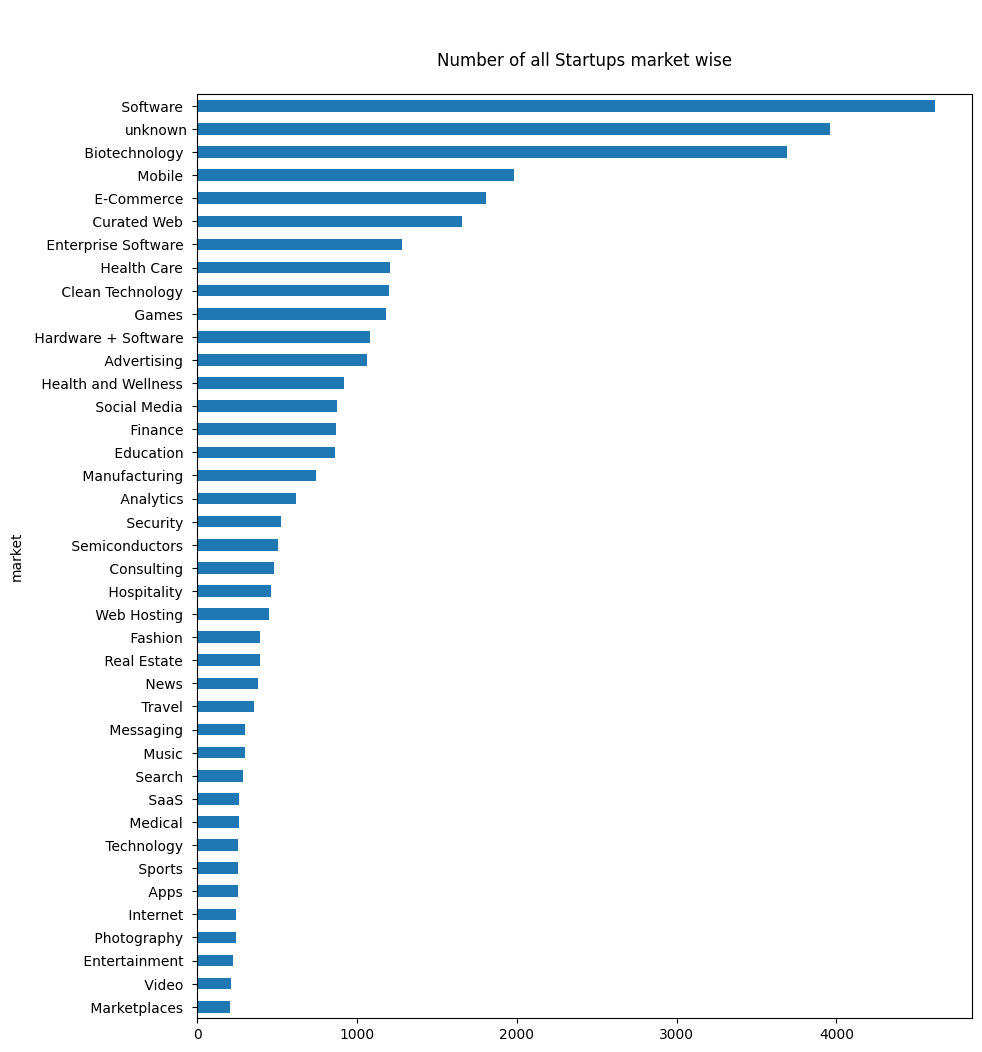

In [271]:
# @title MARKET
get_column_details(df,column='market',tittle='all',plt_req='barh',plot_size=(10,12))

Details of market column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  545
**************************************************

Count of No fund Startups market wise:

market
unknown           1457
 Software          569
 E-Commerce        344
 Curated Web       319
 Mobile            273
                  ... 
 Licensing           1
 Displays            1
 Realtors            1
 Bio-Pharm           1
 Rural Energy        1
Name: count, Length: 545, dtype: int64
**************************************************

Percentage of No fund Startups market wise:

market
unknown           17.09
 Software          6.68
 E-Commerce        4.04
 Curated Web       3.74
 Mobile            3.20
                  ...  
 Licensing         0.01
 Displays          0.01
 Realtors          0.01
 Bio-Pharm         0.01
 Rural Energy      0.01
Name: proportion, Length: 545, dtype: float64
******************

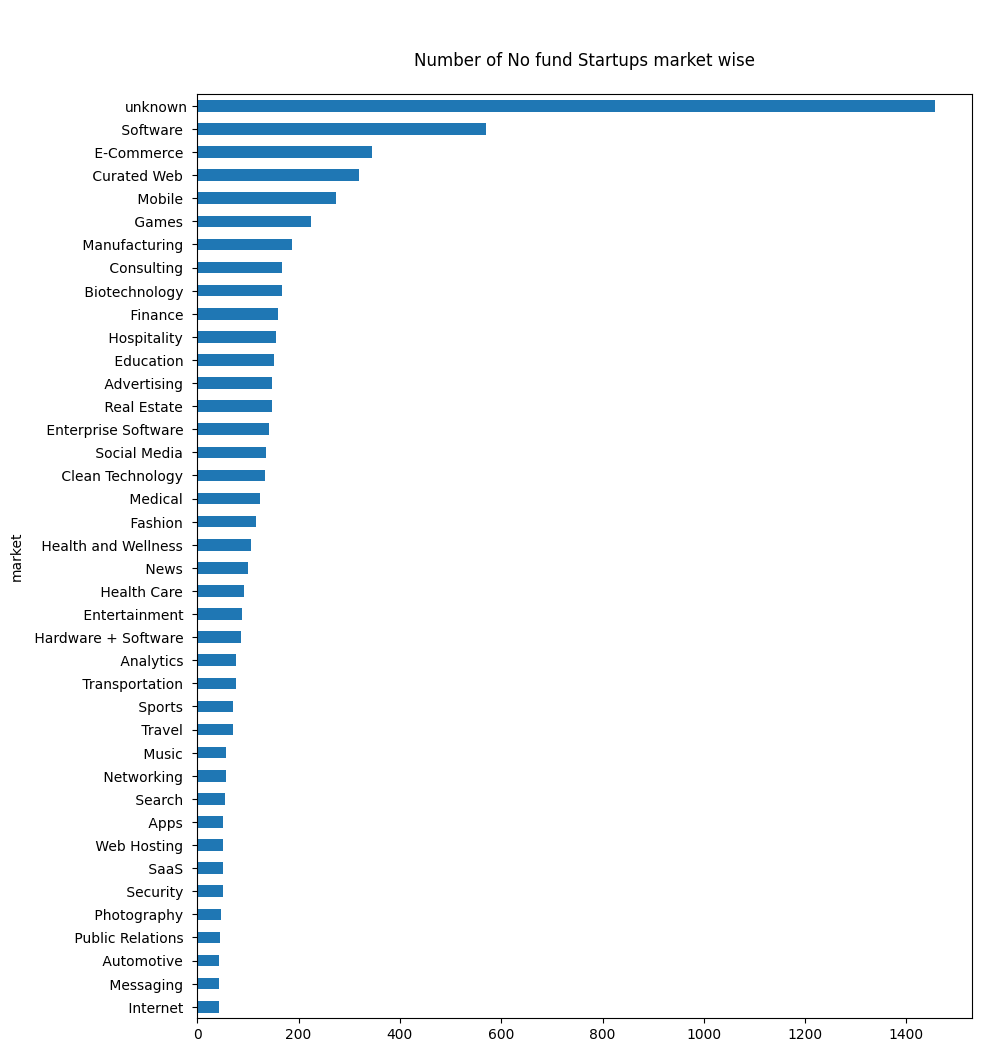

In [272]:
get_column_details(df_no_fund,column='market',tittle='No fund',plt_req='barh',plot_size=(10,12))

Details of market column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  742
**************************************************

Count of Outside Funding Startups market wise:

market
 Software                4050
 Biotechnology           3521
unknown                  2503
 Mobile                  1710
 E-Commerce              1461
                         ... 
 Contact Centers            1
 Baby Accessories           1
 Swimming                   1
 ICT                        1
 Clean Technology IT        1
Name: count, Length: 742, dtype: int64
**************************************************

Percentage of Outside Funding Startups market wise:

market
 Software                9.90
 Biotechnology           8.61
unknown                  6.12
 Mobile                  4.18
 E-Commerce              3.57
                         ... 
 Contact Centers         0.00
 Baby Accessories        

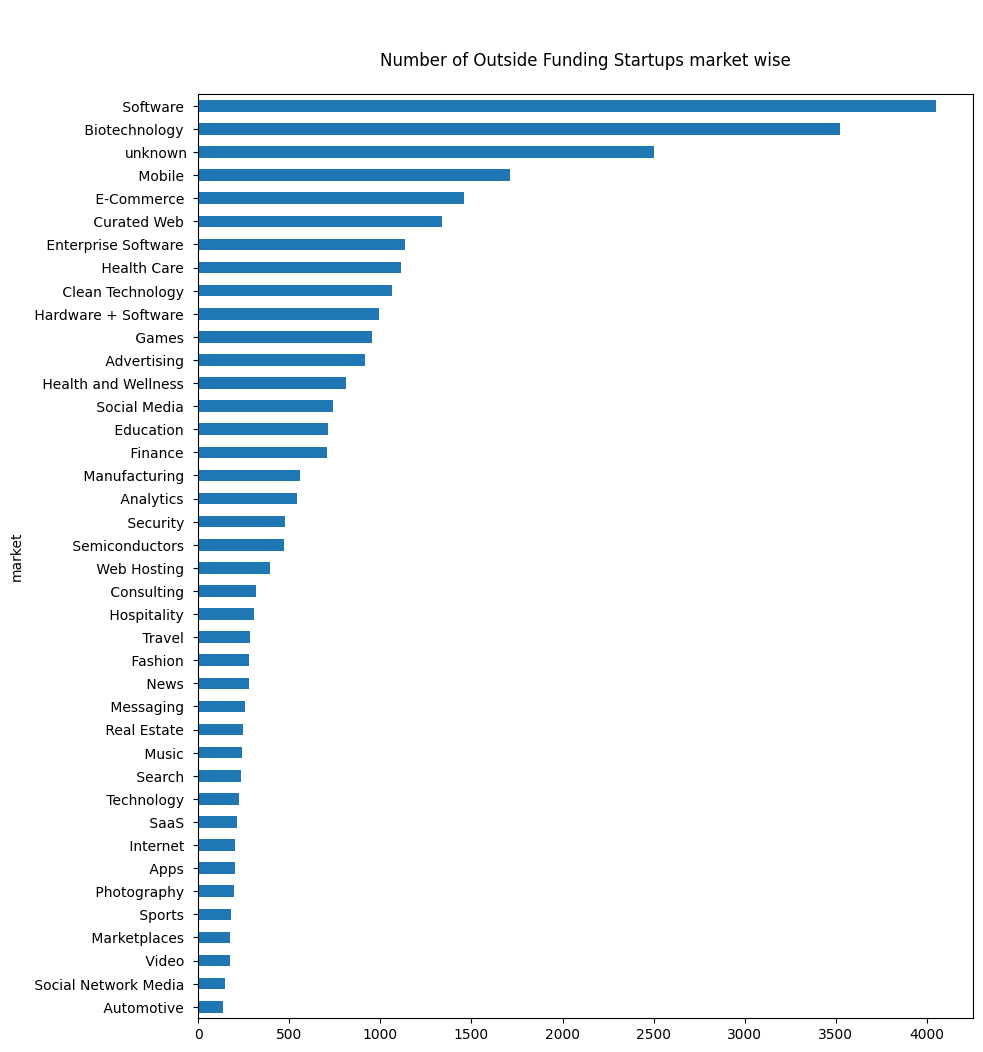

In [273]:
get_column_details(df_fund,column='market',tittle='Outside Funding',plt_req='barh',plot_size=(10,12))

Here's an analysis of the `market` feature, comparing overall data with subsets of funded and non-funded startups:

**Market Feature Analysis**

1. **Top Market Sectors**:
   - **Overall**: `Software` dominates (4,619 instances), followed by `Biotechnology` (3,688) and `Mobile` (1,983), reflecting high investment and startup density in tech-related sectors. The top markets likely capture the interest of both investors and entrepreneurs.
   - **Non-Funded Startups**: The most common sector is `unknown` (1,457 instances), followed by `Software` (569) and `E-Commerce` (344). This prevalence of `unknown` may indicate missing data or less-defined market segments that didn't attract funding.
   - **Funded Startups**: Though detailed counts are not listed, the dominance of `Software` and `Biotechnology` in the overall data likely suggests their prominence among funded startups.

2. **Impact of Market on Funding Likelihood**:
   - **Biotechnology** and **Software** appear among the most common markets in the overall dataset, suggesting they receive significant attention from investors, likely due to their scalability, innovation potential, and alignment with investor interests.
   - **Non-funded startups** are less represented in high-tech and specialized sectors like `Biotechnology`, which may imply a greater need for external investment to support R&D-heavy sectors.

3. **Diversity in Market Categories**:
   - **Overall Market Variety**: With 760 unique markets, the dataset spans a wide range of sectors. However, only a subset, such as `Software` and `Biotechnology`, shows high representation, hinting that certain sectors consistently attract more startups and funding interest.
   - **Non-Funded Market Variety**: This group has fewer unique market categories (544), with a notable presence of broad or niche sectors (e.g., `Curated Web`, `Realtors`), which might be smaller or less attractive to investors.
   - **Long Tail of Markets**: Both funded and non-funded datasets include rare sectors (like `Rural Energy` and `Remediation`) with only one entry, showing a long-tail effect where certain markets have minimal startup or investor interest.

4. **Unknown and Undefined Markets**:
   - `Unknown` appears frequently in non-funded startups (1,457 instances), representing sectors that are not well-defined. This lack of specification may impact funding prospects, as undefined market entries are less likely to attract investors.

5. **Emerging and Niche Sectors**:
   - **Rare Entries**: Sectors like `Internet Infrastructure` and `EDA Tools` appear only once in the overall dataset, indicating emerging or niche markets. These areas might represent opportunities for specialized investors or underserved startup niches.

Above points highlights that **sector type plays a significant role in attracting funding**, with tech and science-heavy sectors generally receiving more funding. Non-funded startups often appear in more generalized or niche markets, potentially with limited investor interest or self-sustaining business models.

Details of status column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4
**************************************************

Count of All Startups status wise:

status
operating    41821
acquired      3692
closed        2603
unknown       1314
Name: count, dtype: int64
**************************************************

Percentage of All Startups status wise:

status
operating    84.61
acquired      7.47
closed        5.27
unknown       2.66
Name: proportion, dtype: float64
**************************************************


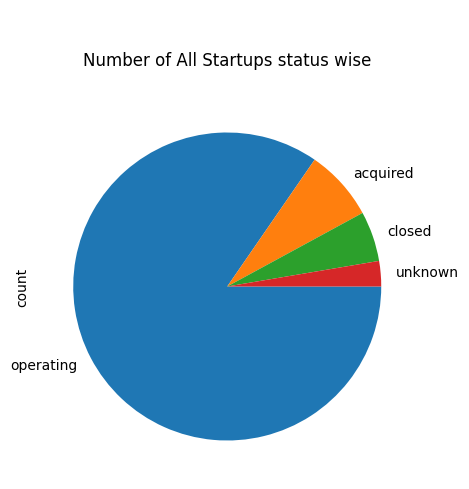

In [274]:
# @title STATUS
get_column_details(df,column='status',tittle='All',plot_size=(5,5),plt_req='pie')

Details of status column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4
**************************************************

Count of Without funding Startups status wise:

status
operating    7395
acquired      474
closed        445
unknown       209
Name: count, dtype: int64
**************************************************

Percentage of Without funding Startups status wise:

status
operating    86.77
acquired      5.56
closed        5.22
unknown       2.45
Name: proportion, dtype: float64
**************************************************


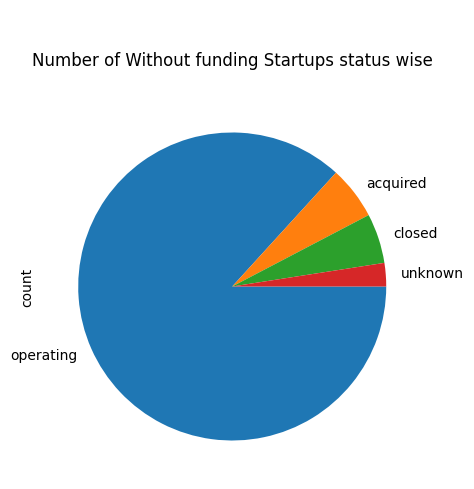

In [275]:
get_column_details(df_no_fund,column='status',tittle='Without funding',plot_size=(5,5),plt_req='pie')

Details of status column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4
**************************************************

Count of With funding Startups status wise:

status
operating    34426
acquired      3218
closed        2158
unknown       1105
Name: count, dtype: int64
**************************************************

Percentage of With funding Startups status wise:

status
operating    84.16
acquired      7.87
closed        5.28
unknown       2.70
Name: proportion, dtype: float64
**************************************************


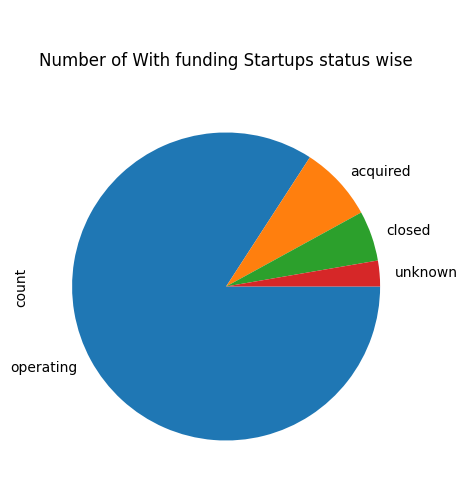

In [276]:
get_column_details(df_fund,column='status',tittle='With funding',plot_size=(5,5),plt_req='pie')


Here's analysis based on the **status of startups** across the entire dataset, and further segmented by funded and non-funded startups:

**Overall Status Analysis**

1. **Dominance of Operating Startups**:
   - **Count**: Out of the total startups, **41,821 (84.61%)** are still operating. This high percentage suggests that a majority of startups in the dataset are either in early or growth stages.
   - **Acquired and Closed**: **3,692 startups (7.47%)** were acquired, and **2,603 (5.27%)** have closed, which may indicate the competitive and high-failure nature of the startup environment.

2. **Proportion of Operating Startups with and without Funding**:
   - **Non-Funded Startups**: The majority (86.77%) of non-funded startups are operating, slightly higher than the overall percentage, showing that a lack of funding doesn’t necessarily correlate with closure or acquisition.
   - **Funded Startups**: Among funded startups, **84.16%** are operational, aligning closely with the overall proportion, indicating that funded startups have a similar operational rate as the general startup population.

**Acquisition and Closure Rates**

1. **Acquisition Trends**:
   - **Funded Startups**: The acquisition rate for funded startups is **7.87%**, slightly higher than the overall dataset, suggesting that external funding may correlate with higher acquisition potential.
   - **Non-Funded Startups**: Only **5.56%** of non-funded startups were acquired, indicating that funding plays a role in making startups more attractive for acquisition.

2. **Closure Rates**:
   - **Non-Funded Startups**: Non-funded startups have a closure rate of **5.22%**, nearly equivalent to the overall dataset's closure rate. This highlights that lack of funding doesn’t necessarily increase the likelihood of closure in comparison to funded startups.
   - **Funded Startups**: The closure rate for funded startups is **5.28%**, consistent with the overall dataset, implying that funding alone does not guarantee operational success.

**Key Takeaways**

- **Funding and Operational Success**: Both funded and non-funded startups show similar proportions of operating status, suggesting that while funding aids growth and acquisition potential, it doesn’t solely determine survival.
- **Acquisition and Funding**: Funded startups are more likely to be acquired (7.87%) than non-funded startups (5.56%), hinting at a correlation between funding and acquisition attractiveness.
- **Closure Rates**: The consistent closure rate (~5%) across all segments implies that closure might be influenced more by market conditions, competition, or product-market fit rather than funding status alone.
- **Data Completeness**: The percentage of unknown statuses remains low but steady, indicating manageable but present gaps in data accuracy.

This analysis provides insights into the impact of funding on a startup’s lifecycle, acquisition likelihood, and stability in the competitive market.

Details of country_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  116
**************************************************

Count of All Startups country_code wise:

country_code
USA       28793
Others     5269
GBR        2642
CAN        1405
CHN        1239
          ...  
ALB           1
MOZ           1
LIE           1
BRN           1
MAF           1
Name: count, Length: 116, dtype: int64
**************************************************

Percentage of All Startups country_code wise:

country_code
USA       58.25
Others    10.66
GBR        5.34
CAN        2.84
CHN        2.51
          ...  
ALB        0.00
MOZ        0.00
LIE        0.00
BRN        0.00
MAF        0.00
Name: proportion, Length: 116, dtype: float64
**************************************************


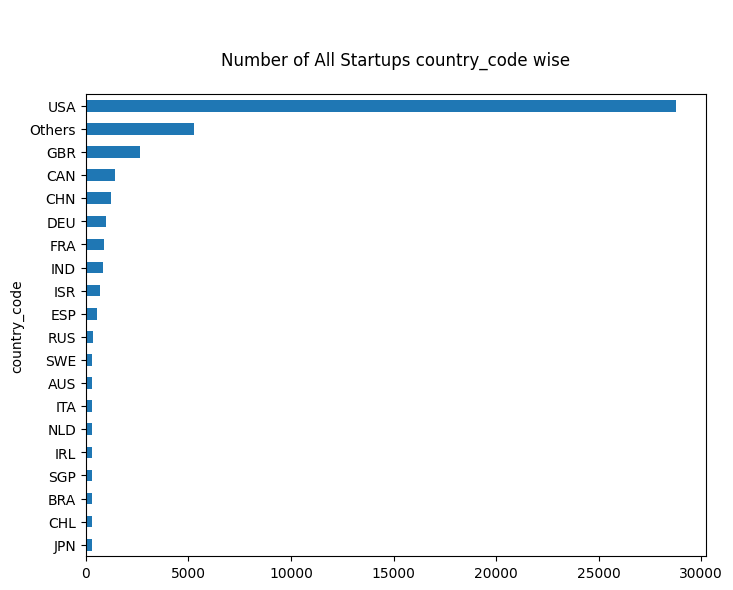

In [277]:
# @title COUNTRY
get_column_details(df,column='country_code',tittle='All',plot_size=(8,6),plt_req='barh',a=20)

Details of country_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  85
**************************************************

Count of No funding Startups country_code wise:

country_code
USA       4316
Others    1450
GBR        358
DEU        341
CHN        251
          ... 
TZA          1
HRV          1
BRN          1
BHR          1
MKD          1
Name: count, Length: 85, dtype: int64
**************************************************

Percentage of No funding Startups country_code wise:

country_code
USA       50.64
Others    17.01
GBR        4.20
DEU        4.00
CHN        2.94
          ...  
TZA        0.01
HRV        0.01
BRN        0.01
BHR        0.01
MKD        0.01
Name: proportion, Length: 85, dtype: float64
**************************************************


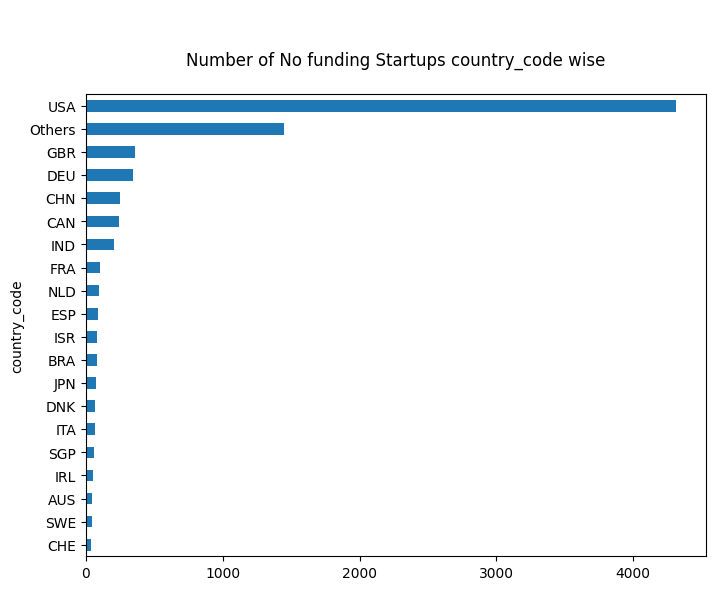

In [278]:
get_column_details(df_no_fund,column='country_code',tittle='No funding',plot_size=(8,6),plt_req='barh',a=20)

Details of country_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  111
**************************************************

Count of Funding Startups country_code wise:

country_code
USA       24477
Others     3819
GBR        2284
CAN        1165
CHN         988
          ...  
CIV           1
SOM           1
MKD           1
SYC           1
MAF           1
Name: count, Length: 111, dtype: int64
**************************************************

Percentage of Funding Startups country_code wise:

country_code
USA       59.84
Others     9.34
GBR        5.58
CAN        2.85
CHN        2.42
          ...  
CIV        0.00
SOM        0.00
MKD        0.00
SYC        0.00
MAF        0.00
Name: proportion, Length: 111, dtype: float64
**************************************************


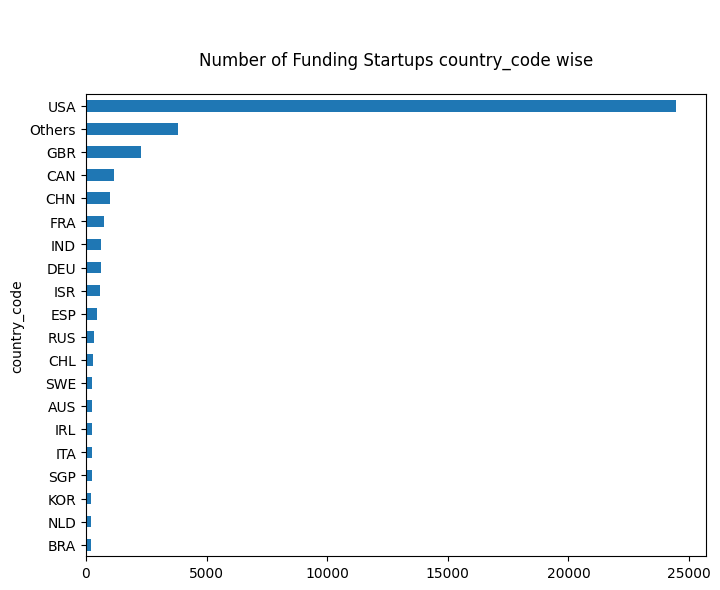

In [279]:
get_column_details(df_fund,column='country_code',tittle='Funding',plot_size=(8,6),plt_req='barh',a=20)


Analysis of **country-wise distribution** for startups, comparing all startups, non-funded startups, and funded startups:

**Overall Country Code Analysis**

1. **Top 10 Countries**:
   - **USA** leads significantly across all segments, with **28,793** startups overall, **4,316** without funding, and **24,477** with funding. This reflects the dominant presence of startups in the U.S., likely due to a robust entrepreneurial ecosystem and extensive funding opportunities.
   - Other top countries include **Great Britain (GBR)**, **Canada (CAN)**, **China (CHN)**, **Germany (DEU)**, **France (FRA)**, **India (IND)**, **Israel (ISR)**, and **Spain (ESP)**. These countries have a high concentration of both funded and non-funded startups, indicative of a developed startup ecosystem with active investment and innovation.

**Analysis of Top Funded vs. Non-Funded Countries**

1. **Funding Disparities**:
   - The top countries for non-funded startups include **USA, Others, GBR, DEU, and CHN**, where the distribution pattern mirrors the funded startups. However, countries like **Netherlands (NLD)** appear in the non-funded list but not as prominently in the funded segment, suggesting that certain regions might have vibrant startups with fewer local funding options.
   - **India** has **206 non-funded** startups versus **643 funded** startups, which indicates a higher potential to attract funding, possibly due to government initiatives or increasing interest from foreign investors.

2. **Bottom 10 Countries**:
   - Several countries appear only once or twice across all segments, such as **Liechtenstein (LIE)**, **Jersey (JEY)**, **Uzbekistan (UZB)**, **Monaco (MCO)**, and **Oman (OMN)**. This long-tail distribution shows that startups are present globally, even in countries with limited startup ecosystems, but funding presence is often minimal in these regions.

3. **Regional Influence on Funding**:
   - Regions with developed startup ecosystems (USA, UK, Israel, etc.) have more startups with external funding, indicating a direct correlation between a country’s ecosystem maturity and its ability to attract investment.
   - Countries with limited funding (like **Saudi Arabia, Iceland, and Croatia**) appear in the non-funded tail, which might suggest either limited investor interest in these regions or challenges in scaling startups to attract global investors.

**Key Takeaways**

- **USA Dominance**: The USA consistently leads across all metrics, emphasizing its global influence in the startup landscape.
- **Global Distribution**: While startups are globally spread, funding is concentrated in countries with developed ecosystems, and startups in less prominent regions appear more frequently without external funding.
- **Investment Hotspots**: Countries like **Israel, India, and China** have a notable presence in the funded list, showcasing strong investor interest in their tech sectors.

This analysis highlights both the global reach and the regional disparities in funding across countries, indicating areas of potential growth and established hubs for startup investments.

Details of state_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  62
**************************************************

Count of All Startups state_code wise:

state_code
Others    19269
CA         9917
NY         2914
MA         1969
TX         1466
          ...  
MB           13
AK           12
NB            8
SK            4
PE            2
Name: count, Length: 62, dtype: int64
**************************************************

Percentage of All Startups state_code wise:

state_code
Others    38.98
CA        20.06
NY         5.90
MA         3.98
TX         2.97
          ...  
MB         0.03
AK         0.02
NB         0.02
SK         0.01
PE         0.00
Name: proportion, Length: 62, dtype: float64
**************************************************


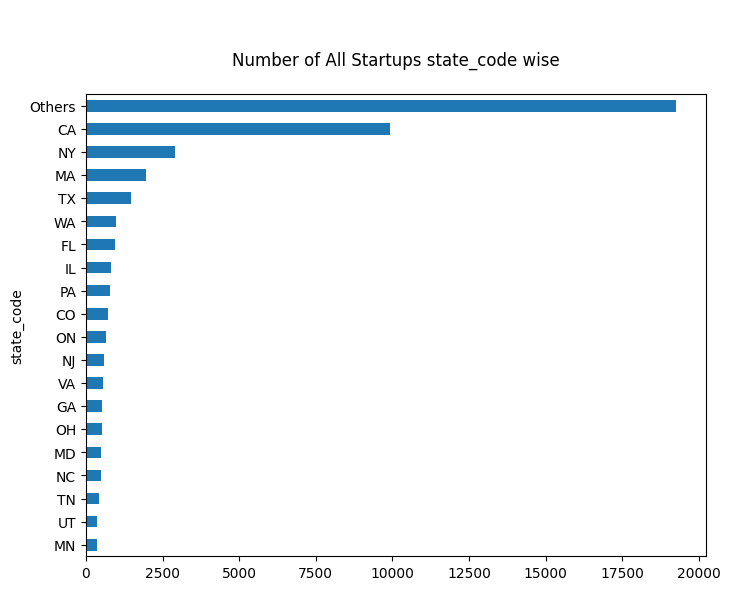

In [280]:
# @title STATE
get_column_details(df,column='state_code',tittle='All',plot_size=(8,6),plt_req='barh',a=20)

Details of state_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  61
**************************************************

Count of No funding Startups state_code wise:

state_code
Others    3981
CA        1298
NY         422
TX         234
FL         224
          ... 
MB           3
ND           3
ME           2
SK           2
NB           1
Name: count, Length: 61, dtype: int64
**************************************************

Percentage of No funding Startups state_code wise:

state_code
Others    46.71
CA        15.23
NY         4.95
TX         2.75
FL         2.63
          ...  
MB         0.04
ND         0.04
ME         0.02
SK         0.02
NB         0.01
Name: proportion, Length: 61, dtype: float64
**************************************************


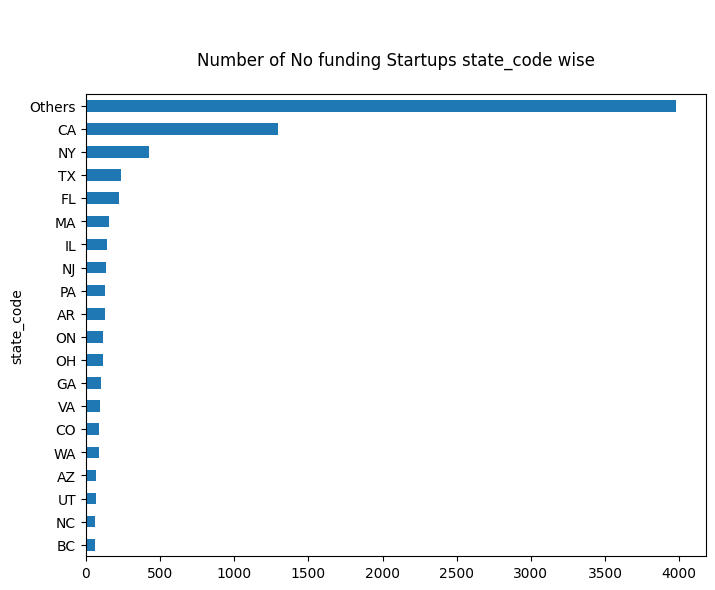

In [281]:
get_column_details(df_no_fund,column='state_code',tittle='No funding',plot_size=(8,6),plt_req='barh',a=20)

Details of state_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  62
**************************************************

Count of Funding Startups state_code wise:

state_code
Others    15288
CA         8619
NY         2492
MA         1812
TX         1232
          ...  
AK            9
SD            9
NB            7
SK            2
PE            2
Name: count, Length: 62, dtype: int64
**************************************************

Percentage of Funding Startups state_code wise:

state_code
Others    37.37
CA        21.07
NY         6.09
MA         4.43
TX         3.01
          ...  
AK         0.02
SD         0.02
NB         0.02
SK         0.00
PE         0.00
Name: proportion, Length: 62, dtype: float64
**************************************************


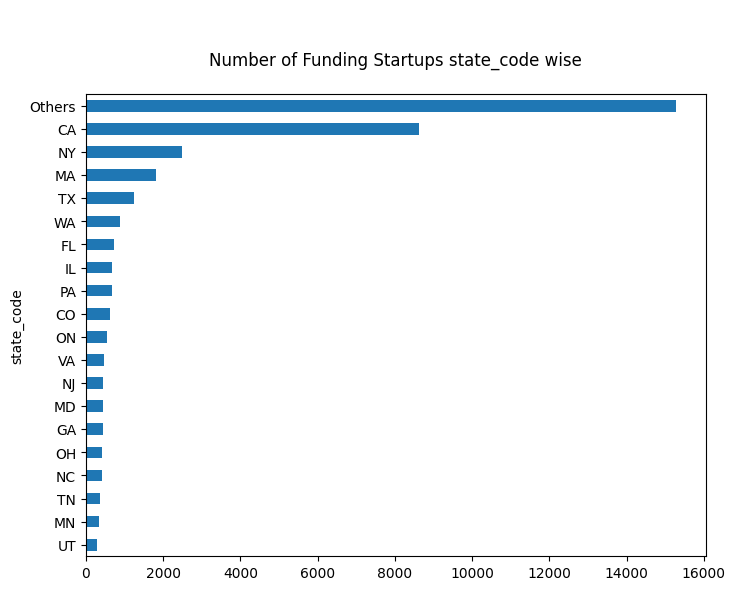

In [282]:
get_column_details(df_fund,column='state_code',tittle='Funding',plot_size=(8,6),plt_req='barh',a=20)

Here's a breakdown of the **state-wise distribution** for startups across all, non-funded, and funded categories, with a focus on valid state data:

**Overall State Analysis**

1. **Top 10 States**:
   - **California (CA)** leads across all categories, with **9,917** startups overall, **1,298** non-funded startups, and **8,619** funded startups, reflecting its strong role as the primary U.S. startup hub due to Silicon Valley.
   - Other key states with high startup counts include **New York (NY)**, **Massachusetts (MA)**, **Texas (TX)**, **Washington (WA)**, and **Florida (FL)**. These states consistently rank high in both funded and non-funded lists, highlighting their developed ecosystems.

2. **Significant Funding Disparities**:
   - **New York (NY)** and **Massachusetts (MA)** have higher numbers of funded startups (NY: **2,492**, MA: **1,812**) compared to non-funded ones (NY: **422**, MA: **157**). This indicates robust investment interest in these regions, likely due to established financial and tech sectors.
   - **Texas (TX)** and **Florida (FL)** have substantial non-funded startups (TX: **234**, FL: **224**), showing potential growth areas that may not yet attract as much funding as other regions.

3. **States with Less Representation**:
   - States like **Illinois (IL)**, **Pennsylvania (PA)**, and **Colorado (CO)** have significant startup counts but comparatively fewer non-funded startups, suggesting a better funding environment or early access to investment in these areas.
   - Other regions, like **North Dakota (ND)**, **West Virginia (WV)**, **South Dakota (SD)**, and **Wyoming (WY)** appear in the tail of both funded and non-funded lists, indicating limited startup presence and funding opportunities.

4. **Emerging Markets**:
   - **Colorado (CO)** shows up in the top 10 funded states with **630** startups, reflecting a developing startup environment that’s beginning to attract investor attention.
   - **Arkansas (AR)** appears prominently among non-funded startups (127), hinting at a growing startup base in the region but perhaps limited in its current funding appeal.

**Key Takeaways**

- **California Dominance**: CA leads by a significant margin, solidifying its position as a global startup and investment hub.
- **Established Ecosystems**: States like **NY, MA, TX, and WA** consistently appear in funded lists, showing they are hotspots for investor interest and startup activity.
- **Potential Growth Areas**: Regions like **FL, IL, and PA** indicate steady startup activity with mixed funding levels, suggesting potential growth opportunities for local ecosystems.
- **Underrepresented States**: ND, WV, SD, and WY have minimal startup counts, which may indicate room for regional development or funding expansion efforts in these areas.

This distribution highlights the concentration of startup activity and funding within the most developed U.S. ecosystems, with emerging regions showing growth potential.

Details of region column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  1090
**************************************************

Count of All Startups region wise:

region
SF Bay Area        6804
Others             5269
New York City      2577
Boston             1837
London             1588
                   ... 
Palma Del Río         1
Harbin                1
Teddington            1
Borehamwood           1
Buckinghamshire       1
Name: count, Length: 1090, dtype: int64
**************************************************

Percentage of All Startups region wise:

region
SF Bay Area        13.76
Others             10.66
New York City       5.21
Boston              3.72
London              3.21
                   ...  
Palma Del Río       0.00
Harbin              0.00
Teddington          0.00
Borehamwood         0.00
Buckinghamshire     0.00
Name: proportion, Length: 1090, dtype: float64
*

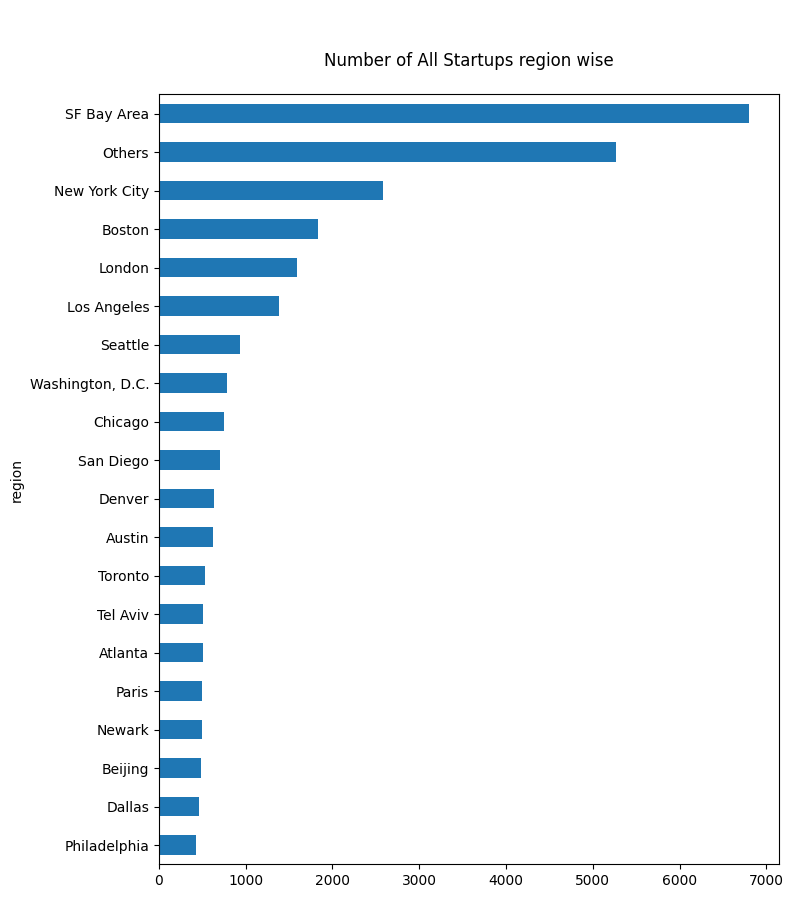

In [283]:
# @title REGION
get_column_details(df,column='region',tittle='All',plot_size=(8,10),plt_req='barh',a=20)

Details of region column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  627
**************************************************

Count of Without Funding Startups region wise:

region
Others                1450
SF Bay Area            810
New York City          349
Los Angeles            249
London                 233
                      ... 
Tralee                   1
Halle An Der Saale       1
SAU - Other              1
Wolverhampton            1
Muenchen                 1
Name: count, Length: 627, dtype: int64
**************************************************

Percentage of Without Funding Startups region wise:

region
Others                17.01
SF Bay Area            9.50
New York City          4.09
Los Angeles            2.92
London                 2.73
                      ...  
Tralee                 0.01
Halle An Der Saale     0.01
SAU - Other            0.01
Wolverhampton   

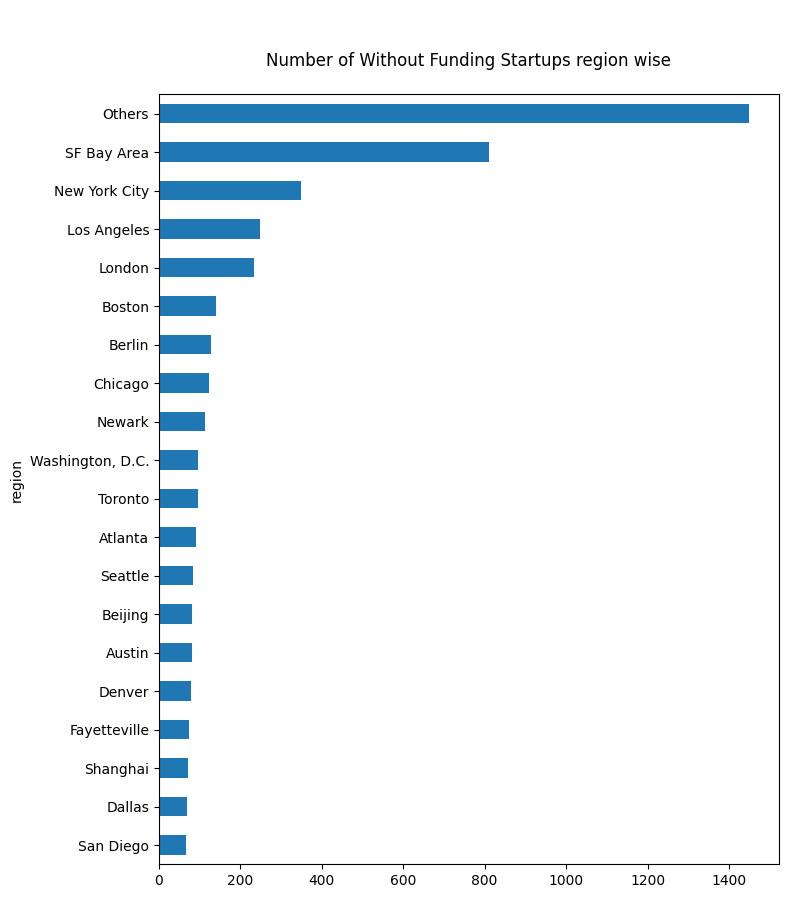

In [284]:
get_column_details(df_no_fund,column='region',tittle='Without Funding',plot_size=(8,10),plt_req='barh',a=20)

Details of region column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  1032
**************************************************

Count of Funding Startups region wise:

region
SF Bay Area        5994
Others             3819
New York City      2228
Boston             1697
London             1355
                   ... 
Lachine               1
SAU - Other           1
Paisley               1
Guwahati              1
Buckinghamshire       1
Name: count, Length: 1032, dtype: int64
**************************************************

Percentage of Funding Startups region wise:

region
SF Bay Area        14.65
Others              9.34
New York City       5.45
Boston              4.15
London              3.31
                   ...  
Lachine             0.00
SAU - Other         0.00
Paisley             0.00
Guwahati            0.00
Buckinghamshire     0.00
Name: proportion, Length: 1032, dtype: f

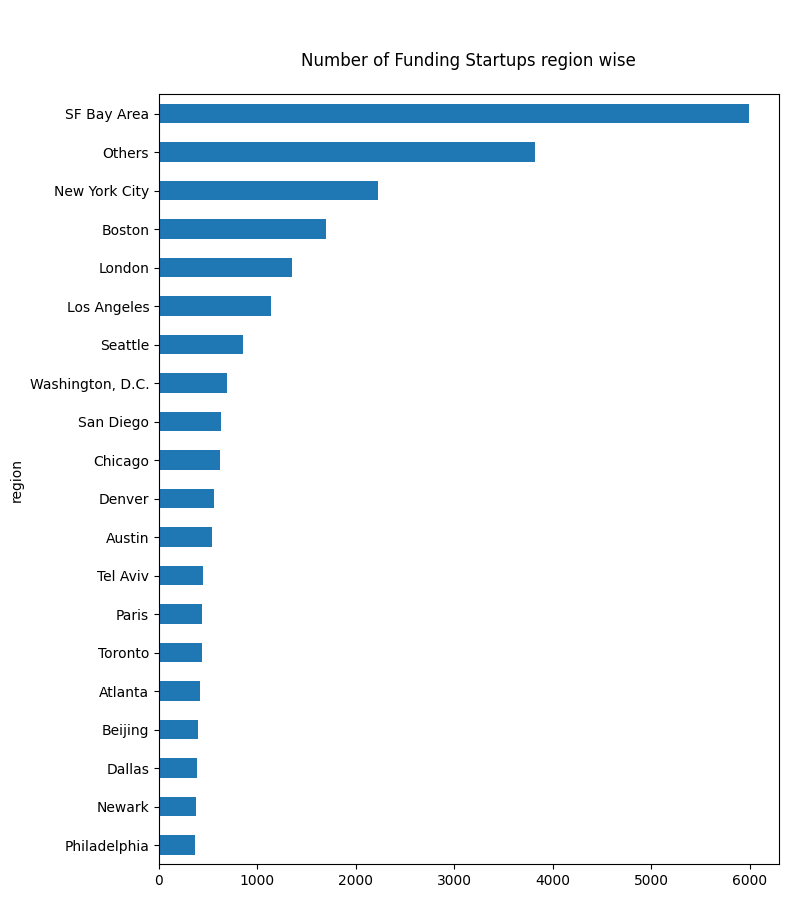

In [285]:
get_column_details(df_fund,column='region',tittle='Funding',plot_size=(8,10),plt_req='barh',a=20)

Here’s an analysis of **regions** in terms of startup concentration and funding status:

**General Analysis of Regions**

1. **Leading Startup Regions**:
   - **SF Bay Area** leads by a wide margin in both overall startups (**6,804**), funded startups (**5,994**), and non-funded startups (**810**), emphasizing Silicon Valley’s role as the epicenter for innovation and investment.
   - **New York City**, **Boston**, **London**, and **Los Angeles** rank high across all categories, underscoring their established startup ecosystems. NYC, in particular, shows **2,577** total startups, with **2,228** funded, indicating robust funding support.

2. **Funding Distribution Across Regions**:
   - Major funding hubs beyond SF Bay Area include **New York City**, **Boston**, and **London**. NYC and Boston, for example, display high funding rates relative to total startup count, showing mature investor support.
   - **Seattle, Washington, D.C., Chicago,** and **San Diego** also show significant funded startup counts, highlighting their roles as emerging startup markets with a strong funding environment.

3. **Non-Funded Startup Trends**:
   - Regions like **Berlin** and **Toronto** appear significantly in the non-funded category, suggesting potential growth regions where startups may still be in early stages or facing funding barriers.
   - **Fayetteville** and **Shanghai** are notable non-funded regions, with a relatively high presence of startups but limited external funding, suggesting potential for future ecosystem growth.

4. **Global Presence**:
   - **London**, **Paris**, and **Tel Aviv** show a balanced distribution between funded and non-funded startups, reflecting their established and maturing startup cultures.
   - Asian cities like **Beijing** and **Shanghai** also feature, with more startups in need of funding support, suggesting untapped potential in these regions.

**Key Takeaways**

- **SF Bay Area Dominance**: SF Bay Area remains the leader in both startup numbers and funding availability.
- **Funding Gaps in Growth Markets**: Regions like Berlin and Toronto show active startup environments with funding limitations, signaling potential investment opportunities.
- **Global Hubs**: London and Tel Aviv reflect mature international startup environments with strong funding support, while cities like Beijing have active startup scenes with untapped funding potential.

This regional distribution highlights the concentrated funding in a few core regions while underscoring emerging global markets with room for ecosystem development.

Details of city column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4189
**************************************************

Count of All Startups city wise:

city
Others                   6112
San Francisco            2615
New York                 2334
London                   1257
Palo Alto                 597
                         ... 
Pekin                       1
Fort Ripley                 1
Chelyabinsk-40              1
Yavneh                      1
Damansara New Village       1
Name: count, Length: 4189, dtype: int64
**************************************************

Percentage of All Startups city wise:

city
Others                   12.36
San Francisco             5.29
New York                  4.72
London                    2.54
Palo Alto                 1.21
                         ...  
Pekin                     0.00
Fort Ripley               0.00
Chelyabinsk-40     

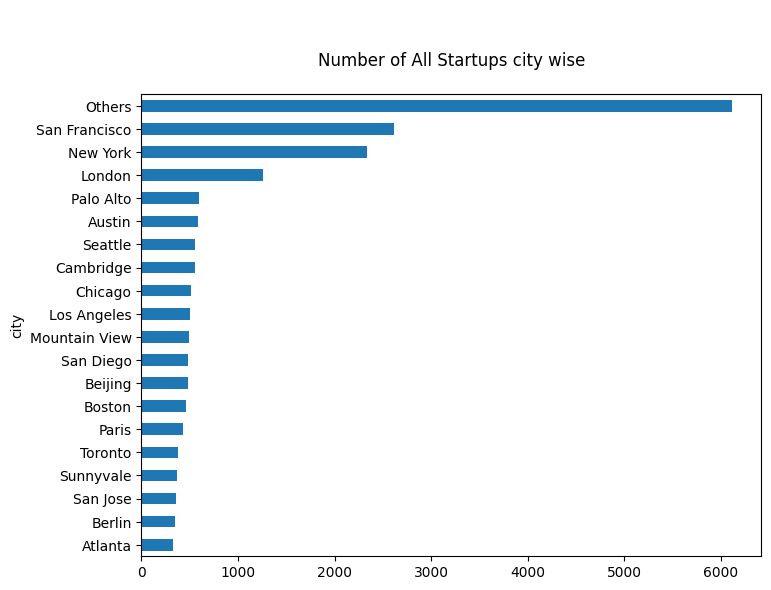

In [286]:
# @title CITY
get_column_details(df,column='city',tittle='All',plot_size=(8,6),plt_req='barh',a=20)

Details of city column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  1827
**************************************************

Count of Without funding Startups city wise:

city
Others           1607
San Francisco     342
New York          310
London            203
Berlin            123
                 ... 
Coppell             1
Glencoe             1
Las Cruces          1
Creswell            1
Zwolle              1
Name: count, Length: 1827, dtype: int64
**************************************************

Percentage of Without funding Startups city wise:

city
Others           18.85
San Francisco     4.01
New York          3.64
London            2.38
Berlin            1.44
                 ...  
Coppell           0.01
Glencoe           0.01
Las Cruces        0.01
Creswell          0.01
Zwolle            0.01
Name: proportion, Length: 1827, dtype: float64
*******************************

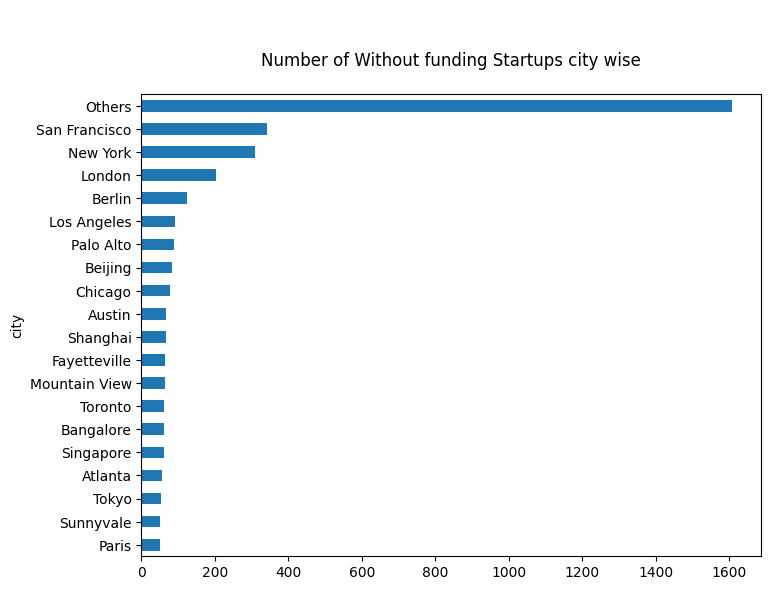

In [287]:
get_column_details(df_no_fund,column='city',tittle='Without funding',plot_size=(8,6),plt_req='barh',a=20)

Details of city column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  3587
**************************************************

Count of Funding Startups city wise:

city
Others                   4505
San Francisco            2273
New York                 2024
London                   1054
Austin                    516
                         ... 
West End                    1
Ronkonkoma                  1
Uzerche                     1
Trois-rivières              1
Damansara New Village       1
Name: count, Length: 3587, dtype: int64
**************************************************

Percentage of Funding Startups city wise:

city
Others                   11.01
San Francisco             5.56
New York                  4.95
London                    2.58
Austin                    1.26
                         ...  
West End                  0.00
Ronkonkoma                0.00
Uzerche    

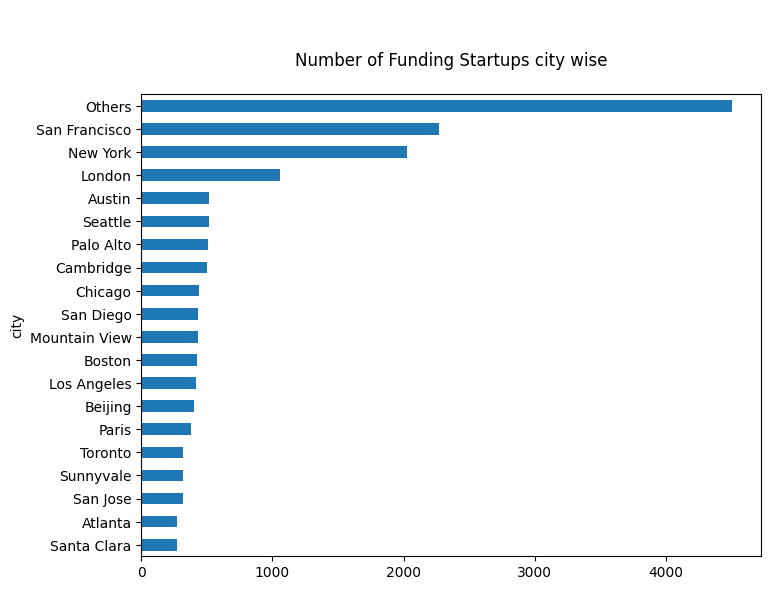

In [288]:
get_column_details(df_fund,column='city',tittle='Funding',plot_size=(8,6),plt_req='barh',a=20)

Here’s an analysis of startups based on **city** data, focusing on their funding status:

**General Overview of Cities**

1. **Leading Cities for Startups**:
   - **San Francisco** leads with **2,615** total startups, indicating its dominance as a primary tech hub. This is closely followed by **New York** (**2,334**) and **London** (**1,257**), highlighting these cities as major global centers for innovation and investment.
   - Cities like **Austin** and **Seattle** also appear significant, with **583** and **554** startups, respectively, showcasing their growing startup ecosystems.

2. **Funding Distribution**:
   - **San Francisco** again tops the list for funded startups with **2,273**, followed by **New York** (**2,024**) and **London** (**1,054**), reinforcing their positions as well-supported environments for startups.
   - The presence of high numbers of startups in **Palo Alto** and **Cambridge** indicates strong local funding ecosystems, particularly for tech-related ventures.

3. **Non-Funded Startups**:
   - Cities with notable non-funded startup counts include **San Francisco** (**342**) and **New York** (**310**), but they still maintain a relatively high funded presence, indicating healthy ecosystems where startups may either still be in early stages or struggling to secure funding.
   - Other cities like **Berlin** (**123**) and **Los Angeles** (**91**) also show some non-funded startups, suggesting potential growth areas where startups may need additional support.

**Detailed Insights**

- **Diversity in Startup Ecosystems**: The presence of **Others** (missing values) is significant in all categories, indicating a diverse range of startup environments across various regions.
- **Potential Growth Markets**: Cities like **Austin**, **Chicago**, and **Atlanta** showcase potential as emerging markets with substantial numbers of startups but with varying levels of funding support.
- **International Dynamics**: The inclusion of cities like **Beijing**, **Berlin**, **Singapore**, and **Tokyo** reflects the global nature of the startup ecosystem, with international cities exhibiting varying degrees of funding success.
- **Bangalore** and **Mumbai** are prominent in the startup landscape, with Bangalore being the leading tech hub, attracting significant funding and talent.
- Other cities like **Delhi** and **Hyderabad** are also emerging as strong players in the startup ecosystem, showcasing a growing number of innovative ventures and investments.

**Key takeaways**

- **Concentration in Major Hubs**: The analysis highlights a concentration of startups and funding in major cities like San Francisco, New York, and London, which are key drivers of innovation.
- **Opportunities for Emerging Markets**: Cities with fewer funded startups indicate opportunities for investment and development, especially in cities like Berlin and Toronto, which have significant non-funded startup populations.
- **Balanced Growth**: Overall, while major cities dominate, the presence of startups in a variety of locations suggests a vibrant and expanding global startup ecosystem, with potential growth avenues in various urban centers.

Details of category_list column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  824
**************************************************

Count of All Startups category_list wise:

category_list
Software                    6881
Mobile                      4430
Biotechnology               4005
unknown                     3960
E-Commerce                  3238
                            ... 
Shipping Broker Industry       1
Motors                         1
Content Summarization          1
Real                           1
Clean Technology IT            1
Name: count, Length: 824, dtype: int64
**************************************************

Percentage of All Startups category_list wise:

category_list
Software                    6.65
Mobile                      4.28
Biotechnology               3.87
unknown                     3.83
E-Commerce                  3.13
                          

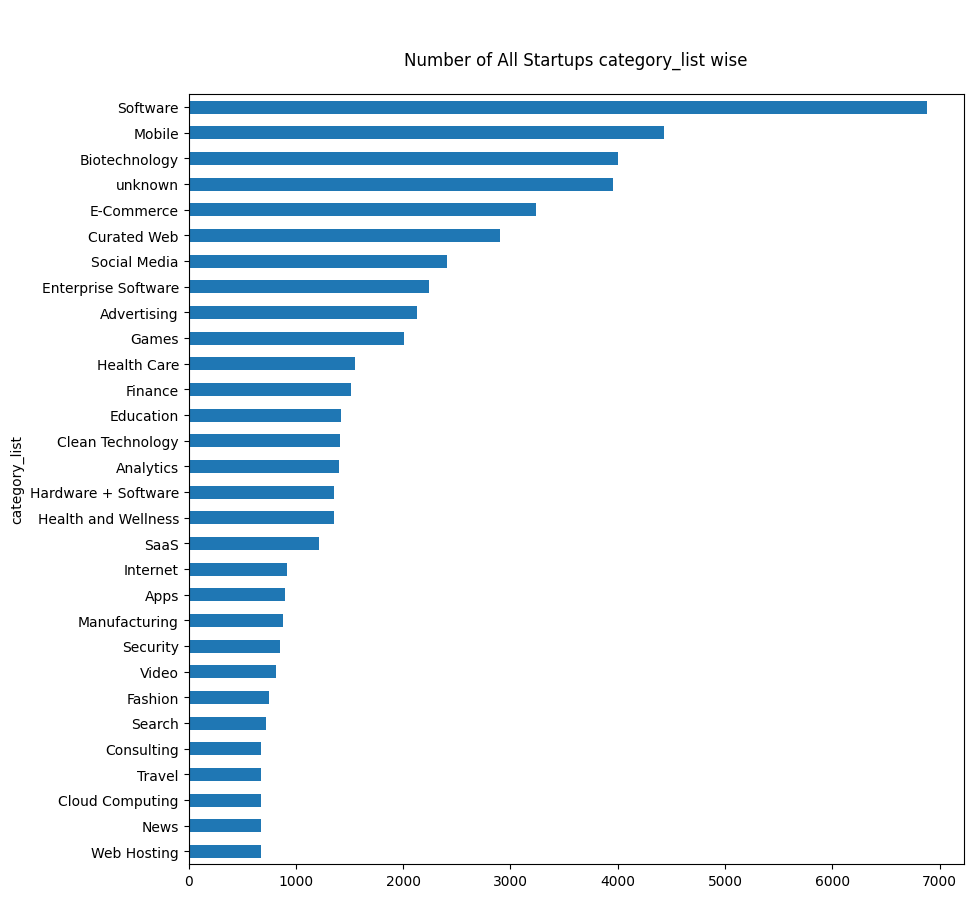

In [289]:
# @title CATEGORY_LIST
df_1=df.explode('category_list')
get_column_details(df_1,column='category_list',tittle='All',plot_size=(10,10),plt_req='barh',a=30)

Details of category_list column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  687
**************************************************

Count of Without funding Startups category_list wise:

category_list
unknown                   1457
Software                   888
Mobile                     600
E-Commerce                 574
Curated Web                512
                          ... 
Comics                       1
Edutainment                  1
Contact Centers              1
Low Bid Auctions             1
Data Center Automation       1
Name: count, Length: 687, dtype: int64
**************************************************

Percentage of Without funding Startups category_list wise:

category_list
unknown                   8.82
Software                  5.37
Mobile                    3.63
E-Commerce                3.47
Curated Web               3.10
                          ... 
Com

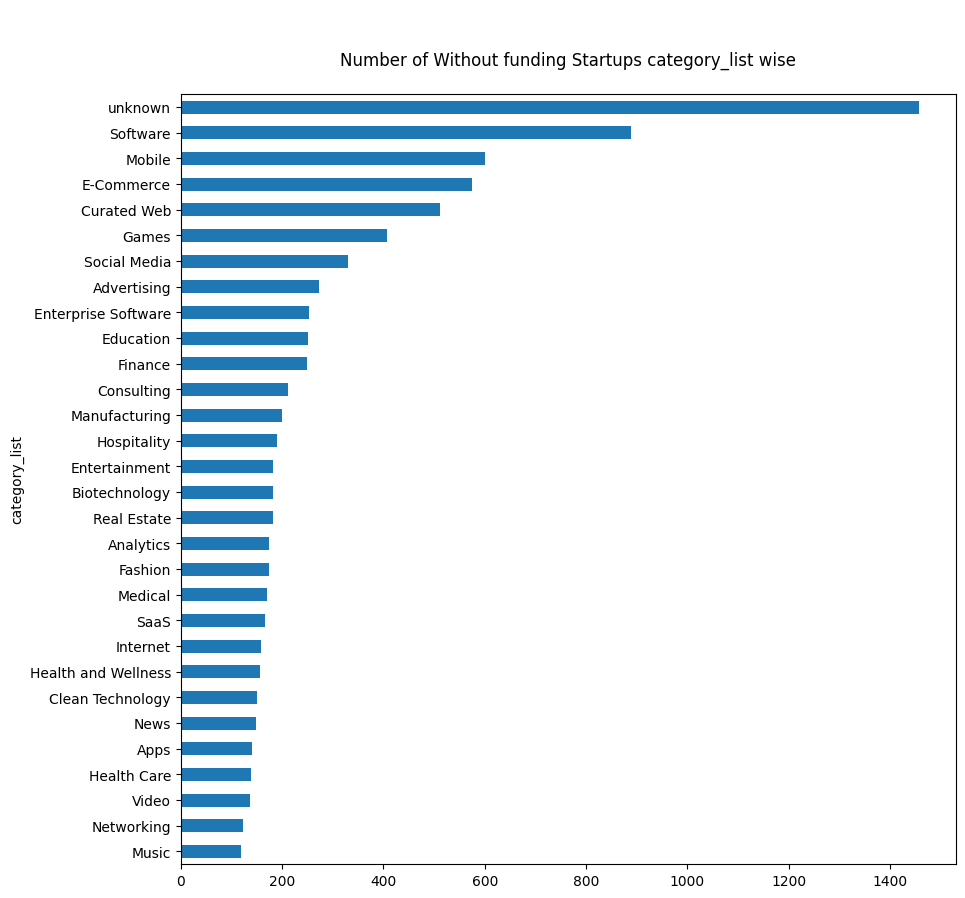

In [290]:
df_no_fund_1=df_no_fund.explode('category_list')
get_column_details(df_no_fund_1,column='category_list',tittle='Without funding',plot_size=(10,10),plt_req='barh',a=30)

Details of category_list column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  815
**************************************************

Count of Funding Startups category_list wise:

category_list
Software                          5993
Mobile                            3830
Biotechnology                     3822
E-Commerce                        2664
unknown                           2503
                                  ... 
Technical Continuing Education       1
Unmanned Air Systems                 1
Mob                                  1
English Speaking Caribbean           1
Clean Technology IT                  1
Name: count, Length: 815, dtype: int64
**************************************************

Percentage of Funding Startups category_list wise:

category_list
Software                          6.89
Mobile                            4.40
Biotechnology                     4.40


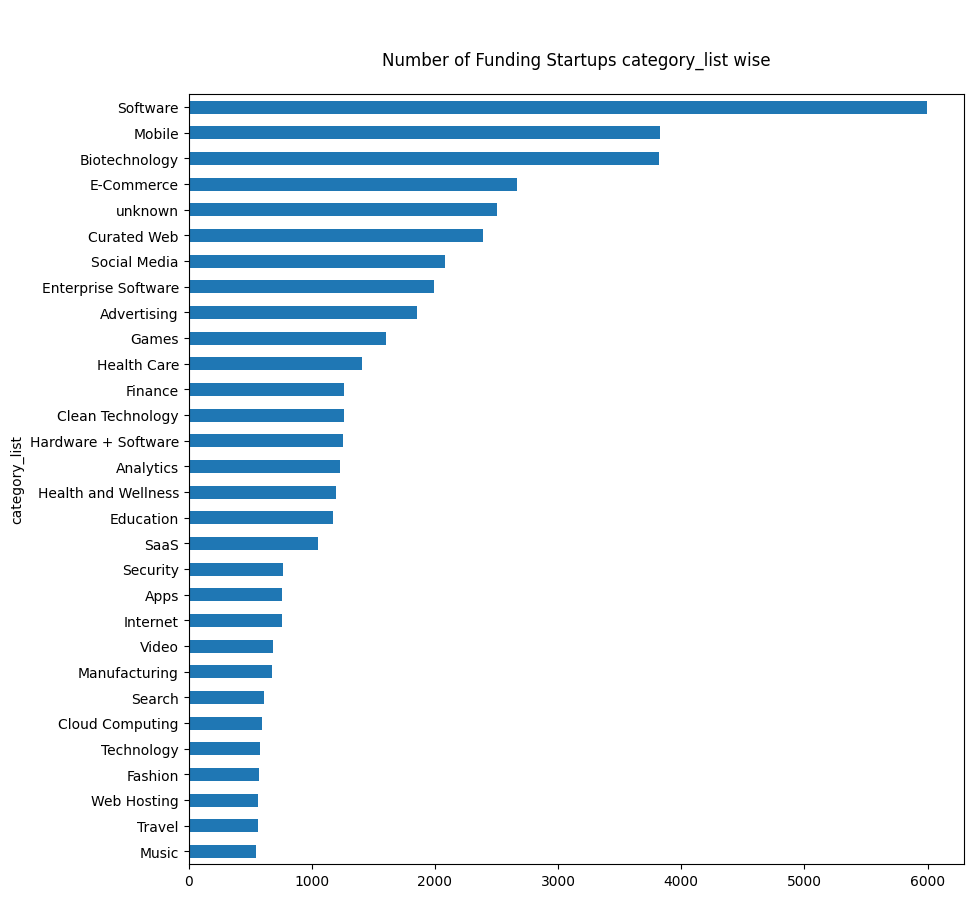

In [291]:
df_fund_1=df_fund.explode('category_list')
get_column_details(df_fund_1,column='category_list',tittle='Funding',plot_size=(10,10),plt_req='barh',a=30)

**Analysis of Category Distribution**

**Overall Trends**
- **Software** remains the leading category across all startups, with **6881** total startups, reflecting a consistent demand for software solutions in the market.
- **Mobile** and **Biotechnology** follow, with **4430** and **4005** startups respectively, indicating robust growth and interest in these areas as well.

**For Startups with No Funding**
- **Software** (888) and **Mobile** (600) continue to be prominent, but the **unknown** category (1457) is significantly high. This may suggests that many startups do not report their category, potentially limiting their visibility to investors.
- **E-Commerce** (574) shows moderate representation, aligning with the increasing digital shopping trends, while categories like **Consulting** (211) and **Manufacturing** (199) suggest niche interests.

**For Funded Startups**
- **Software** (5993) remains a key player, though there is a slight decrease compared to non-funded startups.
- **Mobile** sees a decline to **3830**, and **E-Commerce** is at **2664**, showing that funding is more concentrated in established technology sectors.
- **Health Care** (1409) and **Clean Technology** (1259) reflect heightened investor interest in sectors addressing critical global challenges, aligning with market trends.

**Comparison with Market Trends**
1. **Consistency in Software Demand:**
   - The dominance of the **Software** category in both the funded and unfunded segments mirrors market trends, where software development and digital transformation are driving growth.

2. **High Proportion of 'Unknown':**
   - The high percentage of **unknown** categories in non-funded startups indicates a discrepancy compared to the market, where well-defined categories are essential for attracting investment.

3. **Emerging Sectors:**
   - The **Biotechnology** and **Clean Technology** sectors have increased visibility in funded startups, which aligns with growing investor focus on health and sustainability in the market.

**Key Takeaways**

While the category distribution largely reflects market trends, the significant number of startups classified as **unknown** indicates an area for improvement in how startups present themselves to potential investors. Focusing on defining their categories better may enhance their chances of receiving funding.AS category and market indicates same behaviour I will be dropping category column for further analysis.



## *Descriptive Analysis of DateTime Columns*

In [292]:
df.describe(include='datetime')

first_funding_at                last_funding_at
count                          49430                          49430
mean   2011-03-13 01:26:33.089217024  2012-01-19 12:35:51.697349632
min              1921-09-01 00:00:00            1921-09-01 00:00:00
25%              2009-08-24 00:00:00            2010-10-14 00:00:00
50%              2011-12-12 00:00:00            2012-12-07 00:00:00
75%              2013-08-01 00:00:00            2014-02-01 00:00:00
max              2014-12-31 00:00:00            2015-01-01 00:00:00

In [293]:
df_fund.describe(include='datetime')
df_no_fund.describe(include='datetime')

first_funding_at                last_funding_at
count                           8523                           8523
mean   2011-07-01 00:39:11.847941120  2011-08-12 20:21:12.228088832
min              1960-01-01 00:00:00            1960-01-01 00:00:00
25%              2010-08-02 00:00:00            2010-10-01 00:00:00
50%              2012-07-31 00:00:00            2012-08-27 00:00:00
75%              2013-11-08 00:00:00            2013-12-02 12:00:00
max              2014-12-20 00:00:00            2015-01-01 00:00:00

The provided data represents statistics for the first and last funding dates of a dataset of startups.
First Funding Date mean is `March 13, 2011` and Last Funding Date mean is `January 19, 2012`
The mean first funding date is approximately 8 months before the mean last funding date. This shows that most startups receive funding relatively soon after their initial round.

**Min and Max Dates**

- First Funding: The earliest recorded first funding date is September 1, 1921, while the latest is December 31, 2014.
- Last Funding: Similarly, the earliest last funding date is also September 1, 1921, and the latest is January 1, 2015. This broad range in dates indicates that there are historical startups in the dataset, but the majority of activity seems to cluster around the early 2010s.<br>

**Quartiles**

- 25th Percentile (Q1): First Funding: August 24, 2009<br>
Last Funding: October 14, 2010<br>
- 50th Percentile (Median):
First Funding: December 12, 2011<br>
Last Funding: December 7, 2012<br>
- 75th Percentile (Q3):
First Funding: August 1, 2013<br>
Last Funding: February 1, 2014 <br>
These quartile values indicate that a significant portion of startups received their first funding between 2009 and 2013, while last funding is typically seen within a year or so after first funding, suggesting a short funding lifecycle for most startups.

**Insights and Implications**<br>
**Funding Lifecycle**

The proximity of the first and last funding dates suggests a short funding lifecycle, indicating that startups may either quickly secure follow-up funding after their initial round or face challenges in obtaining further investments.
<br>**Trends Over Time**

Given the mean and quartile dates, it appears that the early 2010s were a significant period for startup funding. This could imply a favorable environment for new ventures, potentially driven by technological advancements and investment interest during that time.<br>

**Historical Context**

The earliest funding dates dating back to 1921 may suggest the inclusion of legacy startups that have undergone significant transformations over time. Understanding how these companies evolved could provide valuable lessons for current and future entrepreneurs.
**Key Insights**
The analysis indicates that most startups in the dataset are likely to experience a quick transition from first to last funding, predominantly during the early 2010s. This information is crucial for both entrepreneurs seeking to strategize their funding rounds and investors looking to capitalize on historical funding trends.

## *Univariate Analysis of DateTime Columns*

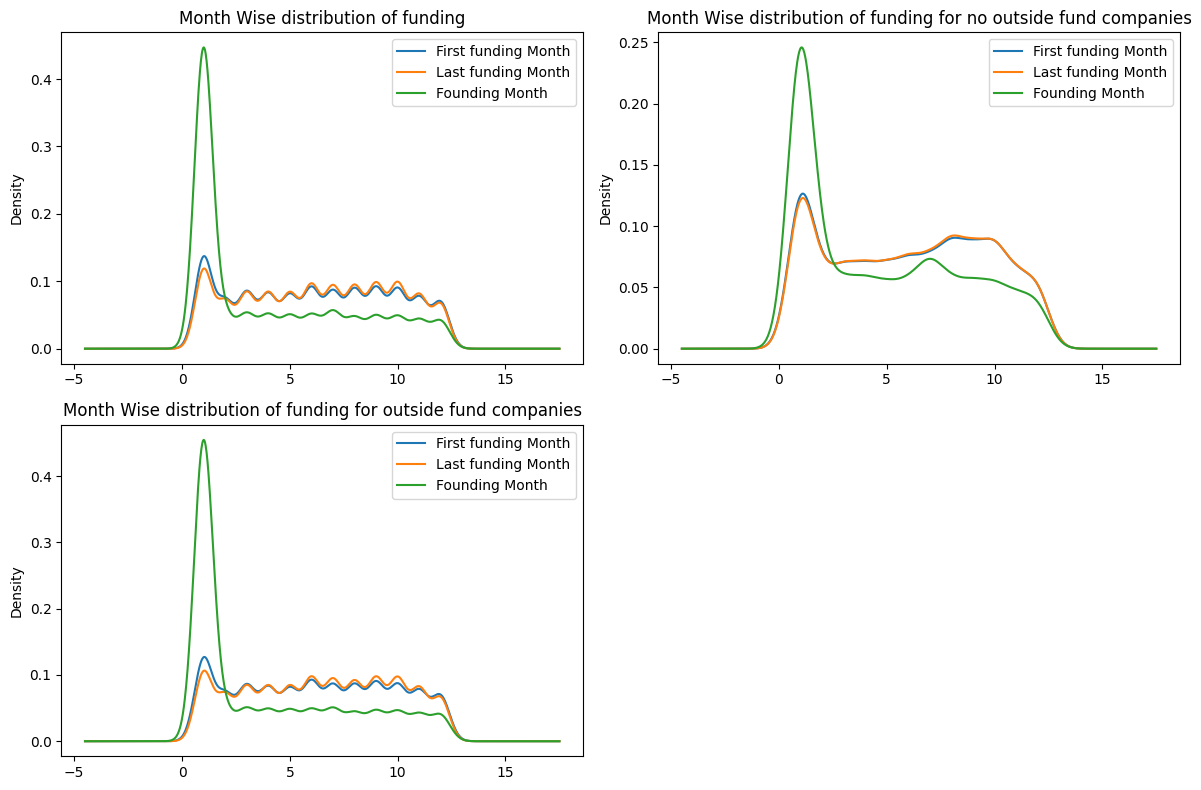

In [294]:
# @title MONTH
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Month Wise distribution of funding')
df['first_funding_at'].dt.month.plot(kind='kde',label='First funding Month')
df['last_funding_at'].dt.month.plot(kind='kde',label='Last funding Month')
df['founded_month'].plot(kind='kde',label='Founding Month')
plt.legend()

plt.subplot(2,2,2)
plt.title('Month Wise distribution of funding for no outside fund companies')
df_no_fund['first_funding_at'].dt.month.plot(kind='kde',label='First funding Month')
df_no_fund['last_funding_at'].dt.month.plot(kind='kde',label='Last funding Month')
df_no_fund['founded_month'].plot(kind='kde',label='Founding Month')
plt.legend()

plt.subplot(2,2,3)
plt.title('Month Wise distribution of funding for outside fund companies')
df_fund['first_funding_at'].dt.month.plot(kind='kde',label='First funding Month')
df_fund['last_funding_at'].dt.month.plot(kind='kde',label='Last funding Month')
df_fund['founded_month'].plot(kind='kde',label='Founding Month')
plt.legend()

plt.tight_layout()
plt.show()

**Analysis of Startup Counts by Month**

1. **First Funding Month:**
   - **January (1)** has the highest count of startups (6719), indicating a strong preference for initiating funding at the start of the year.
   - **Subsequent months** show a gradual decrease in the number of startups receiving their first funding, with **June (6)**, **September (9)**, and **October (10)** also seeing significant counts (around 4000+ each).
   - **Lower counts** are observed in **February (2)** and **December (12)**, suggesting that startups may be less likely to seek funding during these months.

2. **Last Funding Month:**
   - Similar to first funding, **January (1)** tops the list with **5688** startups, implying that many startups secure their last funding round early in the year.
   - **October (10)** and **September (9)** are again notable, indicating a trend for startups to wrap up their funding rounds in the latter part of the fiscal year.
   - The **last funding counts** follow a similar pattern to the first funding, suggesting that the overall funding cycles may be consistent across months.

3. **Founding Month:**
   - **January (1)** dominates with **23404** startups founded, revealing that many startups tend to commence operations at the beginning of the year, possibly to align with new budgets and planning cycles.
   - The counts for **July (7)** and **March (3)** are relatively high (2725 and 2544 respectively), indicating a continued interest in starting new ventures mid-year.
   - A steady decline is noted in the later months, with **December (12)** showing the least number of founded startups (2101).

**Comparison Between Funding and No Funding Startups**
1. **First Funding:**
   - For **funded startups**, **January (1)** has the highest count (5282), while **non-funded startups** also show January as leading (1437). The gap indicates that a significant number of startups successfully secure funding in January.
   - The **first funding counts** for funded startups are significantly higher than those for non-funded startups across all months.

2. **Last Funding:**
   - **January (1)** again leads for funded startups (4302) compared to non-funded (1386), showing a stark difference in the likelihood of obtaining funding for startups founded in this month.
   - **Similar patterns** can be observed in **October (10)** and **September (9)**, where funded startups again outnumber those without funding.

3. **Founding Month:**
   - The counts for **funded startups** are highest in **January (1)** (20380) compared to **non-funded startups** (3024). This suggests that a majority of startups launching in January tend to secure funding.
   - The gap between the two categories remains substantial, reinforcing the notion that the initial foundation of a startup has a significant impact on its funding success.

**Key Insights**
- **January** emerges as a pivotal month for both founding and funding activities, highlighting a trend where startups favor starting and securing funding early in the year.
- There is a consistent pattern where **funded startups** significantly outnumber **non-funded startups**, indicating that successful funding can be influenced by the month in which a startup is founded.
- The data suggests potential **seasonal trends** in startup funding cycles, which could inform investors and founders about the best times to initiate funding discussions or launch new ventures.

This analysis highlights the importance of timing in the startup lifecycle, emphasizing that strategic planning around these key months could enhance funding success.

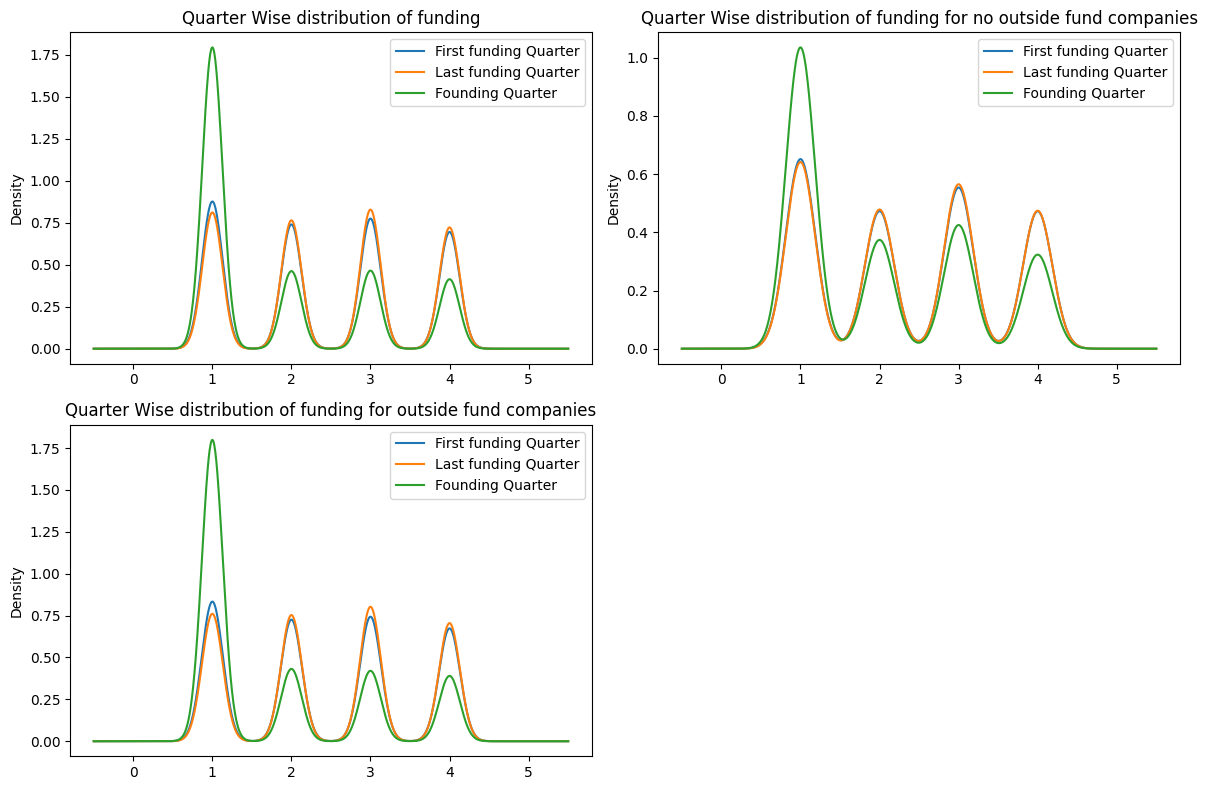

In [295]:
# @title QUARTER

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Quarter Wise distribution of funding')
df['first_funding_at'].dt.quarter.plot(kind='kde',label='First funding Quarter')
df['last_funding_at'].dt.quarter.plot(kind='kde',label ='Last funding Quarter')
df['founded_quarter'].plot(kind='kde', label='Founding Quarter')
plt.legend()

plt.subplot(2,2,2)
plt.title('Quarter Wise distribution of funding for no outside fund companies')
df_no_fund['first_funding_at'].dt.quarter.plot(kind='kde',label='First funding Quarter')
df_no_fund['last_funding_at'].dt.quarter.plot(kind='kde',label ='Last funding Quarter')
df_no_fund['founded_quarter'].plot(kind='kde', label='Founding Quarter')
plt.legend()

plt.subplot(2,2,3)
plt.title('Quarter Wise distribution of funding for outside fund companies')
df_fund['first_funding_at'].dt.quarter.plot(kind='kde',label='First funding Quarter')
df_fund['last_funding_at'].dt.quarter.plot(kind='kde',label ='Last funding Quarter')
df_fund['founded_quarter'].plot(kind='kde', label='Founding Quarter')
plt.legend()

plt.tight_layout()
plt.show()

**Analysis of Startup Counts by Quarter**

**All funding startups**

1. **First Funding by Quarter:**
   - **Q1**: **14,038** startups received their first funding, significantly higher than other quarters, indicating strong early-year activity.
   - **Q2**: **11,851** startups sought funding, showing a decrease from Q1 but still a robust number.
   - **Q3**: **12,411** startups received funding, indicating a recovery in activity after the second quarter.
   - **Q4**: **11,130** startups sought funding, maintaining a consistent level but lower than Q1 and Q3.

2. **Last Funding by Quarter:**
   - **Q1**: **12,828** startups finalized funding, showcasing a high level of financial activity.
   - **Q2**: **12,087** startups received their last funding, indicating sustained interest in the market.
   - **Q3**: **13,097** startups experienced final funding, the highest of any quarter, suggesting it may be a peak period for closure of funding rounds.
   - **Q4**: **11,418** startups received funding, reflecting a gradual decline in activity as the year ends.

3. **Founded Quarter:**
   - **Q1**: **28,291** startups were founded, significantly outpacing other quarters and showing a strong trend towards early-year establishment.
   - **Q2**: **7,283** startups were founded, which is a substantial decrease from Q1.
   - **Q3**: **7,333** startups were established, showing a slight recovery compared to Q2 but still far lower than Q1.
   - **Q4**: **6,523** startups were founded, marking the lowest number, indicating a seasonal trend in startup formation.

**Funded Startups by Quarter**

1. **First Funding by Quarter:**
   - **Q1**: **11,456** funded startups, maintaining a strong lead.
   - **Q2**: **9,977** startups received funding, showing a decline compared to Q1 but still solid.
   - **Q3**: **10,216** startups received their first funding, indicating a positive trend.
   - **Q4**: **9,258** startups received funding, confirming a consistent pattern of early-year activity.

2. **Last Funding by Quarter:**
   - **Q1**: **10,296** startups finalized their funding, showing high activity.
   - **Q2**: **10,199** startups received last funding, reflecting a steady interest.
   - **Q3**: **10,866** startups experienced last funding, the highest count, suggesting it may be a peak for securing final investments.
   - **Q4**: **9,546** startups received funding, showing a decline but still representing significant activity.

3. **Founded Quarter:**
   - **Q1**: **24,201** startups were founded, reinforcing the trend of early-year establishment.
   - **Q2**: **5,806** startups were established, reflecting a steep drop from Q1.
   - **Q3**: **5,654** startups were founded, indicating slight improvement compared to Q2.
   - **Q4**: **5,246** startups were founded, showing a continued decline.

**Non-Funded Startups by Quarter**

1. **First Funding by Quarter:**
   - **Q1**: **2,582** non-funded startups sought funding, which is significantly lower than their funded counterparts.
   - **Q2**: **1,874** startups received funding, indicating a further decline.
   - **Q3**: **2,195** startups attempted to secure funding, showing slight recovery.
   - **Q4**: **1,872** startups sought funding, confirming lower activity in this segment.

2. **Last Funding by Quarter:**
   - **Q1**: **2,532** non-funded startups were active, reflecting early-year attempts.
   - **Q2**: **1,888** startups secured their last funding, indicating decreasing activity.
   - **Q3**: **2,231** startups experienced last funding, showing recovery.
   - **Q4**: **1,872** startups continued to seek funding, confirming a downward trend.

3. **Founded Quarter:**
   - **Q1**: **4,090** non-funded startups were established, reflecting the trend of late-stage formation.
   - **Q2**: **1,477** startups were founded, marking a decline.
   - **Q3**: **1,679** startups were established, indicating a slight recovery.
   - **Q4**: **1,277** startups were founded, marking the lowest establishment count.

**Key Insights**

- **Q1** consistently shows the highest counts across all startup metrics, indicating a strong trend for funding and founding in the early part of the year.
- **Funding Activity**: The peak for funding occurs in **Q3**, particularly for final funding rounds, suggesting that many startups are actively closing deals and securing funds by mid-year.
- **Startup Formation**: A significant number of startups are established in **Q1**, while the counts sharply decline in subsequent quarters, particularly in Q4, suggesting that many entrepreneurs prefer to start their ventures at the beginning of the year.
- **Non-Funded Startups**: This segment consistently shows lower counts across all metrics, highlighting the challenges of securing funding and the importance of strategies to increase funding success rates.

This analysis reveals critical timing trends for startup funding and formation, providing insights for entrepreneurs and investors to optimize their strategies for better success in the startup ecosystem.

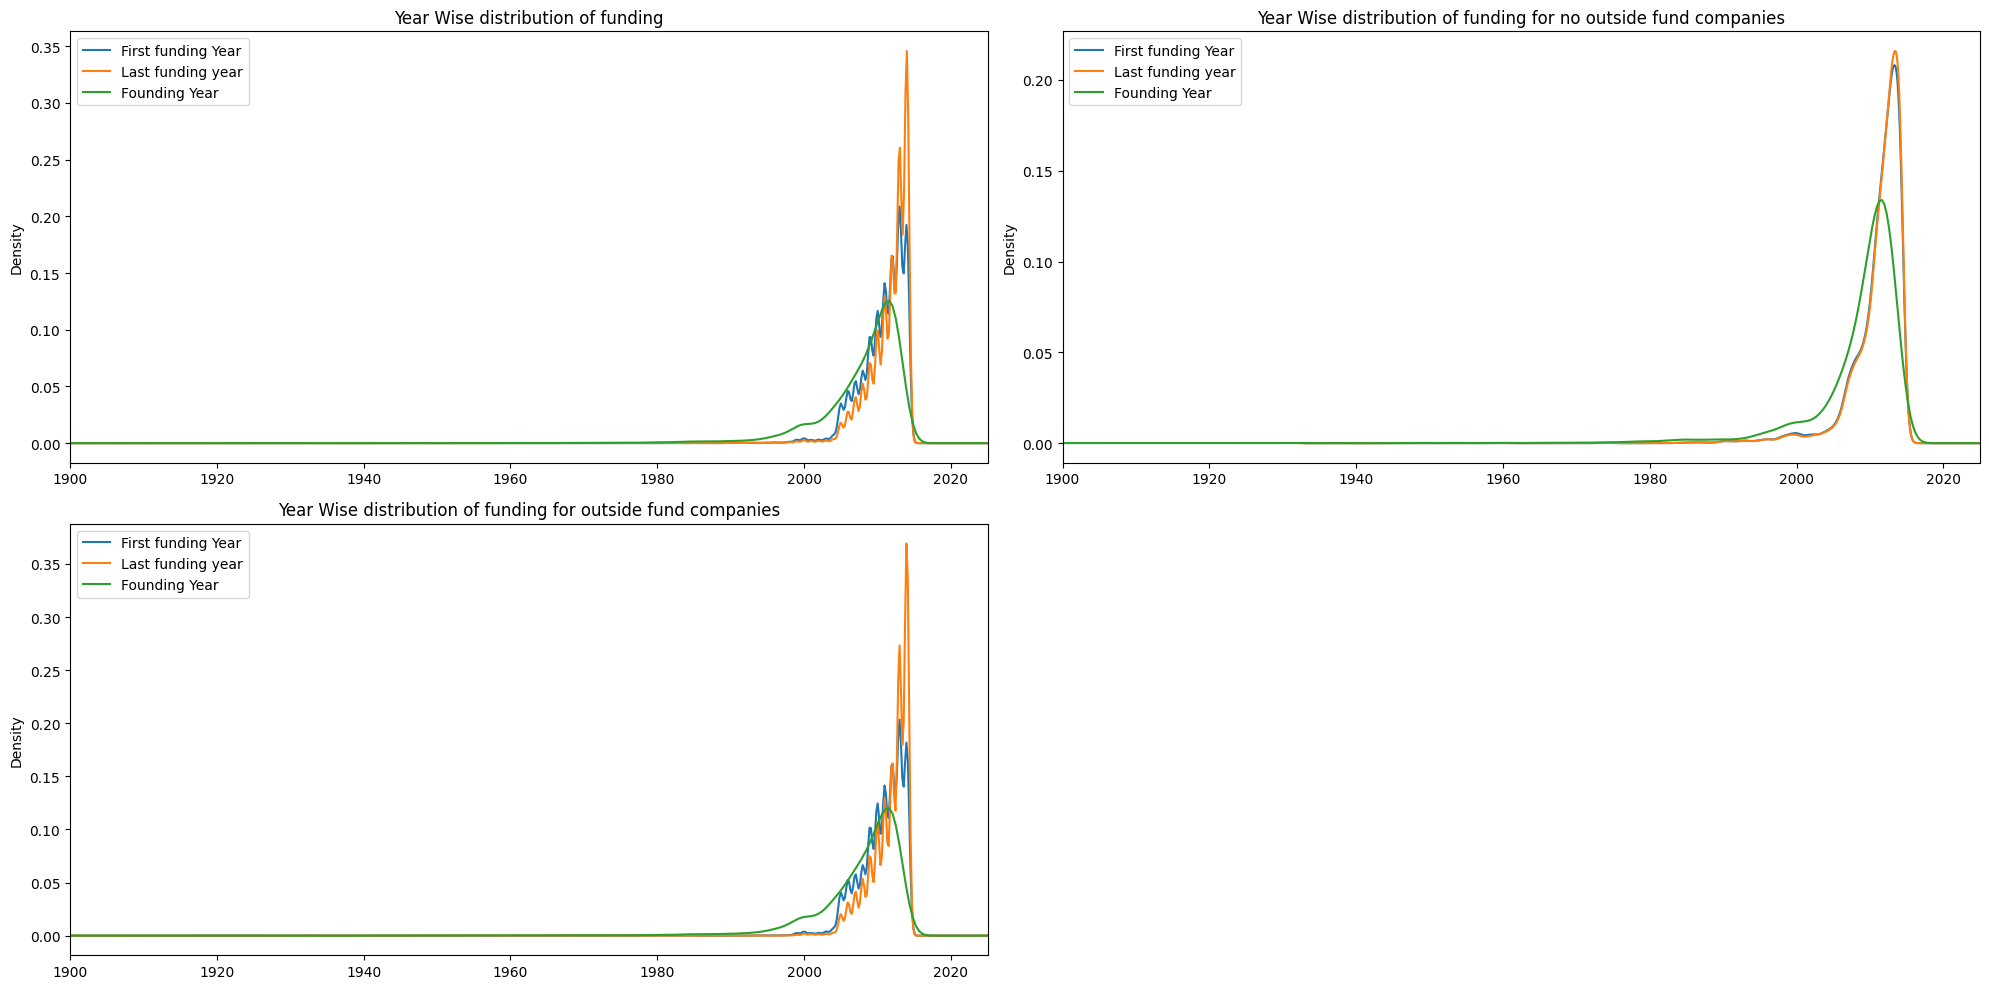

In [299]:
# @title YEAR
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Year Wise distribution of funding')
df['first_funding_at'].dt.year.plot(kind='kde',label='First funding Year')
df['last_funding_at'].dt.year.plot(kind='kde',label ='Last funding year')
df['founded_year'].plot(kind='kde', label='Founding Year')
plt.xlim(1900,2025)
plt.legend()

plt.subplot(2,2,2)
plt.title('Year Wise distribution of funding for no outside fund companies')
df_no_fund['first_funding_at'].dt.year.plot(kind='kde',label='First funding Year')
df_no_fund['last_funding_at'].dt.year.plot(kind='kde',label ='Last funding year')
df_no_fund['founded_year'].plot(kind='kde', label='Founding Year')
plt.xlim(1900,2025)
plt.legend()

plt.subplot(2,2,3)
plt.title('Year Wise distribution of funding for outside fund companies')
df_fund['first_funding_at'].dt.year.plot(kind='kde',label='First funding Year')
df_fund['last_funding_at'].dt.year.plot(kind='kde',label ='Last funding year')
df_fund['founded_year'].plot(kind='kde', label='Founding Year')
plt.xlim(1900,2025)
plt.legend()

plt.tight_layout()
plt.show()

Here's an analysis of the startup funding **YEARLY** data comparing startups with and without funding.

**Key Observations**

1. **Funding Patterns Over Time**:
   - **Funded Startups**: The peak years for first funding are **2013 and 2014**. Startups founded around these years appear to have attracted the most funding. These years also see high values for last funding, suggesting an intense funding cycle, with significant follow-up investment occurring soon after initial funding.
   - **Non-funded Startups**: For startups without follow-up funding, **2013 and 2014** also show the highest counts. This indicates that many startups were founded in these peak years.

2. **Trend Shifts**:
   - Prior to the 2000s, startup funding activity was low, with only scattered instances. The early 2000s show some increase in activity, but the most substantial surge begins post-2008, (after `GREAT RECESSION`) aligning with the rise of new tech and the digital startup ecosystem.
   - The **2011 to 2014** period marks the peak of startup funding, aligning with the post-2008 recovery period and the emergence of multiple venture capital funds.

3. **Lifecycle of Startups Based on Funding**:
   - **Funded Startups**: These generally have a shorter lifecycle between their first and last funding rounds, especially in peak years (2012-2014). Funded startups are likely part of sectors that attracted repeated investments quickly or had accelerated growth rates.
   - **Non-funded Startups**: Many show only one recorded funding round, often within the same year as their founding, indicating that they either didn’t gain sufficient traction or faced challenges securing follow-up funding. Non-funded startups tend to taper off in follow-up rounds compared to their funded counterparts.

4. **Funding Surge for Tech-Driven Sectors**:
   - The rise in both funded and non-funded startups during **2008-2014** likely correlates with the tech boom. This period encouraged high-risk, high-reward ventures, particularly in software, internet, and mobile tech, fostering increased competition and higher funding counts.

## *Descriptive Analysis of Numeric Columns*

As amount will be available for funding startups only, just looking at funding and non funding startups data summary

In [302]:
df_no_fund.describe(include='number')

funding_total_usd  funding_rounds  founded_month  founded_quarter  \
count             8523.0     8523.000000    8523.000000      8523.000000   
mean                 0.0        1.086589       4.715945         2.016778   
std                  0.0        0.348008       3.697385         1.129629   
min                  0.0        1.000000       1.000000         1.000000   
25%                  0.0        1.000000       1.000000         1.000000   
50%                  0.0        1.000000       4.000000         2.000000   
75%                  0.0        1.000000       8.000000         3.000000   
max                  0.0        6.000000      12.000000         4.000000   

       founded_year  
count   8523.000000  
mean    2008.304470  
std        7.801718  
min     1850.000000  
25%     2007.000000  
50%     2010.000000  
75%     2012.000000  
max     2014.000000

In [303]:
df_fund.describe(include='number')

funding_total_usd  funding_rounds  founded_month  founded_quarter  \
count       40907.000000    40907.000000   40907.000000     40907.000000   
mean           15.912526        1.823282       3.953895         1.803090   
std           168.678800        1.380355       3.680304         1.097292   
min             0.000001        1.000000       1.000000         1.000000   
25%             0.350000        1.000000       1.000000         1.000000   
50%             2.000000        1.000000       2.000000         1.000000   
75%            10.000000        2.000000       7.000000         3.000000   
max         30079.503000       18.000000      12.000000         4.000000   

       founded_year          seed       venture  equity_crowdfunding  \
count  40907.000000  40907.000000  40907.000000         40907.000000   
mean    2007.419170      0.262643      9.065366             0.007449   
std        8.904047      1.156854     31.072113             0.219742   
min     1785.000000      0.000000      0.000000             0.000000   
25%     2006.000000      0.000000      0.000000             0.000000   
50%     2009.000000      0.000000      0.595000             0.000000   
75%     2012.000000      0.073350      7.000000             0.000000   
max     2014.000000    130.000000   2351.000000            25.000000   

        undisclosed  convertible_note  ...  secondary_market  \
count  40907.000000      40907.000000  ...      40907.000000   
mean       0.157378          0.028237  ...          0.046476   
std        3.276928          1.574263  ...          4.248317   
min        0.000000          0.000000  ...          0.000000   
25%        0.000000          0.000000  ...          0.000000   
50%        0.000000          0.000000  ...          0.000000   
75%        0.000000          0.000000  ...          0.000000   
max      292.432833        300.000000  ...        680.611554   

       product_crowdfunding       round_A       round_B       round_C  \
count          40907.000000  40907.000000  40907.000000  40907.000000   
mean               0.008550      1.503377      1.804228      1.456728   
std                0.470743      6.049377      8.180792      8.766825   
min                0.000000      0.000000      0.000000      0.000000   
25%                0.000000      0.000000      0.000000      0.000000   
50%                0.000000      0.000000      0.000000      0.000000   
75%                0.000000      0.000000      0.000000      0.000000   
max               72.000000    319.000000    542.000000    490.000000   

            round_D       round_E       round_F       round_G       round_H  
count  40907.000000  40907.000000  40907.000000  40907.000000  40907.000000  
mean       0.891334      0.413889      0.205174      0.069698      0.017200  
std       10.783920      5.941557      6.901034      5.774011      2.986754  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000      0.000000  
max     1200.000000    400.000000   1060.000000   1000.000000    600.000000  

[8 rows x 26 columns]

**1. Funded Startups**
 The mean funding total is \$15.9M , but there’s a large variation (standard deviation of \$168.7M). The median ($2M) is much lower than the mean, showing that while a few startups received very high funding, most received significantly less. This suggests a skewed distribution where large amounts are concentrated in select startups.<br>
**2. Funding Rounds**<br>
Non-Funded Startups: Almost all non-funded startups have only 1 funding round, suggesting they either rely on bootstrapping or didn't pursue additional rounds.
<br>Funded Startups: These startups have a mean of 1.82 rounds, with some reaching up to 18 rounds. This trend could mean that funded startups tend to raise capital in multiple rounds, especially as they grow and expand.<br>
**3. Founding Year**<br>
Non-Funded Startups: The median founding year is 2010, with most founded between 2007 and 2012, indicating growth of startups not actively seeking external funding during this period.<br>
Funded Startups: These startups have a slightly earlier median founding year of 2009, with a wide spread (standard deviation of 8.9 years). Some funded startups date back as early as 1785, likely older companies expanding or adapting with new funding rounds in recent years.<br>
**4. Distribution of Rounds (Seed, Venture, Round A to Round H)**<br>
Seed and Venture Rounds: Funded startups have a mean of 0.26 for seed rounds and 9.06 for venture rounds. This significant presence of venture rounds indicates a heavy reliance on VC funding after initial seed funding, especially for scaling.<br>
Series Rounds (A-H): The average number of rounds A to H generally declines with each successive round, reflecting fewer startups reaching later funding stages. For instance, while Round A shows a mean of 1.5, it drops significantly by Round H, indicating most startups don’t progress to the later stages.<br>
**5. Notable Funding Methods and Product Crowdfunding**<br>
Equity Crowdfunding: The mean for equity crowdfunding is quite low (0.007), showing it’s a rare funding method compared to traditional rounds.<br>
Product Crowdfunding: With a mean of 0.0085, product crowdfunding is also relatively rare, though it has potential for consumer-focused startups with early product prototypes.<br>

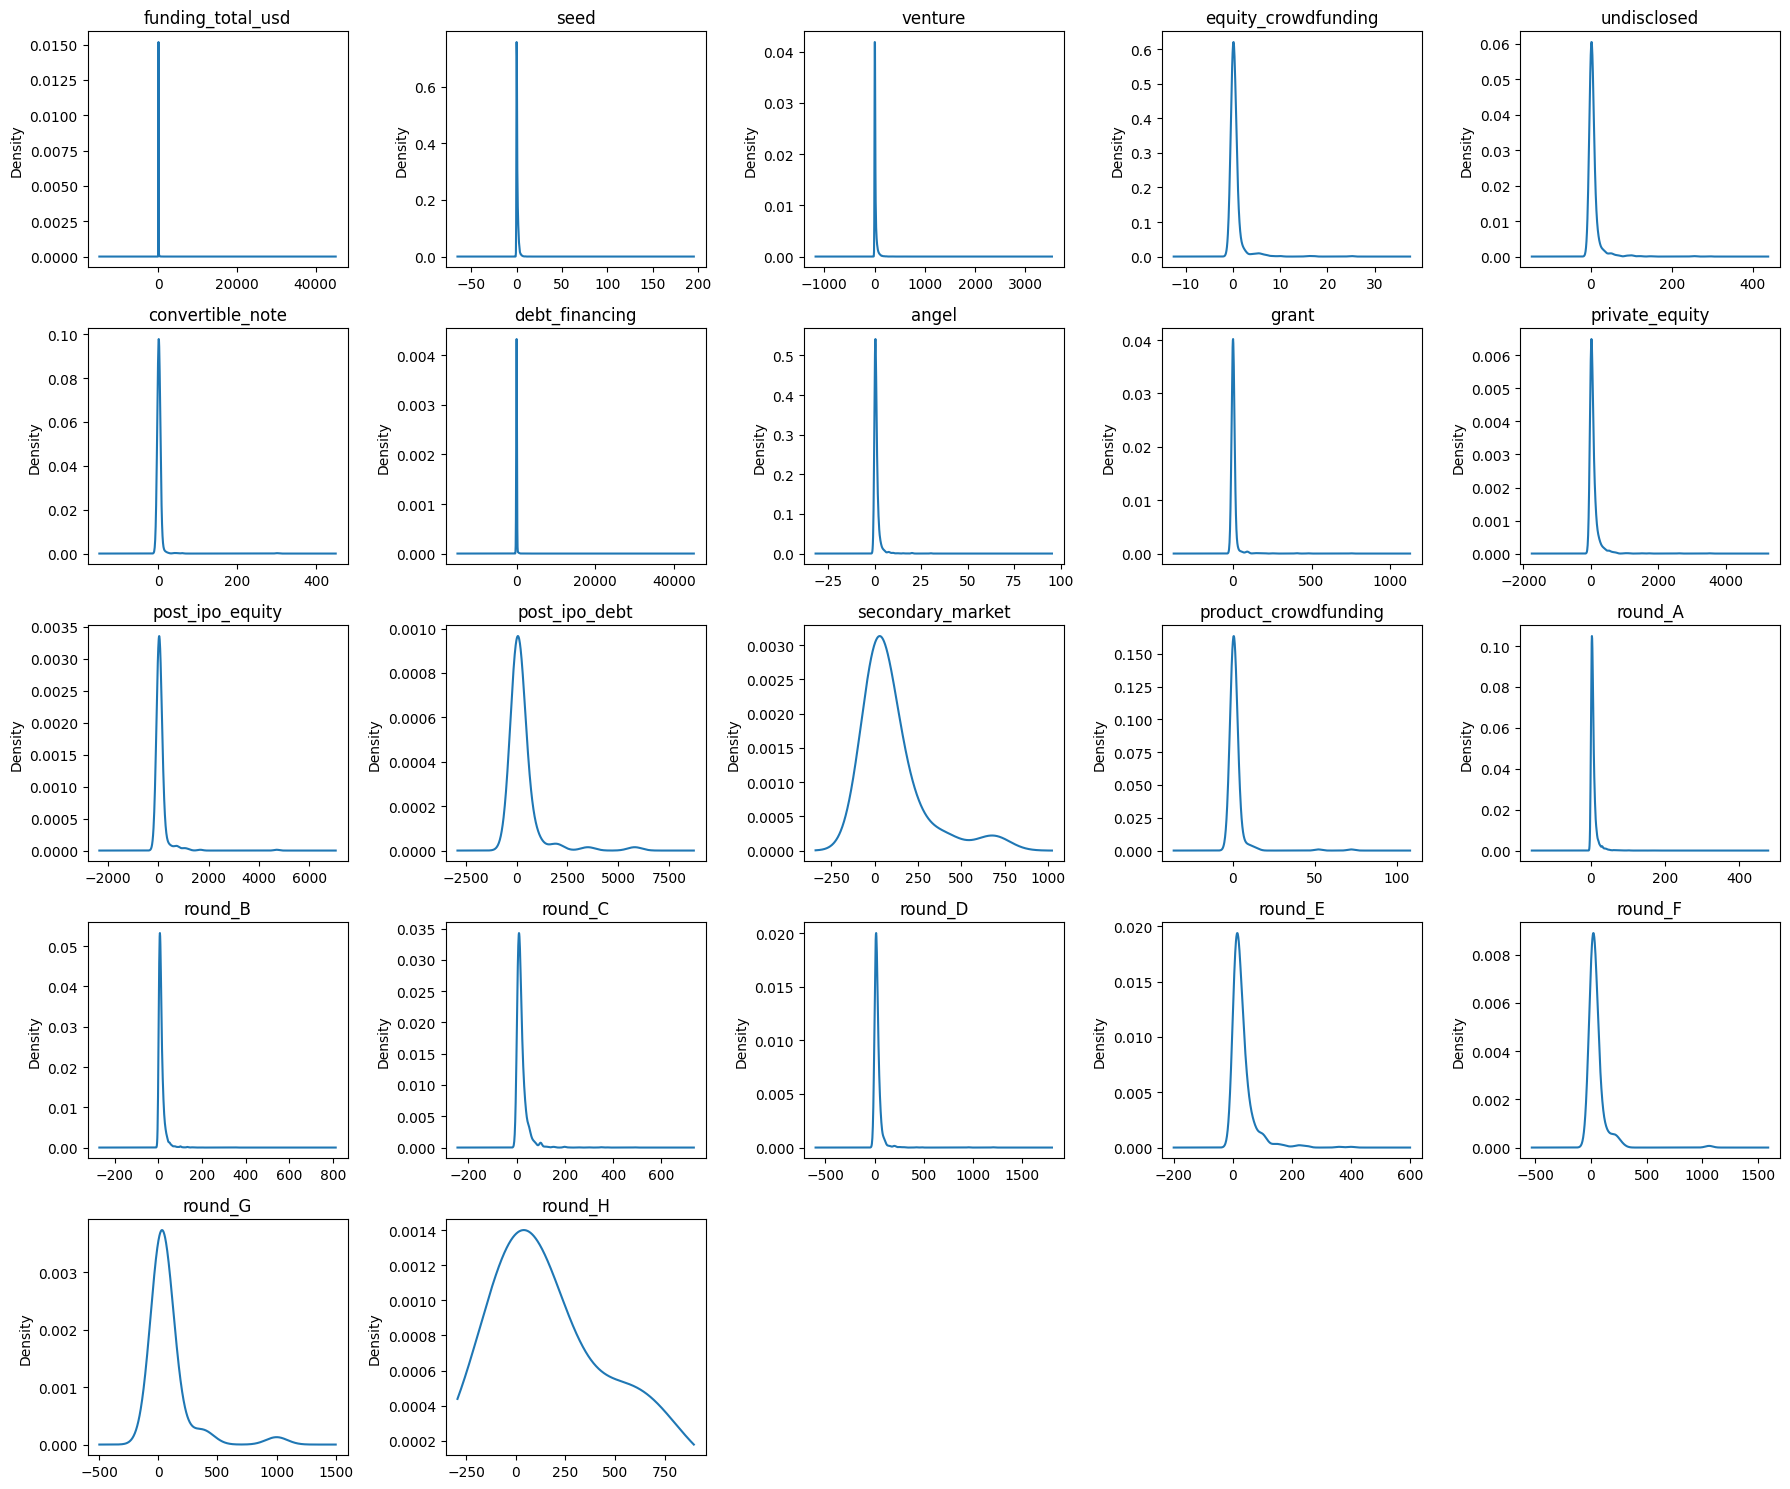

In [305]:
plt.rcParams["figure.figsize"] = [18,15]
for i in fund_col:
  plt.subplot(5,5,fund_col.index(i)+1)
  plt.title(i)
  df[df[i]!=0][i].plot(kind='kde')
  plt.tight_layout()
plt.show()

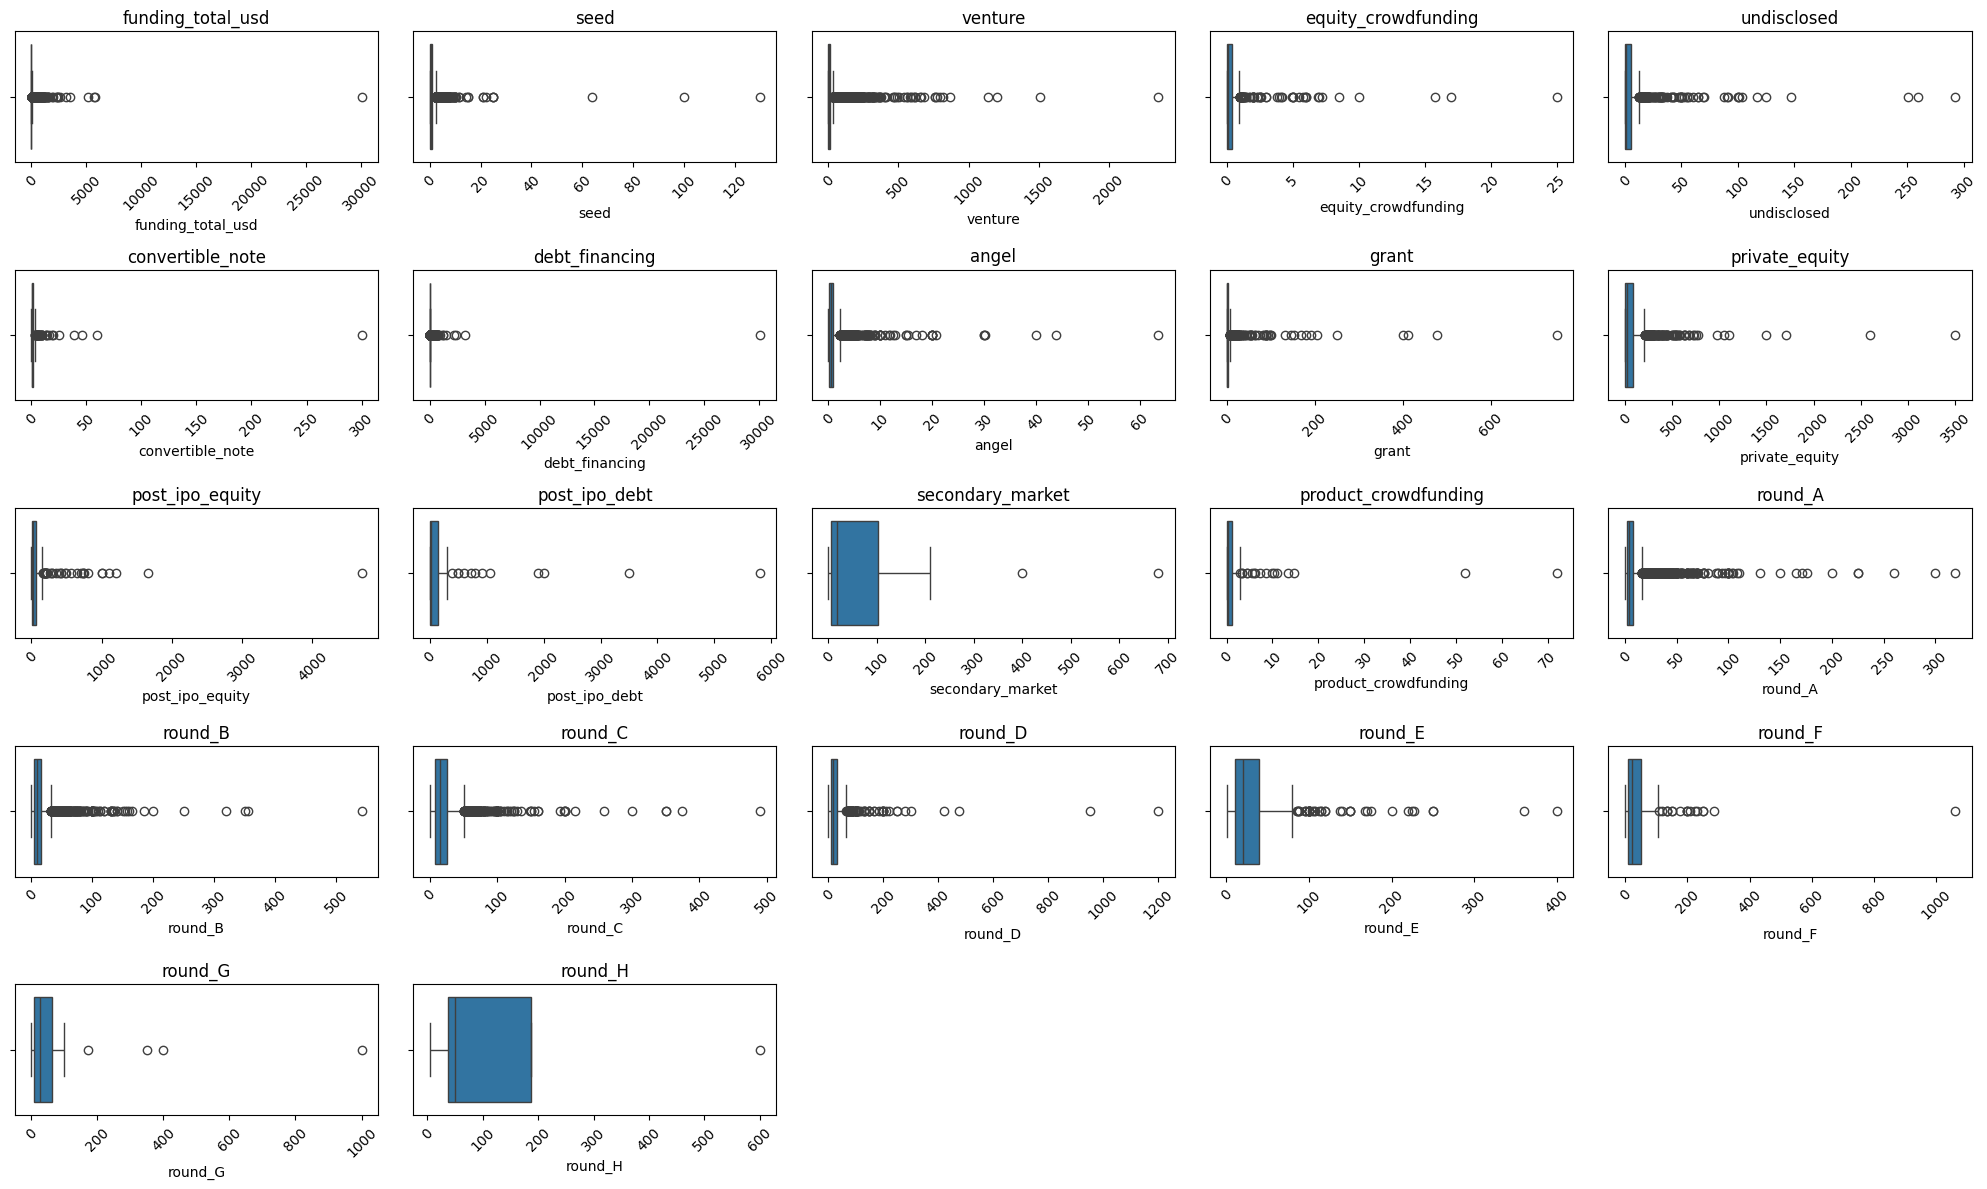

In [306]:
plt.rcParams["figure.figsize"] = [20, 12]
for i in fund_col:
    plt.subplot(5, 5, fund_col.index(i) + 1)
    plt.title(i)

    # Plot box plot with horizontal orientation using matplotlib
    sns.boxplot(df[df[i] != 0][i], orient='h')  # vert=False makes it horizontal
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Funding Distribution is Highly Skewed: A small number of startups receive very large amounts, while most remain on lower funding levels. For new startups, finding niche markets or developing innovative products may help attract VC attention in initial rounds.

Importance of Early Seed and Venture Rounds: Most startups rely on seed and venture rounds. Prioritizing strong pitch decks and business models for early-stage funding can facilitate access to larger rounds in the future.

Preparation for Multiple Rounds: For growth-focused startups, planning for multiple rounds of funding (up to Series A or B) appears common, with fewer reaching later rounds. This suggests that to succeed long-term, companies should be prepared for sustained growth and revenue generation early on.

Crowdfunding and Alternative Funding: While relatively rare, crowdfunding can serve as an alternative for startups in unique consumer niches or for early-stage capital where traditional funding may be less accessible.

This analysis highlights that while a few large outliers receive substantial funding, strategic planning across funding rounds is essential for most startups to sustain and grow, especially when navigating from seed to series rounds.








In [308]:
num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(exclude='number').columns

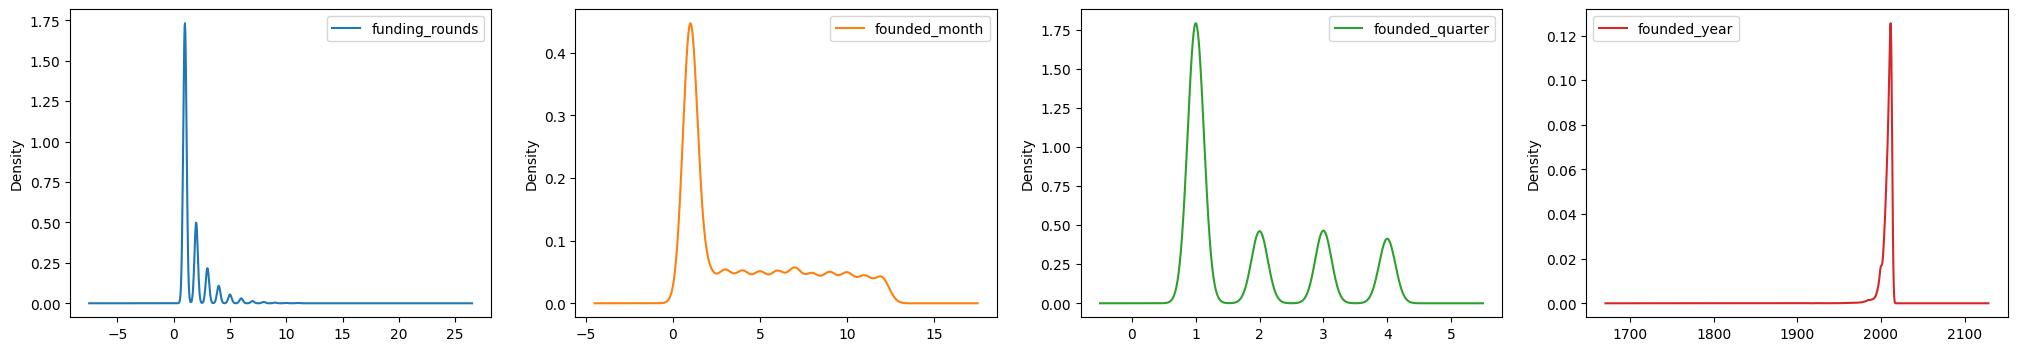

In [309]:
plt.rcParams["figure.figsize"] = [25, 4]
df[num_col.drop(fund_col)].plot(kind='kde',layout=(1,4),subplots=True,sharex=False)
plt.show()

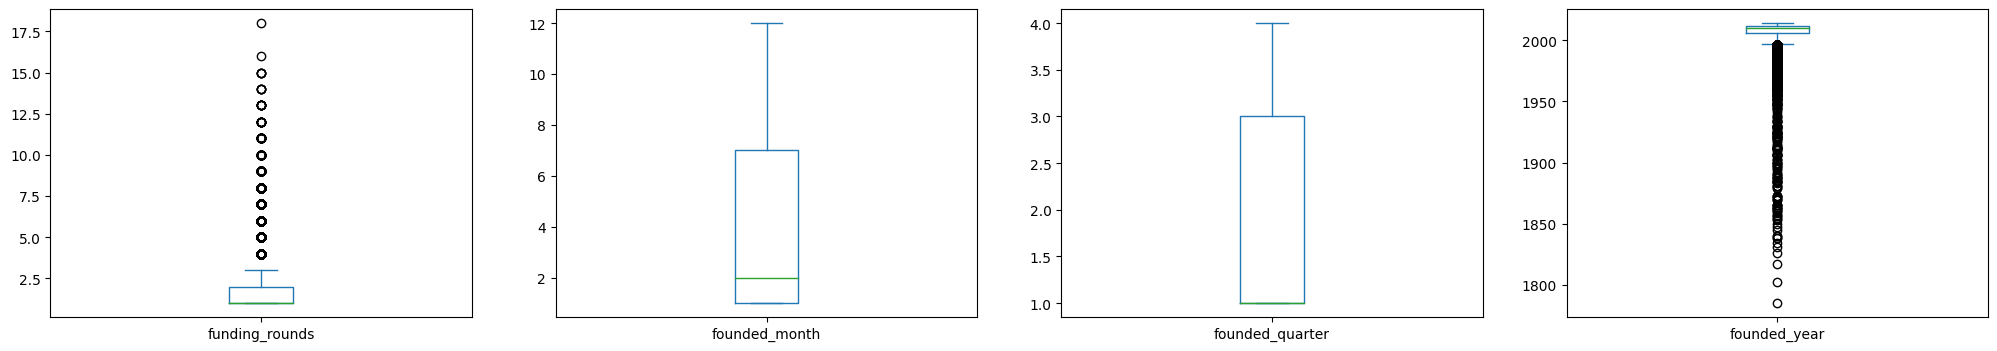

In [ ]:
plt.rcParams["figure.figsize"] = [25, 4]
df[num_col.drop(fund_col)].plot(kind='box',layout=(1,4),subplots=True,sharex=False)
plt.show()


Here’s an analysis of the funding rounds distribution for startups:

**1. Skewed Distribution Toward Early Rounds**
First Funding Round Dominance: The first funding round has an overwhelmingly high count, with 32,033 startups only going through one round. This shows that a significant number of startups either raise just enough capital in the initial round to sustain operations or do not pursue further rounds due to various factors, like achieving self-sufficiency or facing challenges in subsequent funding.

Gradual Decline in Successive Rounds: There’s a steep drop-off after the first round, with only 9,218 reaching a second round and this trend continues with each successive round. By the fourth round, the count is down to 1,997, and it continues to decrease rapidly. This suggests that most startups either struggle to secure additional funding or meet milestones that would justify further investment.

**2. Late-Stage Rounds are Rare**
Rare Beyond Series B: Rounds beyond the fifth (Series C and beyond) become less common. Only 560 startups reach a sixth round, and fewer than 100 startups reach nine or more rounds. This implies that late-stage rounds are reserved for startups with proven scalability and substantial market traction.

Exceptional Cases for High Rounds: Rounds beyond the twelfth (such as 13th to 18th rounds) are extremely rare, with only a few startups reaching these stages. These cases are likely exceptional companies that continuously evolve, expand into new markets, or adopt innovative models that require significant capital injections.

**3. Investment Dynamics and Implications**
Investment Phases and Filters: The significant drop-off after early rounds suggests that investors are highly selective, and each funding round acts as a filter where only startups that achieve growth milestones and market traction continue receiving funding.
Self-Sustainability and Acquisitions: Some startups may reach self-sufficiency after the first few rounds, while others might be acquired, which could explain why they don’t appear in higher rounds.
Challenges of Scaling: Later rounds often involve scaling challenges that require higher amounts of capital and revenue generation. Only a small percentage of startups successfully navigate these stages.<br>
**Key takeaways**<br>
This distribution reflects the startup funding lifecycle: most startups experience early funding challenges, with only a select few continuing into later rounds. For startups aiming for later-stage funding, demonstrating sustained growth and scalability is key. This pattern also emphasizes the importance of efficient capital use in initial rounds, as chances for further funding diminish significantly with each subsequent round.


# *Bivariate Analysis*

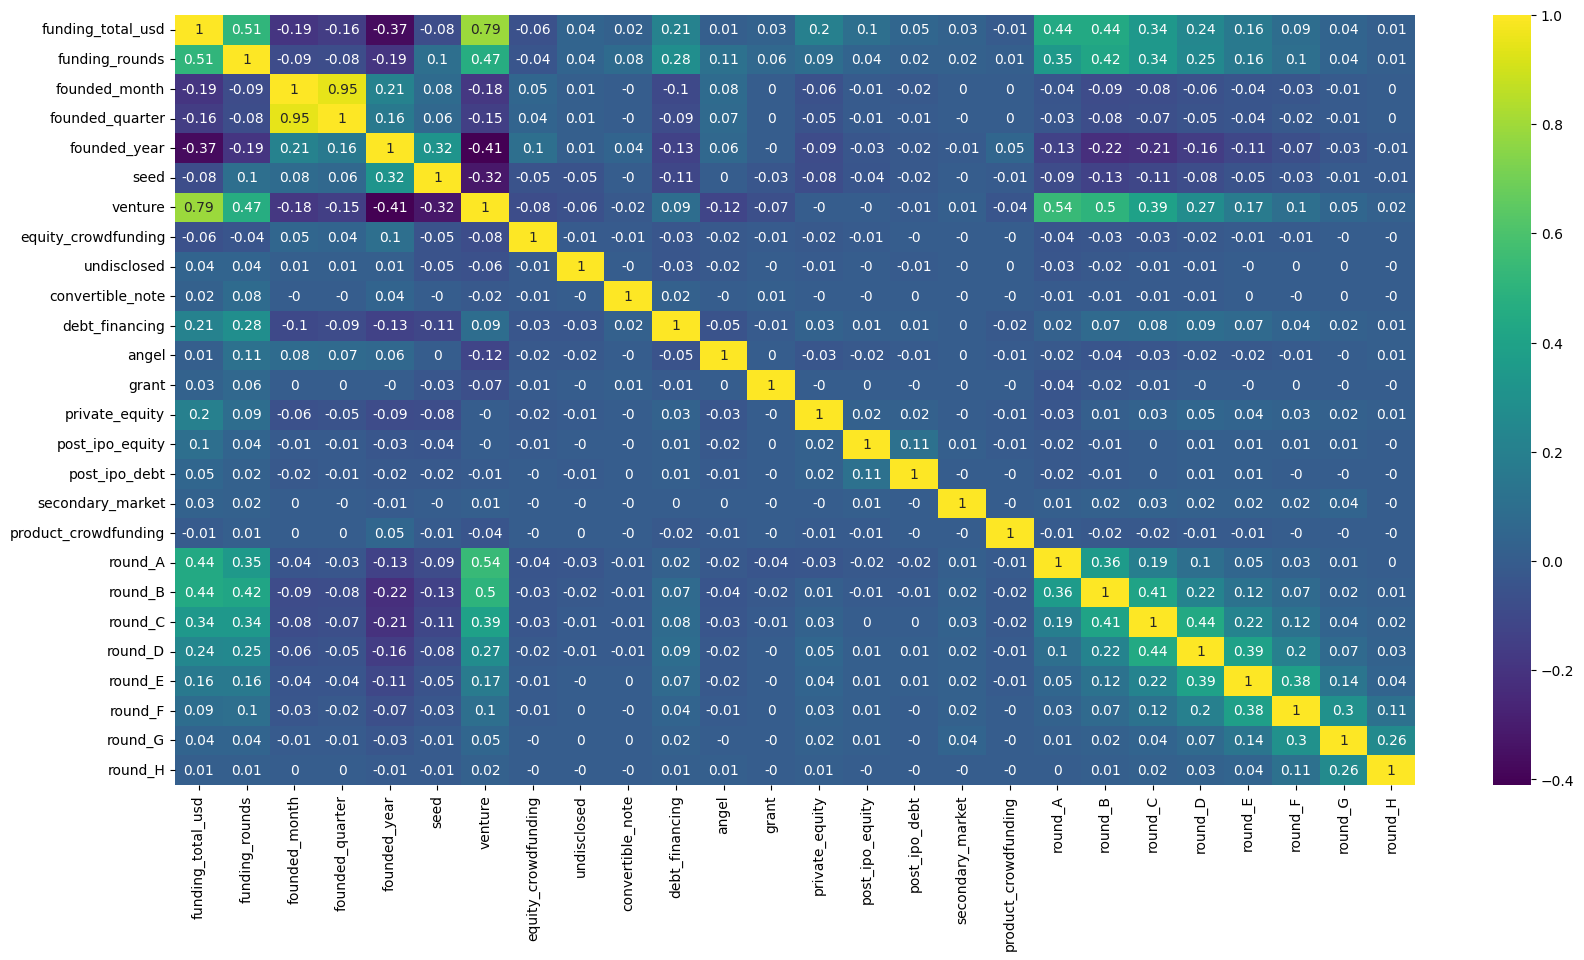

In [319]:
# @title CORRELATION
plt.figure(figsize=(20,10))
plt.title('Correlation between funding columns')
sns.heatmap(df[num_col].corr(method='spearman').round(2),annot=True,cmap='viridis')
plt.show()

Here's an analysis of the correlations for key insights:

1. **Funding Total (USD) Correlations**:
   - **High correlation with Venture Funding** (`0.789`): This suggests that a significant portion of total funding likely comes from venture funding rounds.
   - **Strong correlations with Later Rounds** (A, B, C, D, etc.): This trend (e.g., `0.44` for Round A, `0.41` for Round B) indicates that companies with higher total funding have more advanced funding rounds.

2. **Funding Rounds**:
   - **Positive correlation with Funding Total** (`0.506`): This aligns with the expected pattern where companies with more funding rounds generally accumulate higher funding amounts.
   - **Moderate correlations with Rounds A, B, and C**: There’s a positive correlation (`0.35`, `0.41`, and `0.34`, respectively) between funding rounds and the initial rounds, showing that these are common in many funding journeys.

3. **Founding Details (Year, Quarter, Month)**:
   - **Negative correlation between Founded Year and Total Funding** (`-0.37`): Older companies tend to have higher funding totals than recently founded ones, likely due to more time to accumulate funding.
   - **Correlation within Founding Time Details** (e.g., Month and Quarter have `0.94` correlation): This suggests that founding months and quarters are closely linked, as expected.

4. **Early-Stage Funding (Seed, Angel, Convertible Note)**:
   - **Seed funding and founded year have moderate correlation** (`0.318`): This could imply that many recently founded startups start with seed funding.
   - **Seed funding negatively correlates with Venture** (`-0.32`), indicating that companies moving beyond early stages depend less on seed funding as they scale to venture and later rounds.

5. **Later-Stage Rounds (D, E, F, etc.)**:
   - **High inter-correlation among rounds from C onwards** (e.g., `0.43` between Rounds D and C): Companies that secure later rounds are often well-established and are raising larger amounts.

This analysis reflects the progression of startups from early to advanced stages in their funding cycles, with more established companies generally attracting higher funding through later-stage rounds and venture capital.

In [351]:
# function to find relation between funding amount and other features
def plot_col(df,col,plot_kind,row,a,b):

  plt.figure(figsize=(a,b))

  plt.subplot(1,2,1)
  plt.title(f'{col} wise total funding')
  df.groupby(col)['funding_total_usd'].sum().sort_values(ascending=False)[:row].plot(kind=plot_kind)
  plt.ylabel('')
  plt.gca().invert_yaxis()

  plt.subplot(1,2,2)
  plt.title(f'{col} wise average funding')
  df.groupby(col)['funding_total_usd'].mean().sort_values(ascending=False)[:row].plot(kind=plot_kind)
  plt.ylabel('')
  plt.gca().invert_yaxis()

  plt.tight_layout()
  plt.show()

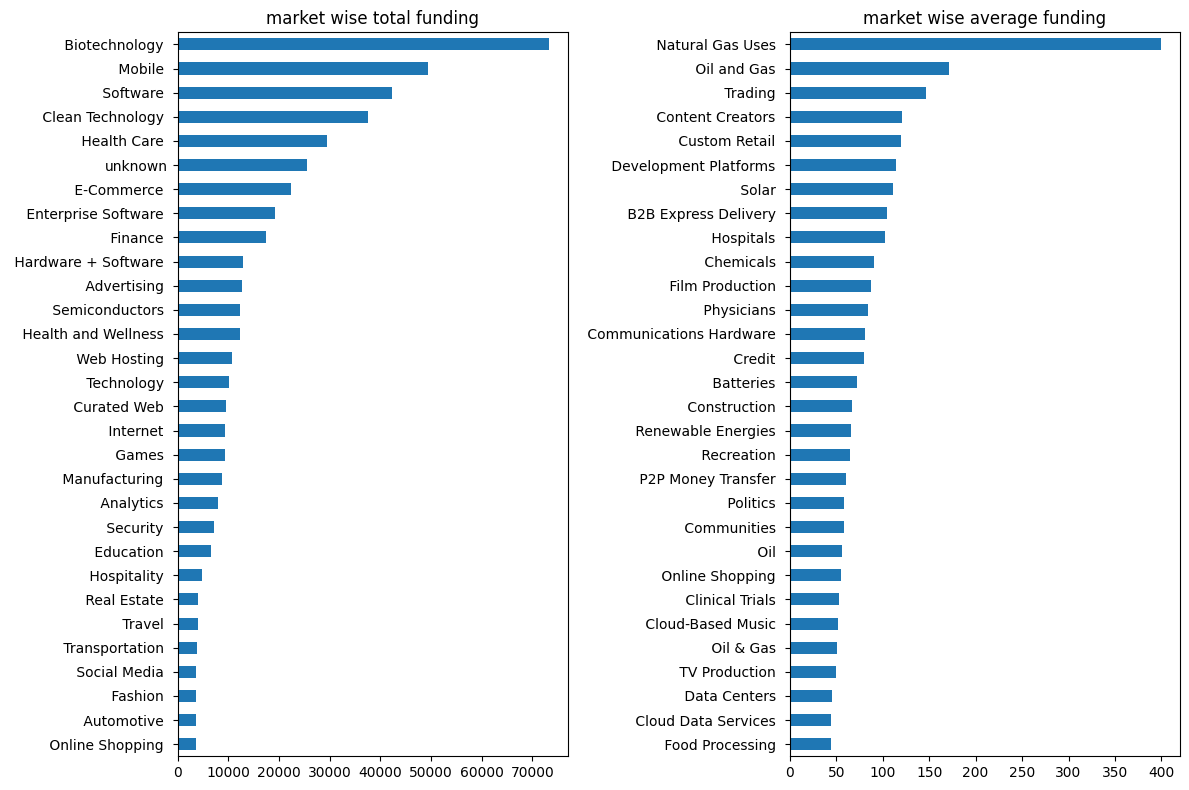

In [352]:
# @title MARKET WISE FUNDING
plot_col(df,'market','barh',30,12,8)

Here's an analysis of the market-wise funding, both in terms of average funding and total funding.

**1. High Average Funding Markets**<br>

The markets with the highest average funding per venture are primarily in industries with high capital requirements or established infrastructures, like:<br>
Natural Gas Uses - 400 M (highest average funding).
Oil and Gas - 171.29 M.
Trading - 146.74 M.
Content Creators and Custom Retail - around 120 M each.
These sectors are typically capital-intensive, requiring substantial upfront investments, likely reflecting the high average funding.

**2. Low Average Funding Markets**<br>

Several markets have 0 or near-zero average funding, such as:<br>
Social Media Agent, Green Building, Startups, and Debt Collecting (mostly 0).
These markets likely have limited venture capital interest, lower barriers to entry, or self-sustained models that reduce reliance on external funding.

**3. Markets with High Total Funding**<br>

High total funding is concentrated in markets focused on technological and life sciences innovation:<br>
Biotechnology - 73,372 M (highest total funding), indicating large volumes of funding, potentially across a variety of ventures.
Mobile and Software sectors - both above 40,000 M, are high-growth areas with a constant demand for capital to fund new technologies.
Clean Technology - 37,619 M, highlighting environmental and sustainability-focused initiatives.<br>

**4. Markets with Low or Zero Total Funding**<br>

Social Media Agent, Low Bid Auctions, Rehabilitation, Startups, and Green Building have almost no total funding.
These markets may be niche or emerging fields with minimal external funding or limited scalability in attracting investors.

**Key takeaways**<br>
High Funding markets are capital-intensive and likely have a strong reliance on venture capital. Biotechnology and Clean Technology show high total funding, underscoring interest in healthcare and sustainable tech.
Low Funding markets suggest either limited venture interest, small-scale markets, or self-sufficient business models.
Emerging markets like Pervasive Computing and Synthetic Biology with zero funding could reflect early-stage sectors not yet attracting substantial investment, possibly representing untapped potential or lack of market maturity.
This analysis reveals which markets are heavily invested in versus those with limited venture capital activity, providing insights into industry trends and potential investment opportunities.

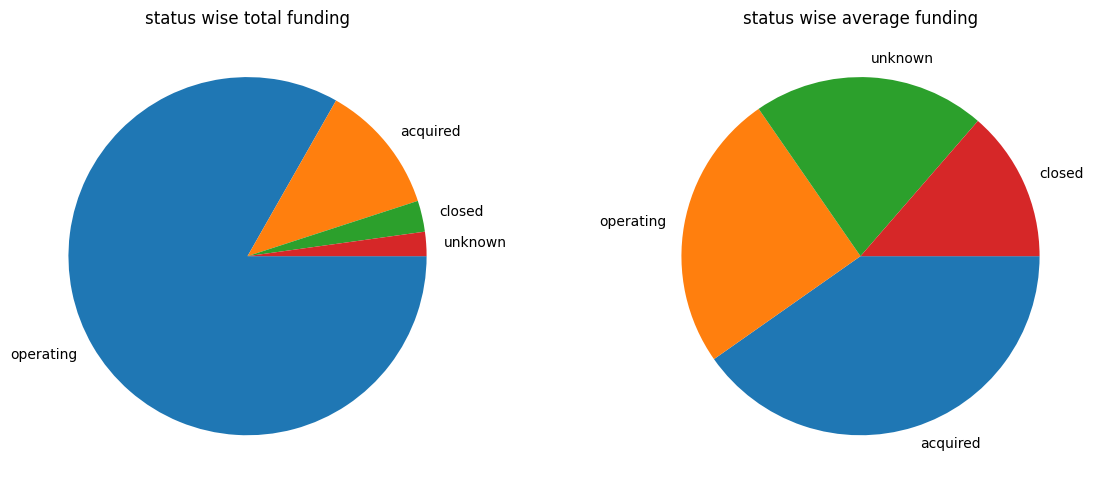

In [353]:
# @title STATUS WISE FUNDING
plot_col(df,'status','pie',4,12,5)

The analysis of funding based on the **status of companies**:

**1. High Average Funding**
- **Acquired** companies have the highest average funding at **20.76 million**.
  - This likely reflects that many acquired companies had substantial growth and market validation, making them attractive acquisition targets. The high funding may indicate these companies needed significant investment to reach a stage of interest for acquisition.

**2. Moderate to Low Average Funding**
- **Operating** companies average around **12.95 million** in funding.
  - These are active, revenue-generating businesses that may be in various growth stages. The moderate average suggests consistent but not necessarily large funding rounds, indicating a steady growth strategy or smaller investments across a larger number of companies.
- **Closed** companies show an average funding of only **7.02 million**.
  - This lower average might indicate challenges in scaling or limited market interest, contributing to their eventual closure.

**3. Total Funding by Status**
- **Operating** companies received the **highest total funding**, amounting to **541,787 million**, a clear reflection of the emphasis on sustaining and scaling existing businesses.
- **Acquired** companies, despite their high average funding, have a total funding amount of **76,630 million**—a much smaller pool likely due to the fewer number of acquisitions compared to actively operating companies.
- **Closed** companies have a total funding of **18,281 million**, showing that even some ventures that eventually closed attracted significant capital. However, the funding pool is notably smaller, suggesting that these companies had a more challenging journey in securing investment.

**Key Takeaways**
- **Acquired** companies show a higher average funding, indicating that acquisitions tend to target well-capitalized, potentially high-value ventures.
- **Operating** companies are the focus of total funding, reflecting the sustained investment in active businesses.
- **Closed** companies, despite limited total funding, demonstrate that some companies with sizable investments may still fail to sustain long-term operations.

This breakdown highlights the substantial funding differences across company statuses and offers insights into venture capital allocation strategies across various growth and exit stages.

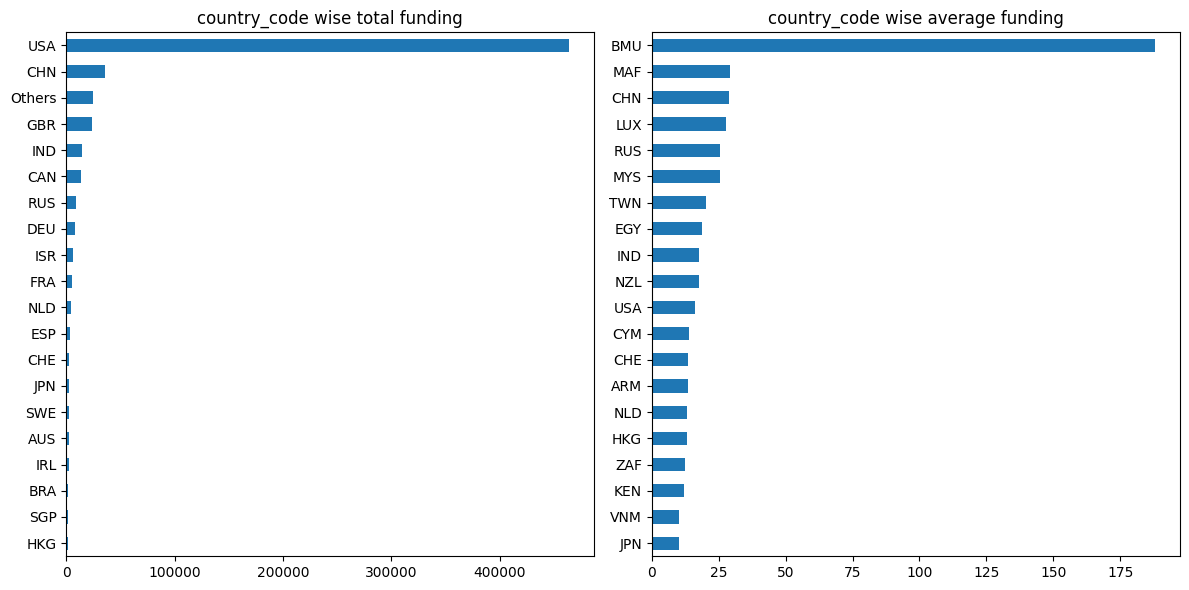

In [354]:
# @title COUNTRY WISE FUNDING
plot_col(df,'country_code','barh',20,12,6)

In [54]:
df1=df.groupby('country_code')['funding_total_usd'].sum().reset_index()
df2=df.groupby('country_code')['funding_total_usd'].mean().reset_index()

In [79]:
# Create choropleth map
fig = px.choropleth(df1,
                    locations='country_code',  # Column with country codes
                    locationmode='ISO-3',  # Use ISO-3 country codes
                    color='funding_total_usd',  # Column with funding data
                    color_continuous_scale=[
                        [0, "lightpink"],   # Lowest values get light blue
                        [.20,'skyblue'],# Middle values get light green
                        [0.40, "yellow"],
                        [0.60,'red'],
                        [.80,'violet'],# Higher-middle values get light yellow
                        [1, "lightgreen"]],
                    title='Total Startup Funding by Country'
                    , width=800, height=600)
fig.update_layout(
    title={
        'text': "Total Startup Funding by Country",  # Title text
        'y':0.8,  # Y position (0 is bottom, 1 is top)
        'x':0.40,   # X position (0 is left, 1 is right)
        'xanchor': 'center',  # Anchor title in the center
        'yanchor': 'top'  # Anchor title to the top
    },
    margin={"r":0, "t":20, "l":0, "b":0},  # Adjust map margins (top, bottom, left, right)
    coloraxis_colorbar={
        'len': 0.65,  # Adjust length of the color bar (0 to 1)
        'thickness': 30,  # Adjust thickness of the color bar
        'yanchor': 'middle',  # Center the color bar vertically
        'y': 0.5,  # Position it in the middle of the graph
    }
)
# Show the figure
fig.show()



In [78]:
fig = px.choropleth(df2,
                    locations='country_code',  # Column with country codes
                    locationmode='ISO-3',  # Use ISO-3 country codes
                    color='funding_total_usd',  # Column with funding data
                    color_continuous_scale=[
                        [0, "lightpink"],   # Lowest values get light blue
                        [.20,'skyblue'],# Middle values get light green
                        [0.40, "yellow"],
                        [0.60,'red'],
                        [.80,'violet'],# Higher-middle values get light yellow
                        [1, "lightgreen"]],    # Highest values get light pink
                    title='Average Startup Funding by Country'
                    , width=800, height=600)
fig.update_layout(
    title={
        'text': "Average Startup Funding by Country",  # Title text
        'y':0.8,  # Y position (0 is bottom, 1 is top)
        'x':0.40,   # X position (0 is left, 1 is right)
        'xanchor': 'center',  # Anchor title in the center
        'yanchor': 'top'  # Anchor title to the top
    },
    margin={"r":0, "t":20, "l":0, "b":0},  # Adjust map margins (top, bottom, left, right)
    coloraxis_colorbar={
        'len': 0.65,  # Adjust length of the color bar (0 to 1)
        'thickness': 30,  # Adjust thickness of the color bar
        'yanchor': 'middle',  # Center the color bar vertically
        'y': 0.5,  # Position it in the middle of the graph
    }
)
fig.show()

In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create sample data
# df1 = df  # First DataFrame (for the first map)
# df2 = df  # Second DataFrame (for the second map, can be different data)

# Create subplots: 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Map 1: Startup Funding", "Map 2: Startup Funding"),
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]  # Specify that both subplots are choropleth maps
)

# Add the first choropleth map
fig.add_trace(
    go.Choropleth(
        locations=df1['country_code'],
        locationmode='ISO-3',
        z=df1['funding_total_usd'],
        colorscale=[
            [0, "lightgreen"],   # Lowest values get light green
            [0.20, "yellow"],    # Middle values get yellow
            [0.40, "orange"],    # Higher middle values get orange
            [0.60, "red"],       # Upper middle values get red
            [0.80, "blue"],      # Higher values get blue
            [1, "violet"]        # Highest values get violet
        ],
        colorbar=dict(title="Total funding Amount", thickness=15, len=0.5, yanchor='middle', y=0.5),  # Customize the color bar
        name="Funding Map 1"
    ),
    row=1, col=1  # Specify subplot position
)

# Add the second choropleth map
fig.add_trace(
    go.Choropleth(
        locations=df2['country_code'],
        locationmode='ISO-3',
        z=df2['funding_total_usd'],
        colorscale=[
            [0, "lightgreen"],   # Lowest values get light green
            [0.20, "yellow"],    # Middle values get yellow
            [0.40, "orange"],    # Higher middle values get orange
            [0.60, "red"],       # Upper middle values get red
            [0.80, "blue"],      # Higher values get blue
            [1, "violet"]        # Highest values get violet
        ],
        colorbar=dict(title=" Average funding Amount", thickness=15, len=0.5, yanchor='top', y=0.5),  # Customize the color bar
        name="Funding Map 2"
    ),
    row=1, col=2  # Specify subplot position
)

# Update layout for title and margins
fig.update_layout(
    title_text="Startup Funding Comparison",
    title_x=0.5,  # Center title
    margin={"r": 0, "t": 50, "l": 0, "b": 0}  # Adjust margins
)

# Show the figure
fig.show()


In [4]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

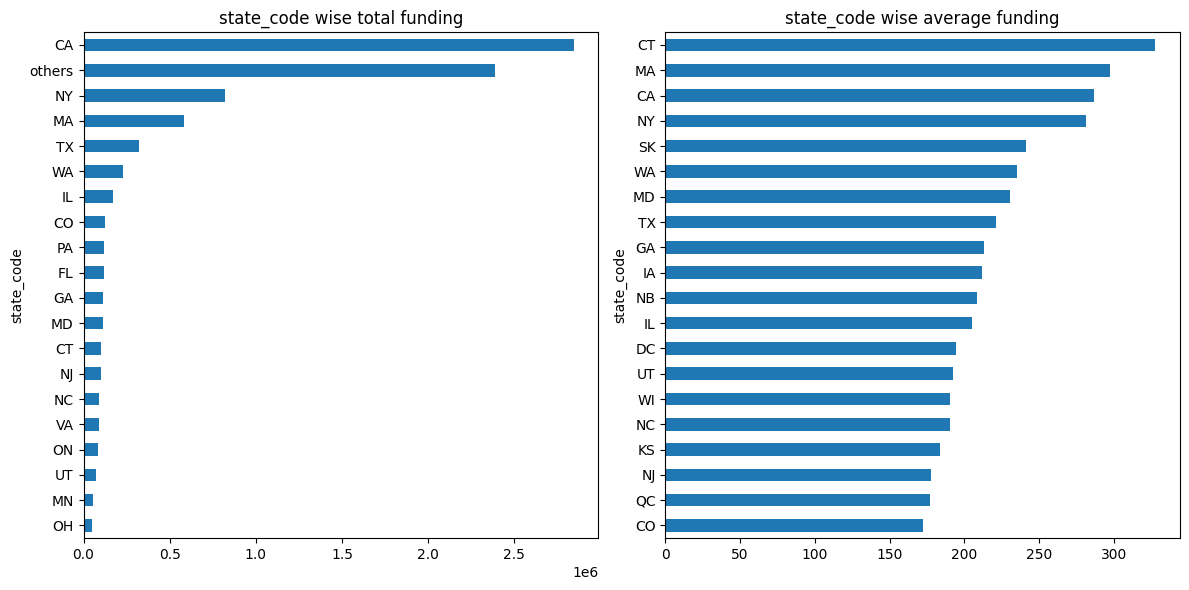

In [ ]:
# @title STATE WISE FUNDING
plot_col(df,'state_code','barh',20,12,6)

In [358]:
df.groupby('country_code')['funding_total_usd'].mean().sort_values(ascending=False).head(20)

country_code
BMU    187.916500
MAF     29.220000
CHN     28.714451
LUX     27.698978
RUS     25.622994
MYS     25.379147
TWN     20.087936
EGY     18.714774
IND     17.681638
NZL     17.485553
USA     16.123532
CYM     13.841623
CHE     13.678770
ARM     13.406488
NLD     13.173332
HKG     13.156083
ZAF     12.436865
KEN     11.921470
VNM     10.234310
JPN     10.199280
Name: funding_total_usd, dtype: float64

In [357]:
(df.groupby('country_code')['funding_total_usd'].sum()).sort_values(ascending=False).head(20)

country_code
USA       464244.849909
CHN        35577.204451
Others     24860.250553
GBR        23498.140161
IND        15011.710743
CAN        13914.166746
RUS         9429.261790
DEU         8243.664362
ISR         6267.079634
FRA         5195.063568
NLD         4044.212916
ESP         3669.192650
CHE         3023.008222
JPN         2896.595442
SWE         2885.796608
AUS         2598.953424
IRL         2430.365126
BRA         2033.704915
SGP         1735.455737
HKG         1657.666497
Name: funding_total_usd, dtype: float64

In [ ]:
df.groupby('region')['total_fund'].sum().sort_values(ascending=False)

region
SF Bay Area      2.206029e+06
New York City    7.669491e+05
Boston           5.503776e+05
others           3.328795e+05
Los Angeles      2.538058e+05
                     ...     
UGA - Other      0.000000e+00
BRN - Other      0.000000e+00
LAO - Other      0.000000e+00
Farum            0.000000e+00
TUN - Other      0.000000e+00
Name: total_fund, Length: 1090, dtype: float64

In [ ]:
df.groupby('region')['total_fund'].mean().sort_values(ascending=False)

region
West Sussex       5410.000000
Burleigh Heads    3821.068900
Spruce Grove      2400.000000
Bermuda           1879.165000
Lyngby            1870.284667
                     ...     
Durban               0.000000
Douglas              0.000000
Vijayawada           0.000000
MOZ - Other          0.000000
Maple Ridge          0.000000
Name: total_fund, Length: 1090, dtype: float64

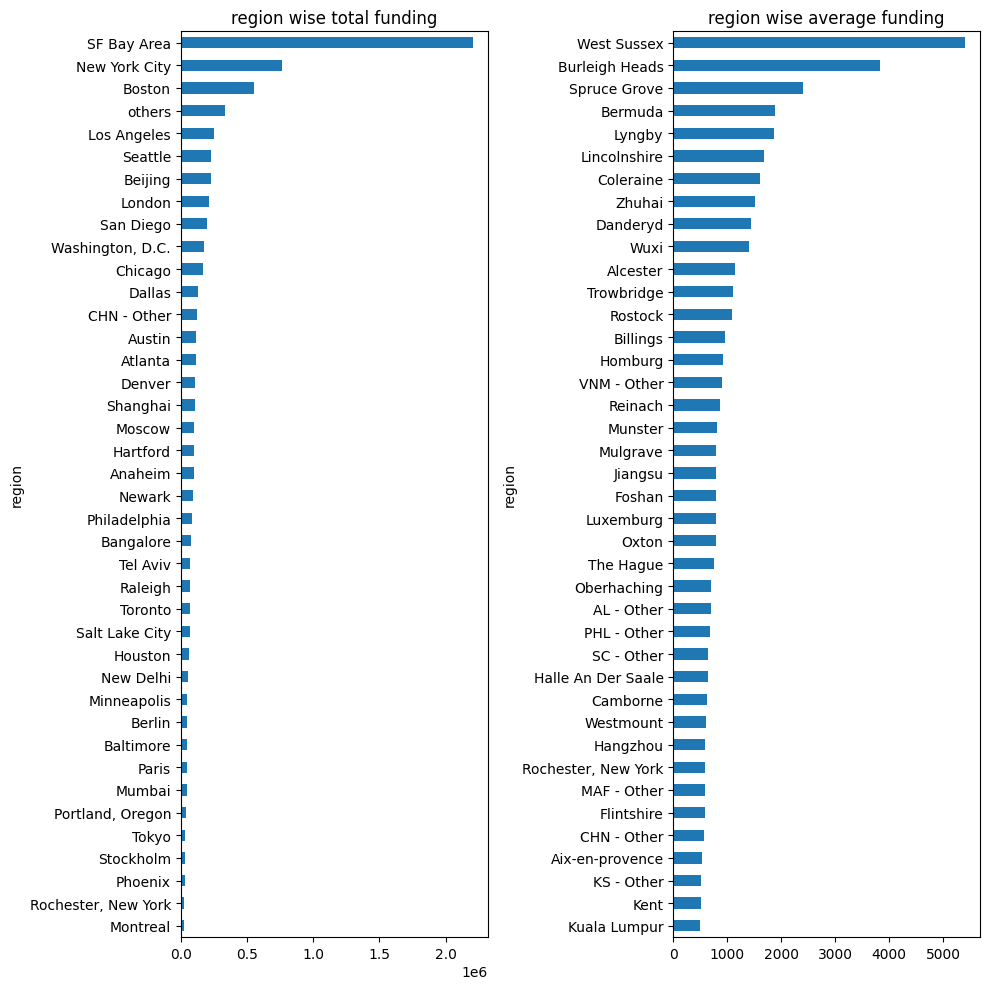

In [ ]:
plot_col(df,'region','barh',40,10,10)

In [ ]:
df.groupby('city')['total_fund'].sum().sort_values(ascending=False)

city
New York                      744319.80652
San Francisco                 662816.62700
others                        464832.07992
Beijing                       225777.60375
Palo Alto                     196343.61730
                                  ...     
Neuchatel                          0.00000
Neustadt An Der Weinstraße         0.00000
Gladstone                          0.00000
Neutral Bay                        0.00000
's-hertogenbosch                   0.00000
Name: total_fund, Length: 4189, dtype: float64

In [ ]:
df.groupby('city')['total_fund'].mean().sort_values(ascending=False)

city
Sussex               19000.000
Dania                11840.000
Normal               11000.000
Admiralty             8040.000
Lincolnshire          5054.065
                       ...    
Holiday                  0.000
Hilversum                0.000
Hillerød                 0.000
Higashi-shinagawa        0.000
's-hertogenbosch         0.000
Name: total_fund, Length: 4189, dtype: float64

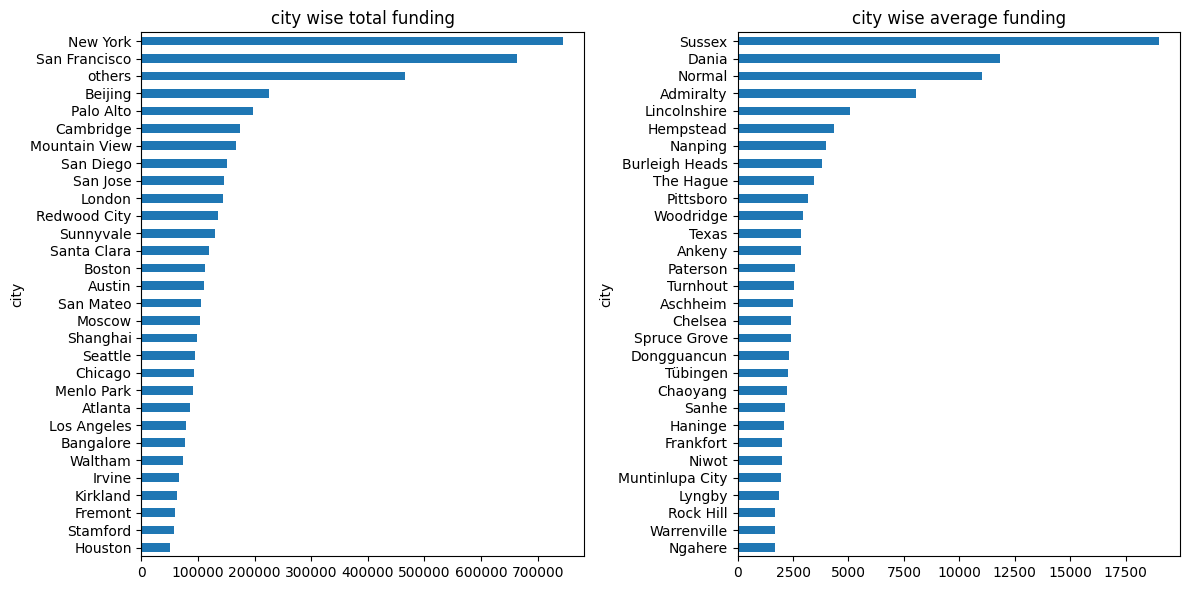

In [ ]:
plot_col(df,'city','barh',30,12,6)

analyze the Funding Rounds and Types

In [ ]:
funding_rounds_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
funding_rounds_amount = df[funding_rounds_cols].sum()

# Calculate the frequency of each funding type
funding_types_cols = ['seed', 'venture','equity_crowdfunding', 'undisclosed', 'convertible_note',
        'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
        'post_ipo_debt', 'secondary_market', 'product_crowdfunding']
funding_types_amount = df[funding_types_cols].sum()

print(funding_rounds_amount)
print(funding_types_amount)

round_A    614986.48322
round_B    738055.52874
round_C    595903.80184
round_D    364618.13370
round_E    169309.42897
round_F     83930.49209
round_G     28511.22473
round_H      7036.00000
dtype: float64
seed                    1.074394e+05
venture                 3.708369e+06
equity_crowdfunding     3.047023e+03
undisclosed             6.437880e+04
convertible_note        1.155074e+04
debt_financing          9.334670e+05
angel                   3.234184e+04
grant                   8.050745e+04
private_equity          1.025485e+06
post_ipo_equity         3.010150e+05
post_ipo_debt           2.192259e+05
secondary_market        1.901184e+04
product_crowdfunding    3.497356e+03
dtype: float64


In [ ]:
# Count how often each funding round occurs (non-zero values)
funding_rounds_freq = (df[funding_rounds_cols] > 0).sum()

# Count how often each funding type occurs (non-zero values)
funding_types_freq = (df[funding_types_cols] > 0).sum()

print(f"Funding Rounds Frequency:\n{funding_rounds_freq}")
print(f"Funding Types Frequency:\n{funding_types_freq}")


Funding Rounds Frequency:
round_A    9003
round_B    5447
round_C    2837
round_D    1288
round_E     516
round_F     172
round_G      34
round_H       4
dtype: int64
Funding Types Frequency:
seed                    13840
venture                 23277
equity_crowdfunding       522
undisclosed               952
convertible_note          557
debt_financing           4225
angel                    3129
grant                    1142
private_equity           1373
post_ipo_equity           316
post_ipo_debt              75
secondary_market           19
product_crowdfunding      213
dtype: int64


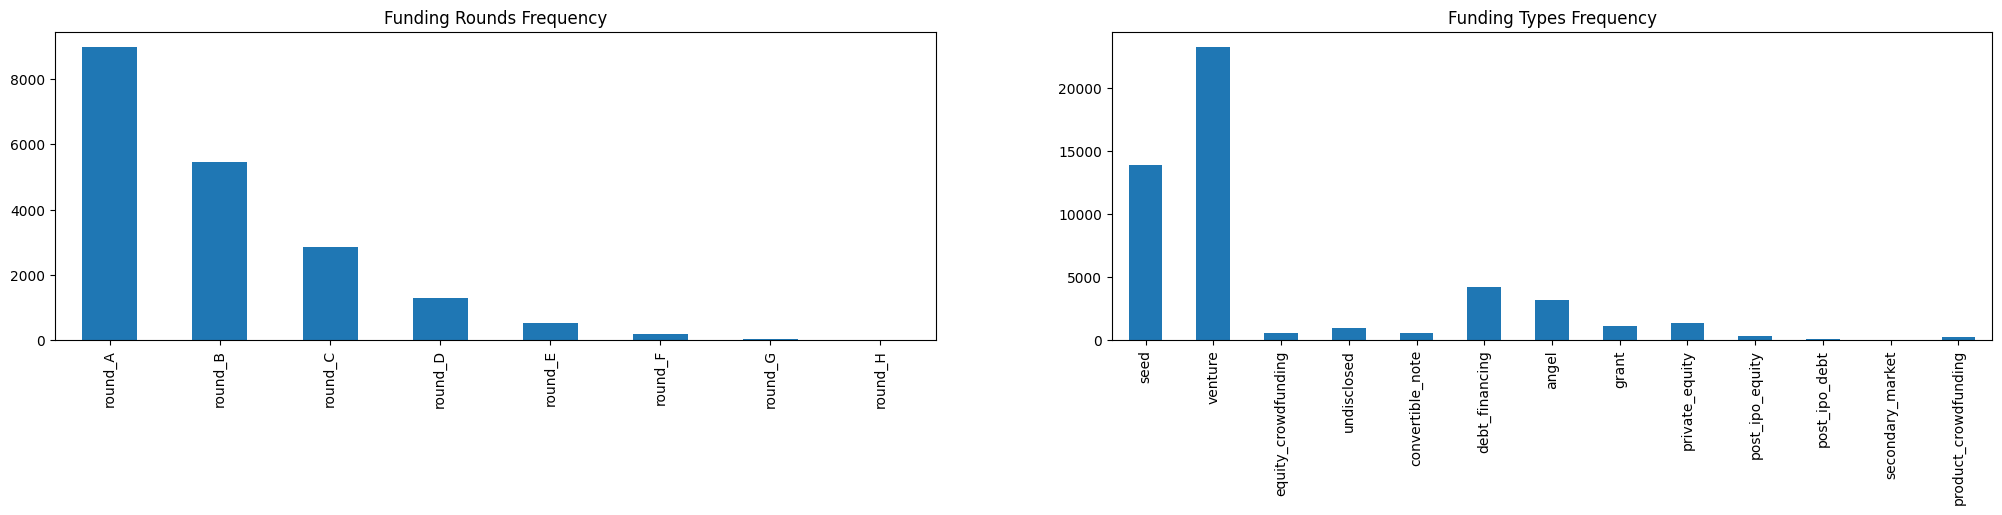

In [ ]:
plt.subplot(1,2,1)
funding_rounds_freq.plot(kind='bar', title='Funding Rounds Frequency')

plt.subplot(1,2,2)
funding_types_freq.plot(kind='bar', title='Funding Types Frequency')
plt.show()

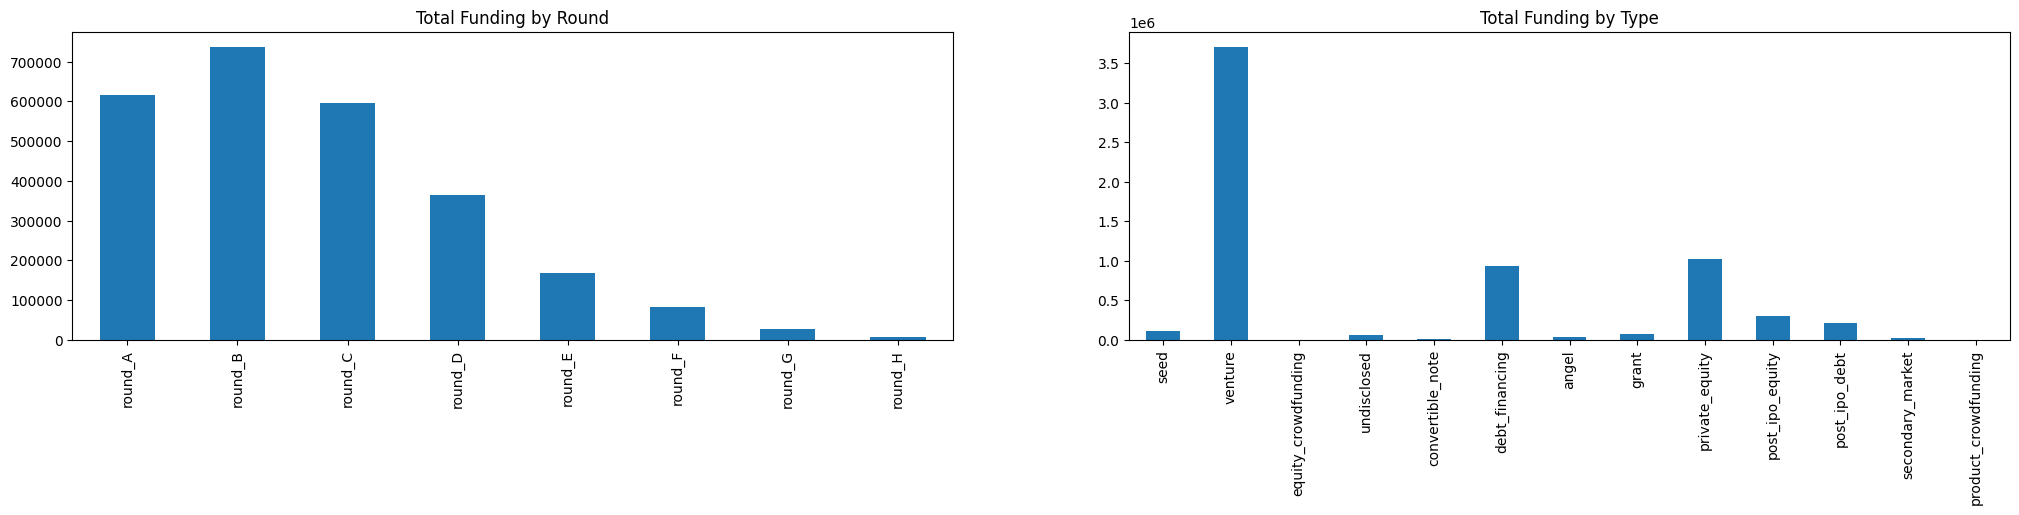

In [ ]:
# Bar chart for total funding by round
plt.subplot(1,2,1)
funding_rounds_amount.plot(kind='bar', title='Total Funding by Round')

plt.subplot(1,2,2)
funding_types_amount.plot(kind='bar', title='Total Funding by Type')
plt.show()


In [ ]:
# create sunburst kind of chart showing funding in each round and type

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming funding_rounds_amount and funding_types_amount are already calculated

# Convert to a DataFrame
funding_rounds_amount_df = pd.DataFrame({'name': funding_rounds_amount.index, 'amount': funding_rounds_amount.values, 'level': 'Round'})
funding_types_amount_df = pd.DataFrame({'name': funding_types_amount.index, 'amount': funding_types_amount.values, 'level': 'Type'})

# Concatenate both DataFrames
sunburst_data = pd.concat([funding_rounds_amount_df, funding_types_amount_df], ignore_index=True)

# Create the sunburst chart using Plotly Express
fig = px.sunburst(
    data_frame=sunburst_data,
    path=['level', 'name'],  # level defines 'Round' or 'Type' and name is the specific round/type
    values='amount',
    title="Sunburst Chart of Funding by Type and Round"
)

# Show the plot
fig.show()


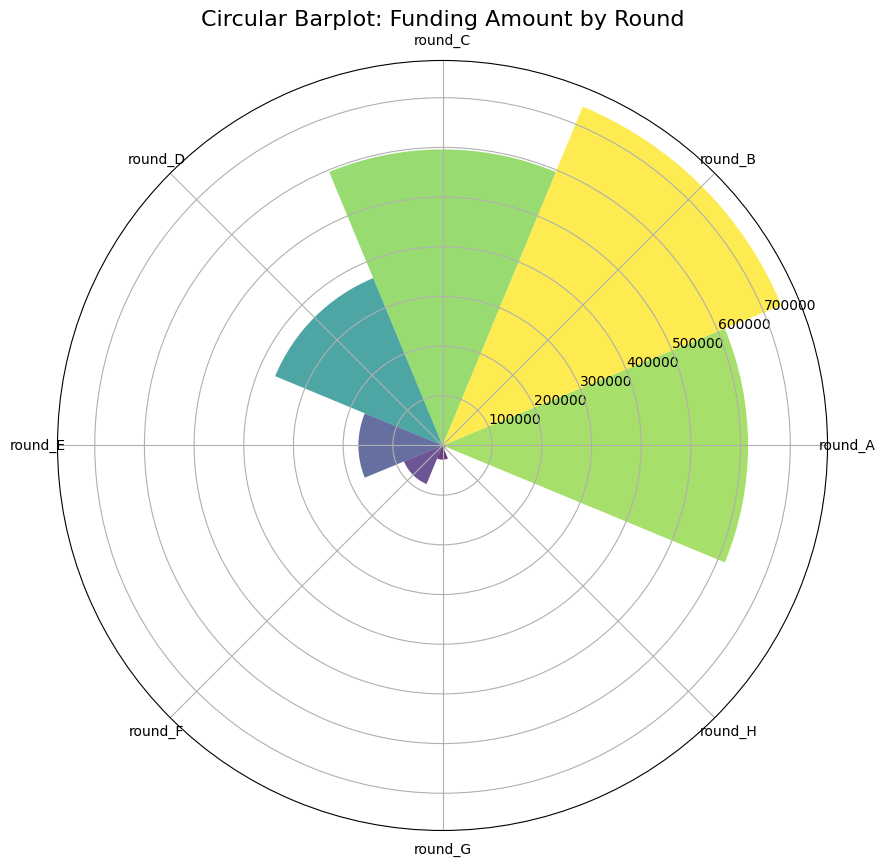

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (you can replace this with your actual data)
categories = funding_rounds_amount.index.tolist()  # Example: round_A, round_B, etc.
values = funding_rounds_amount.values  # Corresponding funding amount

# Number of bars
N = len(categories)

# Create the angles for the bars
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The width of each bar
width = 2 * np.pi / N

# Create polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot bars
bars = ax.bar(angles, values, width=width, bottom=0.0)

# Set the labels for each bar (funding round type or category)
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=10)

# Customize bar appearance (optional)
for bar, value in zip(bars, values):
    bar.set_facecolor(plt.cm.viridis(value / max(values)))
    bar.set_alpha(0.8)

# Show the plot
plt.title("Circular Barplot: Funding Amount by Round", size=16)
plt.show()


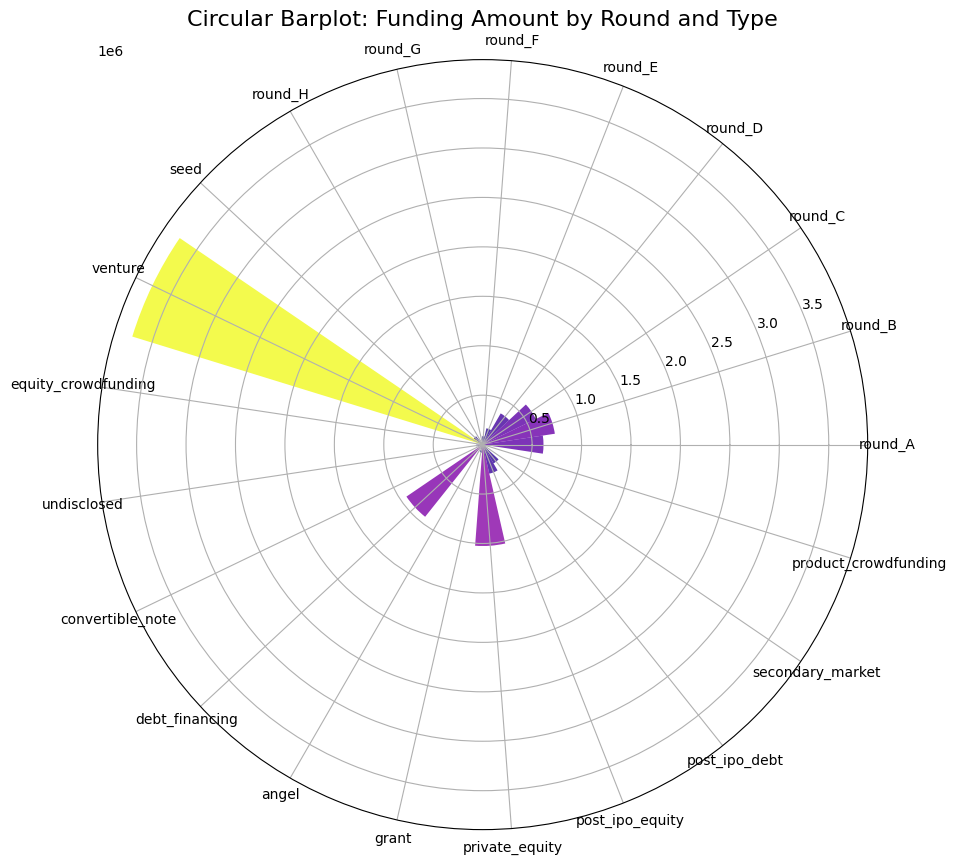

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (use your actual data here)
rounds_data = funding_rounds_amount.copy()
types_data = funding_types_amount.copy()

# Combine the data for rounds and types into a single DataFrame
combined_data = pd.concat([rounds_data, types_data], axis=0)
categories = combined_data.index.tolist()  # Category names (rounds + types)
values = combined_data.values  # Corresponding funding amounts

# Number of bars (total categories)
N = len(categories)

# Create the angles for the bars
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The width of each bar
width = 2 * np.pi / N

# Create polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot bars
bars = ax.bar(angles, values, width=width, bottom=0.0)

# Set the labels for each bar (funding rounds and types)
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=10)

# Customize bar appearance (optional)
for bar, value in zip(bars, values):
    bar.set_facecolor(plt.cm.plasma(value / max(values)))  # Different colormap to distinguish better
    bar.set_alpha(0.8)

# Set title
plt.title("Circular Barplot: Funding Amount by Round and Type", size=16)

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Example data (use your actual data here)
# Assuming you already have funding_rounds_amount and funding_types_amount as Series
rounds_data = funding_rounds_amount.copy()
types_data = funding_types_amount.copy()

# Combine the data into one DataFrame
combined_data = pd.concat([rounds_data, types_data], axis=0)
categories = combined_data.index.tolist()  # Category names (rounds + types)
values = combined_data.values  # Corresponding funding amounts

# Create the circular bar plot using Plotly
fig = go.Figure()

# Add bars for each category
fig.add_trace(go.Barpolar(
    r=values,
    theta=categories,
    width=[360 / len(categories)] * len(categories),  # Width of bars (evenly distributed)
    marker=dict(color=values, colorscale='Viridis', colorbar=dict(title='Funding Amount')),
    name='Funding Amount'
))

# Update layout for polar coordinates
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(values)]),
        angularaxis=dict(tickvals=categories, ticktext=categories),
    ),
    title="Circular Barplot: Funding Amount by Round and Type"
)

# Show the plot
fig.show()


In [ ]:
# Correlation between funding rounds and total funding
corr_rounds_funding = df[['funding_rounds', 'total_fund']].corr()

print("Correlation Between Funding Rounds and Total Funding:\n", corr_rounds_funding)


Correlation Between Funding Rounds and Total Funding:
                 funding_rounds  total_fund
funding_rounds        1.000000    0.164647
total_fund            0.164647    1.000000


In [ ]:
# Correlation between funding types and total funding
corr_types_funding = df[funding_types_cols + ['total_fund']].corr()

print("Correlation Between Funding Types and Total Funding:\n", corr_types_funding)


Correlation Between Funding Types and Total Funding:
                           seed   venture  equity_crowdfunding  undisclosed  \
seed                  1.000000 -0.011546            -0.003870    -0.004654   
venture              -0.011546  1.000000            -0.007327     0.008730   
equity_crowdfunding  -0.003870 -0.007327             1.000000    -0.001347   
undisclosed          -0.004654  0.008730            -0.001347     1.000000   
convertible_note     -0.001362  0.000782            -0.000254    -0.000680   
debt_financing       -0.002339  0.008726            -0.000414    -0.000342   
angel                -0.002694  0.005439             0.018886     0.004022   
grant                -0.005057  0.007887            -0.000891    -0.001134   
private_equity       -0.008914  0.063483            -0.002019     0.008599   
post_ipo_equity      -0.004487  0.008941            -0.000701     0.002934   
post_ipo_debt        -0.002623 -0.002743            -0.000399    -0.000565   
secondary_

In [ ]:
# Correlation between funding types and total funding
corr_types_funding = df[funding_rounds_cols + ['total_fund']].corr()

print("Correlation Between Funding Types and Total Funding:\n", corr_types_funding)

Correlation Between Funding Types and Total Funding:
              round_A   round_B   round_C   round_D   round_E   round_F  \
round_A     1.000000  0.268165  0.120633  0.039898  0.047187  0.018403   
round_B     0.268165  1.000000  0.346011  0.121166  0.093949  0.042551   
round_C     0.120633  0.346011  1.000000  0.343870  0.144107  0.053475   
round_D     0.039898  0.121166  0.343870  1.000000  0.240910  0.122004   
round_E     0.047187  0.093949  0.144107  0.240910  1.000000  0.366157   
round_F     0.018403  0.042551  0.053475  0.122004  0.366157  1.000000   
round_G     0.001415  0.009809  0.023298  0.090611  0.297437  0.240141   
round_H    -0.000371  0.004960  0.011551  0.069108  0.303983  0.153170   
total_fund  0.114759  0.183921  0.223834  0.222530  0.199799  0.162318   

             round_G   round_H  total_fund  
round_A     0.001415 -0.000371    0.114759  
round_B     0.009809  0.004960    0.183921  
round_C     0.023298  0.011551    0.223834  
round_D     0.090611  0.0

In [ ]:
# Analyze progression through rounds
progression_counts = df[funding_rounds_cols].gt(0).cumsum(axis=1).iloc[:, -1].value_counts()

print("Progression Through Funding Rounds:\n", progression_counts)


Progression Through Funding Rounds:
 round_H
0    36672
1     8518
2     2699
3     1010
4      355
5      128
6       42
7        5
8        1
Name: count, dtype: int64


In [ ]:
df[funding_rounds_cols].gt(0).cumsum(axis=1).iloc[:,-1].value_counts()

round_H
0    36672
1     8518
2     2699
3     1010
4      355
5      128
6       42
7        5
8        1
Name: count, dtype: int64

Frequency of Funding Rounds/Types: Which rounds/types are most common? Are certain rounds more frequent in certain stages of startup growth?
Impact on Total Funding: Which funding rounds or types contribute the most to total funding?
Progression Patterns: Do startups typically progress through all funding rounds, or do they skip some? Is there a typical sequence (e.g., seed → venture → round A, etc.)?


1. Analyze Typical Progression through Rounds
Start by determining the most common progression paths (i.e., whether startups skip rounds or follow a particular sequence). You can track the progression through different rounds and funding types.
Steps for Analysis:
Step 1: Check if Startups Skip Rounds
You can create a sequence of funding rounds a startup went through, and check if they skip any rounds (e.g., if they raised funding in rounds A and C but skipped B).
Code for Identifying Skipped Rounds:

In [ ]:
df_new = (df[funding_types_cols + funding_rounds_cols] > 0).astype(int)
df_new

seed  venture  equity_crowdfunding  undisclosed  convertible_note  \
0         1        0                    0            0                 0   
1         0        1                    0            0                 0   
2         1        0                    0            0                 0   
3         1        0                    0            0                 0   
4         0        0                    1            0                 0   
...     ...      ...                  ...          ...               ...   
49433     1        0                    0            0                 0   
49434     0        1                    0            0                 0   
49435     1        0                    0            0                 1   
49436     1        0                    0            0                 0   
49437     0        1                    0            0                 0   

       debt_financing  angel  grant  private_equity  post_ipo_equity  ...  \
0                   0      0      0               0                0  ...   
1                   0      0      0               0                0  ...   
2                   0      0      0               0                0  ...   
3                   0      0      0               0                0  ...   
4                   0      0      0               0                0  ...   
...               ...    ...    ...             ...              ...  ...   
49433               0      0      0               0                0  ...   
49434               0      0      0               0                0  ...   
49435               0      0      0               0                0  ...   
49436               0      0      0               0                0  ...   
49437               1      0      0               0                0  ...   

       secondary_market  product_crowdfunding  round_A  round_B  round_C  \
0                     0                     0        0        0        0   
1                     0                     0        0        0        0   
2                     0                     0        0        0        0   
3                     0                     0        0        0        0   
4                     0                     0        0        0        0   
...                 ...                   ...      ...      ...      ...   
49433                 0                     0        0        0        0   
49434                 0                     0        1        0        0   
49435                 0                     0        0        0        0   
49436                 0                     0        0        0        0   
49437                 0                     0        1        1        0   

       round_D  round_E  round_F  round_G  round_H  
0            0        0        0        0        0  
1            0        0        0        0        0  
2            0        0        0        0        0  
3            0        0        0        0        0  
4            0        0        0        0        0  
...        ...      ...      ...      ...      ...  
49433        0        0        0        0        0  
49434        0        0        0        0        0  
49435        0        0        0        0        0  
49436        0        0        0        0        0  
49437        0        0        0        0        0  

[49430 rows x 21 columns]

In [ ]:
# Count occurrences of each combination of funding types and rounds
common_sequences = df_new.groupby(funding_types_cols + funding_rounds_cols).size().sort_values(ascending=False).reset_index()

# Display the most common progression sequences
print("Most common funding sequences:\n")
common_sequences[common_sequences['round_H']==1]


Most common funding sequences:



seed  venture  equity_crowdfunding  undisclosed  convertible_note  \
479     0        1                    0            0                 0   
494     0        1                    0            0                 0   
500     0        1                    0            0                 0   
575     0        1                    0            0                 0   

     debt_financing  angel  grant  private_equity  post_ipo_equity  ...  \
479               0      0      0               0                0  ...   
494               0      0      0               0                0  ...   
500               0      1      0               0                0  ...   
575               1      0      0               1                0  ...   

     product_crowdfunding  round_A  round_B  round_C  round_D  round_E  \
479                     0        0        0        0        0        0   
494                     0        0        1        0        0        0   
500                     0        1        1        1        1        1   
575                     0        0        0        1        1        1   

     round_F  round_G  round_H  0  
479        1        1        1  1  
494        0        0        1  1  
500        1        1        1  1  
575        1        1        1  1  

[4 rows x 22 columns]

In [ ]:
sns.pairplot(df,hue='status')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79d61c563130> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79d61c5623b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df[cat_col].columns,df.columns

In [ ]:
/df.to_csv('startup_funding_cleaned.csv',index=False)

In [ ]:
from google.colab import files
files.download('startup_funding_cleaned.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df=pd.read_csv('startup_funding_cleaned.csv')


In [ ]:
fund_col=df.columns[16:].to_list()
fund_col.insert(0,'funding_total_usd')

num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(exclude='number').columns

In [ ]:
cfxv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

! gdown 110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP

Downloading...
From: https://drive.google.com/uc?id=110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP
To: /content/investments_VC.csv
100% 12.5M/12.5M [00:00<00:00, 46.2MB/s]


In [3]:
df=pd.read_csv('investments_VC.csv',encoding='latin')
df=df[~df.isna().all(axis=1)]
df.columns=df.columns.str.strip()
df['funding_total_usd']=df['funding_total_usd'].str.strip().str.replace(',','').str.replace('-','0')
df['funding_total_usd']=df['funding_total_usd'].astype('int')
df['name'].fillna('Tell It in 10',inplace=True)
df['category_list']=df['category_list'].str.strip('|').str.split('|')
df['market']=df.apply(lambda row: np.random.choice(row['category_list']) if (pd.isna(row['market']) and isinstance(row['category_list'],list)) else row['market'], axis=1)
df[['category_list','market','status']]=df[['category_list','market','status']].fillna('unknown')
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str,errors='coerce')
    except ValueError:
        return pd.to_datetime(date_str,dayfirst=True,errors='coerce')


df['last_funding_at']=parse_date(df['last_funding_at'])
df.drop(df[df['last_funding_at'].isna()].index,inplace=True)


rep_dic={'0007-05-13':'2013-05-07',
         '0011-11-14':'2014-11-11'
         }
df['first_funding_at']=df['first_funding_at'].replace(rep_dic)
df['first_funding_at']=parse_date(df['first_funding_at'])

df.drop(df[df['first_funding_at'].isna()].index,inplace=True)           # dropping rows where founded_at is messed and funding=0


df['founded_at']=parse_date(df['founded_at'])
df_clean=df[~df['founded_at'].isna()]
med_days=(df_clean['first_funding_at']-df_clean['founded_at']).dt.days.median()
df['founded_at']=df['founded_at'].fillna(df['first_funding_at']-pd.to_timedelta(med_days,unit='d'))

df['founded_month']=df['founded_month']+'-01'
df['founded_month']=parse_date(df['founded_month']).dt.month
df['founded_month'].fillna(df['founded_at'].dt.month,inplace=True)
df['founded_month']=df['founded_month'].astype('int')

df['founded_quarter']=df['founded_quarter'].str.split('').str[-2]
df['founded_quarter'].fillna(df['founded_at'].dt.quarter,inplace=True)
df['founded_quarter']=df['founded_quarter'].astype('int')

# df['founded_year'].fillna(df['founded_at'].dt.year,inplace=True)
# df['founded_year']=df['founded_year'].astype('int')

# df.drop(columns=['permalink','homepage_url'],inplace=True)

# df.fillna('others',inplace=True)

Based on the quarter analysis of startups, here are strategic recommendations for entrepreneurs and investors to optimize funding and growth opportunities:

### Strategies for Entrepreneurs:

1. **Launch Timing:**
   - **Focus on Q1**: Given that Q1 sees the highest startup formation, plan product launches and business setups during this period to capitalize on increased investor interest and market activity.
   - **Gradual Launches**: For startups that miss the Q1 window, consider gradually entering the market in Q3, where there is still significant funding activity.

2. **Funding Strategy:**
   - **Early Engagement**: Start engaging with potential investors before Q1 ends, laying the groundwork for funding discussions to coincide with the peak funding activity in Q3.
   - **Diversified Funding Sources**: Explore diverse funding options, such as bootstrapping, crowdfunding, and angel investors, to enhance the chances of securing initial funding, especially in Q2 when activity dips.

3. **Networking and Visibility:**
   - **Leverage Events**: Attend startup events, pitch competitions, and networking opportunities during Q1 and Q3 to increase visibility and connect with potential investors.
   - **Build Relationships**: Focus on building relationships with investors and mentors in the earlier quarters, ensuring a supportive network by the time funding rounds begin.

4. **Market Adaptability:**
   - **Continuous Feedback Loop**: Implement a robust mechanism for gathering market feedback continuously, allowing for product pivots or adjustments that align with market trends before approaching investors.

5. **Focus on Product-Market Fit:**
   - **MVP Development**: Prioritize developing a Minimum Viable Product (MVP) by the end of Q1 to gather user feedback and demonstrate traction before seeking funding in Q3.

### Strategies for Investors:

1. **Investment Timing:**
   - **Q1 Focus**: Allocate a significant portion of investment resources and time in Q1 to discover promising startups entering the market.
   - **Monitor Q3 Trends**: Stay active in the market during Q3 to identify startups closing their funding rounds and to explore late-stage investments.

2. **Evaluate Startup Readiness:**
   - **Founding Quarter Analysis**: Analyze the founding quarter of startups, as a higher count in Q1 may indicate better market conditions and investor confidence.
   - **Funding Lifecycle**: Monitor startups for their first and last funding milestones, indicating their growth trajectory and potential for scalability.

3. **Portfolio Diversification:**
   - **Diverse Categories**: Diversify investments across various sectors and stages of startup development to mitigate risks, especially in quarters with lower activity.
   - **Support Non-Funded Startups**: Consider providing mentorship and resources to non-funded startups, helping them refine their business models to increase their chances of securing future funding.

4. **Active Involvement:**
   - **Advisory Role**: Take on advisory roles with promising startups, providing guidance on product development, market entry strategies, and funding approaches.
   - **Networking Facilitation**: Help connect startups with potential investors and partners, enhancing their chances of funding success.

5. **Data-Driven Decision Making:**
   - **Use Analytics**: Regularly analyze market trends and startup performance metrics to make informed investment decisions.
   - **Market Research**: Stay updated on sector-specific trends, regulatory changes, and economic factors that may impact startup viability.
**Investment Opportunities**

Investors might focus on identifying trends in startup funding behavior, particularly around the 2011-2013 timeframe, to spot patterns or opportunities in sectors that were emerging during that period.

### Conclusion

By implementing these strategies, both entrepreneurs and investors can align their actions with market dynamics, maximizing the chances of successful startup launches and funding opportunities. The emphasis should be on proactive planning, relationship building, and data-driven insights to navigate the challenges and opportunities within the startup ecosystem.

-------
4. **Impact of Funding on Survival and Success**:
   - The consistent count of startups obtaining multiple rounds within short intervals (e.g., within one year) reflects a positive correlation between receiving follow-up funding and perceived startup viability.
   - Startups without repeat funding may represent less viable ventures, potentially owing to market fit issues, scalability limitations, or economic factors affecting investor confidence during specific periods.
   ### Strategic Implications

1. **Targeted Funding Cycles**: Investors should focus on identifying sectors that received high funding in **2013 and 2014**, as this may indicate robust market trends. Understanding why certain startups succeeded or failed in these years could guide current investment decisions.

2. **Funding Dependency Analysis**: For new entrepreneurs, understanding the funding lifecycles of funded vs. non-funded startups may help in securing essential early-stage and follow-up funding to avoid stagnation.

3. **Historical Lessons for New Ventures**: Recognizing why non-funded startups peaked but failed to obtain subsequent funding in 2013-2014 can provide insights into pitfalls to avoid, such as overreliance on trends without scalability, and the importance of long-term funding strategies.

In summary, the data shows that the **2011-2014 period** was pivotal for startup funding, with a high volume of startups seeking capital. Funded startups often had shorter lifecycles between rounds, while non-funded startups may have struggled to sustain growth, underscoring the importance of early and sustained funding for startup success.
-----------